In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import ROOT
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

Welcome to JupyROOT 6.26/04


In [2]:
import os
import pandas as pd
import numpy as np
from pandas import HDFStore
from os import path
from yaml import safe_load

from hist.get_data import get_data, get_data_in_np
from hist.bkg_stack import generic_ntuple, get_data_in_module
from hist.draw_stack import lumi
from read_yaml_to_dict import read_yaml_to_dict
from src.sample_name import sample_name
from src.combine_cuts import combine_cuts
print(os.getcwd())

For optimal usage set `plt.style.use('belle2')`
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'belle2', 'belle2_modern', 'belle2_serif', 'belle2_wg1', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
/home/jykim/workspace/DRAW/read_yaml_to_dict.py
/home/jykim/workspace/DRAW
/home/jykim/workspace/DRAW


# Generic bkg

In [213]:
location='lab_ssd'
option = 'pre_extraction'
sample_info = read_yaml_to_dict("samples")

In [214]:
sample_loc=sample_name(option=option, location=location, sample_info=sample_info) 
print(sample_loc )

{'ccbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ccbar/pre_extraction_ccbar_recon_output_0*.root', 'charged': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/charged/pre_extraction_charged_recon_output_0*.root', 'mixed': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/mixed/pre_extraction_mixed_recon_output_0*.root', 'uubar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/uubar/pre_extraction_uubar_recon_output_0*.root', 'ddbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ddbar/pre_extraction_ddbar_recon_output_0*.root', 'ssbar': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/ssbar/pre_extraction_ssbar_recon_output_0*.root', 'taupair': '/media/jykim/ssd_T5/storage/01_recon/merge_generic_bkg/taupair/pre_extraction_taupair_recon_output_0*.root'}


In [215]:
mode_list = ['phi', 'antiKstar', 'rho', 'omega']
extract_variables = "FOM_variables"
# variables = { 'vars': ['D0_M',"Dstarp_CMS_p", "Pi0_Prob","Pis_charge","__ncandidates__","__candidate__"]}

In [216]:
plot_variables = read_yaml_to_dict(extract_variables )

In [217]:
for mode in mode_list:
    if mode == 'phi':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        plot_variables['vars'].append('Pis_charge')
        plot_variables['vars'].append('D0_cosHel_0')
        pd_phi = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'antiKstar':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        plot_variables['vars'].append('Pis_charge')
        plot_variables['vars'].append('D0_cosHel_0')
        pd_antiKstar = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'rho':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('Pi0_Prob')
        plot_variables['vars'].append('Eta_Prob')
        plot_variables['vars'].append('Pis_charge')
        plot_variables['vars'].append('D0_cosHel_0')
        pd_rho = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'omega':
        plot_variables = read_yaml_to_dict(extract_variables )
        plot_variables['vars'].append('omega_rank_Dstp')
        plot_variables['vars'].append('omega_rank_Dstm')
        plot_variables['vars'].append('D0_cosHel_0')
        pd_omega = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)


['D0_M', 'D0_cosHel_0', 'Dstarp_CMS_p', '__ncandidates__', '__candidate__', 'Pi0_Prob', 'Pis_charge', 'Pi0_Prob', 'Eta_Prob', 'Pis_charge', 'D0_cosHel_0', 'Phi_InvM', 'D0_cosHel_0']
['D0_M', 'D0_cosHel_0', 'Dstarp_CMS_p', '__ncandidates__', '__candidate__', 'Pi0_Prob', 'Pis_charge', 'Pi0_Prob', 'Eta_Prob', 'Pis_charge', 'D0_cosHel_0', 'antiKstar_InvM', 'D0_cosHel_0']
['D0_M', 'D0_cosHel_0', 'Dstarp_CMS_p', '__ncandidates__', '__candidate__', 'Pi0_Prob', 'Pis_charge', 'Pi0_Prob', 'Eta_Prob', 'Pis_charge', 'D0_cosHel_0', 'Rho_InvM', 'D0_cosHel_0']
['D0_M', 'D0_cosHel_0', 'Dstarp_CMS_p', '__ncandidates__', '__candidate__', 'Pi0_Prob', 'Pis_charge', 'omega_rank_Dstp', 'omega_rank_Dstm', 'D0_cosHel_0', 'D0_cosHel_2', 'Omega_InvM']


(array([2215., 1509.,  942.,  590.,  423.,  395.,  590.,  947., 1486.,
        2078.]),
 array([-9.99805778e-01, -7.99831698e-01, -5.99857619e-01, -3.99883539e-01,
        -1.99909459e-01,  6.46203330e-05,  2.00038700e-01,  4.00012780e-01,
         5.99986859e-01,  7.99960939e-01,  9.99935019e-01]),
 <BarContainer object of 10 artists>)

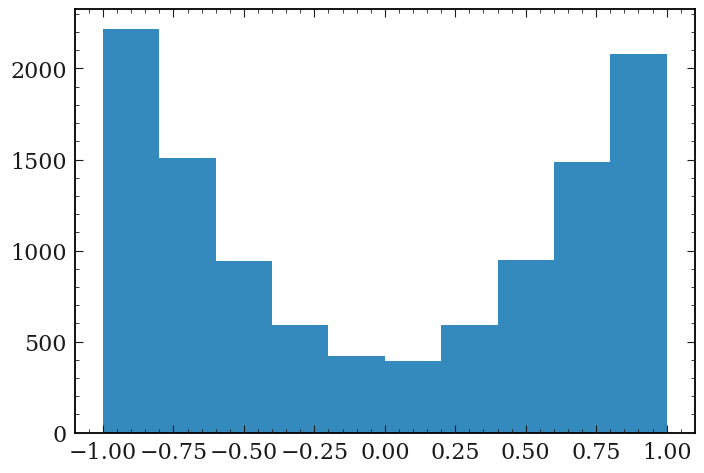

In [219]:
plt.hist(pd_phi.D0_cosHel_0)

In [220]:
D0_bkg_pd_phi = pd_phi[pd_phi["Pis_charge"]==1]
D0bar_bkg_pd_phi = pd_phi[pd_phi["Pis_charge"]==-1]

D0_bkg_pd_antiKstar = pd_antiKstar[pd_antiKstar["Pis_charge"]==1]
D0bar_bkg_pd_antiKstar = pd_antiKstar[pd_antiKstar["Pis_charge"]==-1]

D0_bkg_pd_rho_before_rand_selection = pd_rho[pd_rho["Pis_charge"]==1]
D0bar_bkg_pd_rho_before_rand_selection = pd_rho[pd_rho["Pis_charge"]==-1]

D0_bkg_pd_omega = pd_omega[pd_omega["omega_rank_Dstp"]==1]
D0bar_bkg_pd_omega = pd_omega[pd_omega["omega_rank_Dstm"]==-1]

In [221]:
D2omegapi0_file = '/media/jykim/ssd_T5/storage/01_recon/omega/specific_bkg/pre_extraction_D2omegapi0_mdst_700fb.root'
D2omegaeta_file = '/media/jykim/ssd_T5/storage/01_recon/omega/specific_bkg/pre_extraction_D2omegaeta_mdst_700fb.root'
D2pippimpi0eta_file = '/media/jykim/ssd_T5/storage/01_recon/omega/specific_bkg/pre_extraction_D2pippimpi0eta_mdst_700fb.root'

more_modes_variables = ['D0_M', 'D0_cosHel_0', 'Dstarp_CMS_p', '__ncandidates__', '__candidate__', 'Pi0_Prob', 'Pis_charge', 'omega_rank_Dstp', 'omega_rank_Dstm', 'D0_cosHel_2', 'Omega_InvM','D0_cosHel_0']
pd_D2omegapi0 = get_data(file=D2omegapi0_file,tree='omega', base_filter='omega_rank_Dstp==1',variables=more_modes_variables )
pd_D2omegaeta = get_data(file=D2omegaeta_file,tree='omega', base_filter='omega_rank_Dstp==1',variables=more_modes_variables )
pd_D2pippimpi0eta = get_data(file=D2pippimpi0eta_file,tree='omega', base_filter='omega_rank_Dstp==1',variables=more_modes_variables )

In [222]:
D0_bkg_pd_omega_with_other_bkg = pd.concat([D0_bkg_pd_omega, pd_D2omegapi0, pd_D2omegaeta, pd_D2pippimpi0eta], ignore_index=True)

In [223]:
single_D0_bkg_pd_rho_before_rand_selection =D0_bkg_pd_rho_before_rand_selection[D0_bkg_pd_rho_before_rand_selection['__ncandidates__']==1]
single_D0bar_bkg_pd_rho_before_rand_selection =D0bar_bkg_pd_rho_before_rand_selection[D0bar_bkg_pd_rho_before_rand_selection['__ncandidates__']==1]


Temp_D0 = single_D0_bkg_pd_rho_before_rand_selection
Temp_D0bar = single_D0bar_bkg_pd_rho_before_rand_selection
for number in range(2,10):
   
    multi_selected = D0_bkg_pd_rho_before_rand_selection[D0_bkg_pd_rho_before_rand_selection['__ncandidates__']==number]
    if len(multi_selected)==0:
        print("maximum number of multiple candidates is " + str(number-1))
        break        
    multi_selected = multi_selected.sample(frac=1/number)
    Temp_D0 = pd.concat([Temp_D0, multi_selected], ignore_index=True)
    
for number in range(2,10):
   
    multi_selected = D0bar_bkg_pd_rho_before_rand_selection[D0bar_bkg_pd_rho_before_rand_selection['__ncandidates__']==number]
    if len(multi_selected)==0:
        print("maximum number of multiple candidates is " + str(number-1))
        break        
    multi_selected = multi_selected.sample(frac=1/number)
    Temp_D0bar = pd.concat([Temp_D0bar, multi_selected], ignore_index=True)    
    
    
BCS_D0_bkg_pd_rho = Temp_D0
BCS_D0bar_bkg_pd_rho = Temp_D0bar

maximum number of multiple candidates is 4
maximum number of multiple candidates is 4


# Signal

In [224]:
general_file = '/media/jykim/ssd_T5/storage/01_recon/vector/train_v2_pre_extraction_signalMC_recon_mdst_vector.root'

In [225]:
variables=['D0_M',"Pis_charge","Dstarp_CMS_p","Pi0_Prob","__ncandidates__",'D0_cosHel_0']

In [226]:
phi_file = general_file.replace("vector","phi")
rho_file = general_file.replace("vector","rho")
antiKstar_file = general_file.replace("vector","antiKstar")
omega_file = general_file.replace("vector","omega")

In [227]:
base_filter = 'Pis_charge==1'
base_omega_plus_filter = 'omega_rank_Dstp==1'

In [228]:
half_1M_1_phi = get_data(file=phi_file, tree='phi', base_filter=base_filter,variables=variables)
half_1M_1_rho = get_data(file=rho_file, tree='rho', base_filter=base_filter,variables=variables)
half_1M_1_antiKstar = get_data(file=antiKstar_file, tree='antiKstar', base_filter=base_filter,variables=variables)
half_1M_1_omega = get_data(file=omega_file, tree='omega', base_filter=base_omega_plus_filter,variables=variables)

In [229]:
Temp_D0 = half_1M_1_rho
for number in range(2,10):
   
    multi_selected = half_1M_1_rho[half_1M_1_rho['__ncandidates__']==number]
    if len(multi_selected)==0:
        print("maximum number of multiple candidates is " + str(number-1))
        break        
    multi_selected = multi_selected.sample(frac=1/number)
    Temp_D0 = pd.concat([Temp_D0, multi_selected], ignore_index=True)    
    
    
BCS_half_1M_1_rho = Temp_D0

maximum number of multiple candidates is 5


In [230]:
df_describe = pd.DataFrame(BCS_half_1M_1_rho)
df_describe.describe()

D0_M  Pis_charge  Dstarp_CMS_p      Pi0_Prob  __ncandidates__  \
count  95074.000000     95074.0  95074.000000  9.507400e+04     95074.000000   
mean       1.855937         1.0      3.295491  3.445803e-01         1.054663   
std        0.033419         0.0      0.669787  3.334802e-01         0.234204   
min        1.665064         1.0      2.062439  1.929980e-07         1.000000   
25%        1.844781         1.0      2.742978  3.519083e-02         1.000000   
50%        1.859507         1.0      3.251066  2.442920e-01         1.000000   
75%        1.871502         1.0      3.808784  6.217461e-01         1.000000   
max        2.064886         1.0      5.067832  9.945960e-01         5.000000   

        D0_cosHel_0  
count  95074.000000  
mean       0.002658  
std        0.450828  
min       -0.999030  
25%       -0.347437  
50%        0.003805  
75%        0.354997  
max        0.999076

In [231]:
# For 1ab inv 

In [232]:
len(half_1M_1_phi) * 0.01257 

600.69516

In [233]:
len(half_1M_1_rho) * 0.00808

754.672

In [234]:
len(half_1M_1_antiKstar) * 0.18852

11106.27876

In [235]:
len(half_1M_1_omega) * 0.08977

3399.76944

In [236]:
# For 700fb inv 

In [237]:
len(half_1M_1_phi) * 0.01257  * 0.7

420.486612

In [238]:
len(half_1M_1_rho) * 0.00808 * 0.7

528.2704

In [239]:
len(half_1M_1_antiKstar) * 0.18852 * 0.7

7774.395131999999

In [240]:
len(half_1M_1_omega) * 0.08977 * 0.7

2379.838608

# Phi

In [30]:
len(D0_bkg_pd_phi)

5725

In [31]:
len(half_1M_1_phi) * 0.01257  * 0.7

420.486612

In [32]:
signal_df = half_1M_1_phi
bkg_df    = D0_bkg_pd_phi

In [33]:
nSig = len(signal_df)
nBkg = len(bkg_df)

In [34]:
import math
def FOM_phi(nS, nB):
    nS_scaled = nS * 0.01257  * 0.7
    return nS_scaled/math.sqrt(nS_scaled+nB)

In [35]:
FOM_phi(nSig,nBkg)

5.363818011283465

## 2d(P_Dstar, pi0_veto)

In [36]:
X,Y = np.mgrid[0.01:0.991:0.01, 2.1:3.001:0.01]

In [37]:
xy = np.vstack((X.flatten(), Y.flatten())).T

In [38]:
xy

array([[0.01, 2.1 ],
       [0.01, 2.11],
       [0.01, 2.12],
       ...,
       [0.99, 2.98],
       [0.99, 2.99],
       [0.99, 3.  ]])

In [39]:
FOM_phi_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []
for (Pi0_cut,Dstar_momentum_cut) in xy:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = half_1M_1_phi
    bkg_df    = D0_bkg_pd_phi
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    nSig_list.append(nSig * 0.01257  * 0.7)
    nBkg_list.append(nBkg)    
    FOM_phi_list.append(FOM_phi(nSig,nBkg))
    
    print(FOM_phi(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Pi0_cut)
    y_values_list.append(Dstar_momentum_cut)

0.01
2.1
4.076092544528657
0.01
2.11
4.076092544528657
0.01
2.12
4.087761800310718
0.01
2.13
4.085419540738122
0.01
2.14
4.094853984548177
0.01
2.15
4.094267034357994
0.01
2.16
4.1055741771015635
0.01
2.17
4.1020444749761715
0.01
2.18
4.099690742752792
0.01
2.19
4.0985136973116125
0.01
2.2
4.09674790490584
0.01
2.21
4.092626675642223
0.01
2.22
4.110813366268077
0.01
2.23
4.103712218037987
0.01
2.24
4.1007521109069165
0.01
2.25
4.094237189939462
0.01
2.2600000000000002
4.087718572589818
0.01
2.27
4.07882358282736
0.01
2.2800000000000002
4.088604334664641
0.01
2.29
4.0967137441316055
0.01
2.3000000000000003
4.087173022627909
0.01
2.31
4.079415297920129
0.01
2.3200000000000003
4.072846938881024
0.01
2.33
4.079810060272093
0.01
2.34
4.102480142466171
0.01
2.35
4.094657933191998
0.01
2.3600000000000003
4.089239369234596
0.01
2.37
4.075380053571914
0.01
2.38
4.068142317250645
0.01
2.39
4.060296171955015
0.01
2.4
4.05184034395115
0.01
2.41
4.072983948059118
0.01
2.42
4.06569700732165
0.01
2.4

4.99653473338552
0.04
2.3600000000000003
4.988440580066352
0.04
2.37
4.971761793778853
0.04
2.38
4.97212148154158
0.04
2.39
4.962084981584187
0.04
2.4
4.952998281666184
0.04
2.41
4.962381963015225
0.04
2.42
4.951817413043997
0.04
2.43
4.951270629633283
0.04
2.44
4.940194427518124
0.04
2.45
4.942550486836634
0.04
2.46
4.929512312733863
0.04
2.47
4.938664216791097
0.04
2.48
4.9279943425398995
0.04
2.49
4.913917155432525
0.04
2.5
4.933021267332241
0.04
2.5100000000000002
4.921791176780465
0.04
2.52
4.903706420830342
0.04
2.5300000000000002
4.90377138130846
0.04
2.54
4.892493772779493
0.04
2.5500000000000003
4.880716086849947
0.04
2.56
4.876830013176872
0.04
2.5700000000000003
4.878386487551573
0.04
2.58
4.889050762521149
0.04
2.59
4.892237327044645
0.04
2.6
4.879835030807197
0.04
2.6100000000000003
4.86543430841984
0.04
2.62
4.850023693386884
0.04
2.63
4.834595735196812
0.04
2.64
4.8201473866396185
0.04
2.6500000000000004
4.82274198300967
0.04
2.66
4.820378315630521
0.04
2.67
4.8003360748

5.451266054629997
0.06999999999999999
2.62
5.444752092022994
0.06999999999999999
2.63
5.426567351200192
0.06999999999999999
2.64
5.409249686042267
0.06999999999999999
2.6500000000000004
5.406665309168092
0.06999999999999999
2.66
5.400974900471762
0.06999999999999999
2.67
5.380887223598743
0.06999999999999999
2.68
5.373366806630576
0.06999999999999999
2.69
5.365393446621461
0.06999999999999999
2.7
5.360561980638388
0.06999999999999999
2.71
5.355738381182484
0.06999999999999999
2.72
5.347309651972187
0.06999999999999999
2.73
5.34204198376329
0.06999999999999999
2.74
5.345859211627253
0.06999999999999999
2.75
5.32126546120504
0.06999999999999999
2.7600000000000002
5.319923192927497
0.06999999999999999
2.77
5.310120086606264
0.06999999999999999
2.7800000000000002
5.2894636098938514
0.06999999999999999
2.79
5.289088091706618
0.06999999999999999
2.8000000000000003
5.294844968499744
0.06999999999999999
2.81
5.284105580550406
0.06999999999999999
2.8200000000000003
5.272417229203269
0.069999999

5.575948798490859
0.09999999999999999
2.8600000000000003
5.575462091225054
0.09999999999999999
2.87
5.574675111488697
0.09999999999999999
2.88
5.5687892083278685
0.09999999999999999
2.89
5.556334498285073
0.09999999999999999
2.9000000000000004
5.524664857227521
0.09999999999999999
2.91
5.513474730923399
0.09999999999999999
2.92
5.4877272271842354
0.09999999999999999
2.93
5.465444439261998
0.09999999999999999
2.94
5.48881662002059
0.09999999999999999
2.95
5.468669968148363
0.09999999999999999
2.96
5.458413801822842
0.09999999999999999
2.97
5.455322769353668
0.09999999999999999
2.98
5.454107401343235
0.09999999999999999
2.99
5.448947812754186
0.09999999999999999
3.0
5.4452143852082395
0.11
2.1
6.038059204118923
0.11
2.11
6.037698361992016
0.11
2.12
6.042845931113162
0.11
2.13
6.044399698418735
0.11
2.14
6.045605978958476
0.11
2.15
6.050810900892685
0.11
2.16
6.061648345745714
0.11
2.17
6.055842025730891
0.11
2.18
6.063849278976416
0.11
2.19
6.0587578708012755
0.11
2.2
6.0543927356609615


6.325667357990872
0.14
2.18
6.331743465190675
0.14
2.19
6.326293235177126
0.14
2.2
6.320841569706008
0.14
2.21
6.331745661865031
0.14
2.22
6.332135005536732
0.14
2.23
6.3163836005712914
0.14
2.24
6.323691427524975
0.14
2.25
6.320310296199125
0.14
2.2600000000000002
6.314521058134632
0.14
2.27
6.313629578627649
0.14
2.2800000000000002
6.317266983559091
0.14
2.29
6.318532874175251
0.14
2.3000000000000003
6.308604722235471
0.14
2.31
6.30317701023926
0.14
2.3200000000000003
6.29287656698986
0.14
2.33
6.293501230316223
0.14
2.34
6.3085262932477795
0.14
2.35
6.297178009095266
0.14
2.3600000000000003
6.288616910013212
0.14
2.37
6.268605709462237
0.14
2.38
6.2727311859814785
0.14
2.39
6.263432902263576
0.14
2.4
6.257654401172672
0.14
2.41
6.261573307012761
0.14
2.42
6.253325658806633
0.14
2.43
6.272632292209396
0.14
2.44
6.2555113339193
0.14
2.45
6.261549803131414
0.14
2.46
6.249018397249713
0.14
2.47
6.246177167820449
0.14
2.48
6.228198894856017
0.14
2.49
6.213078147818133
0.14
2.5
6.21385285

6.449730043007765
0.17
2.42
6.454246113262228
0.17
2.43
6.4705804182908615
0.17
2.44
6.45162579876297
0.17
2.45
6.467917974424054
0.17
2.46
6.45447127876683
0.17
2.47
6.449016762851396
0.17
2.48
6.430574210690459
0.17
2.49
6.4202971219857785
0.17
2.5
6.418786454251283
0.17
2.5100000000000002
6.39815939449717
0.17
2.52
6.410570182835086
0.17
2.5300000000000002
6.400781271390181
0.17
2.54
6.391670480362335
0.17
2.5500000000000003
6.374682380915614
0.17
2.56
6.367500111184639
0.17
2.5700000000000003
6.358341377828857
0.17
2.58
6.366364720453973
0.17
2.59
6.361355552202098
0.17
2.6
6.343128333363473
0.17
2.6100000000000003
6.3262090262085815
0.17
2.62
6.3186858137986635
0.17
2.63
6.302402708594303
0.17
2.64
6.289617302247849
0.17
2.6500000000000004
6.287015744803203
0.17
2.66
6.279473372005982
0.17
2.67
6.2556580506121024
0.17
2.68
6.248775566853908
0.17
2.69
6.235517931317464
0.17
2.7
6.228269749520526
0.17
2.71
6.2231859903145805
0.17
2.72
6.222446729555689
0.17
2.73
6.2181572836744285
0

6.546018117859062
0.2
2.6
6.527303687372735
0.2
2.6100000000000003
6.508824051697545
0.2
2.62
6.499787145406649
0.2
2.63
6.48157046107505
0.2
2.64
6.481364911760624
0.2
2.6500000000000004
6.476455787586184
0.2
2.66
6.468113260303012
0.2
2.67
6.442203538190738
0.2
2.68
6.43483877863099
0.2
2.69
6.420574402094517
0.2
2.7
6.412846967361555
0.2
2.71
6.405474382113703
0.2
2.72
6.403007534497894
0.2
2.73
6.3977821346528705
0.2
2.74
6.387339354966839
0.2
2.75
6.363755833291589
0.2
2.7600000000000002
6.356459315498574
0.2
2.77
6.344874613091299
0.2
2.7800000000000002
6.31999354931653
0.2
2.79
6.307969976007448
0.2
2.8000000000000003
6.303870622863746
0.2
2.81
6.281725070711104
0.2
2.8200000000000003
6.25699920313133
0.2
2.83
6.241256141093743
0.2
2.84
6.262127703586867
0.2
2.85
6.265747448170485
0.2
2.8600000000000003
6.27096818544947
0.2
2.87
6.267812540710412
0.2
2.88
6.249286841132042
0.2
2.89
6.230021335520061
0.2
2.9000000000000004
6.1922611420488325
0.2
2.91
6.1734922213337
0.2
2.92
6.15

6.481659823053374
0.23
2.7800000000000002
6.456535916223891
0.23
2.79
6.441917692031506
0.23
2.8000000000000003
6.435185302797267
0.23
2.81
6.412588751825057
0.23
2.8200000000000003
6.394394873786599
0.23
2.83
6.376848023286927
0.23
2.84
6.394298468306353
0.23
2.85
6.3955662952751915
0.23
2.8600000000000003
6.398568981929656
0.23
2.87
6.393334611397832
0.23
2.88
6.374060445729984
0.23
2.89
6.354206891763196
0.23
2.9000000000000004
6.315525671528671
0.23
2.91
6.294206972391594
0.23
2.92
6.272347312719648
0.23
2.93
6.257507135864931
0.23
2.94
6.274126385070741
0.23
2.95
6.267770859657422
0.23
2.96
6.249595351374893
0.23
2.97
6.2570343187701996
0.23
2.98
6.253266461779181
0.23
2.99
6.244388948343043
0.23
3.0
6.244971286976357
0.24000000000000002
2.1
6.947602113627421
0.24000000000000002
2.11
6.947304040189999
0.24000000000000002
2.12
6.950565411376518
0.24000000000000002
2.13
6.9505536876380445
0.24000000000000002
2.14
6.9493526410364925
0.24000000000000002
2.15
6.950247949381381
0.240000

7.118676530531471
0.27
2.12
7.1217980778782
0.27
2.13
7.120875138045308
0.27
2.14
7.119666088491501
0.27
2.15
7.125382509320917
0.27
2.16
7.131715042657292
0.27
2.17
7.1337220543658555
0.27
2.18
7.135463978978567
0.27
2.19
7.133429909305715
0.27
2.2
7.125267120269458
0.27
2.21
7.129385593503699
0.27
2.22
7.130055425319946
0.27
2.23
7.121927949202599
0.27
2.24
7.128313480708412
0.27
2.25
7.124041751196985
0.27
2.2600000000000002
7.118598318129434
0.27
2.27
7.112864041061038
0.27
2.2800000000000002
7.110982481657377
0.27
2.29
7.10674537270062
0.27
2.3000000000000003
7.097170182571425
0.27
2.31
7.08776899300727
0.27
2.3200000000000003
7.0721014031933525
0.27
2.33
7.072442663267107
0.27
2.34
7.07956776260633
0.27
2.35
7.076149643444376
0.27
2.3600000000000003
7.074573603520088
0.27
2.37
7.064107140799602
0.27
2.38
7.064912497062109
0.27
2.39
7.053327484170197
0.27
2.4
7.043846309875387
0.27
2.41
7.040254370405007
0.27
2.42
7.045481938649256
0.27
2.43
7.068580779915585
0.27
2.44
7.046529875

7.270982648364239
0.3
2.47
7.259991986573213
0.3
2.48
7.249882680780907
0.3
2.49
7.242183236977316
0.3
2.5
7.232700434200935
0.3
2.5100000000000002
7.208074479492062
0.3
2.52
7.224096142573736
0.3
2.5300000000000002
7.213986160482528
0.3
2.54
7.198932213047113
0.3
2.5500000000000003
7.179838754593857
0.3
2.56
7.180151158769881
0.3
2.5700000000000003
7.170597135747606
0.3
2.58
7.171346253417366
0.3
2.59
7.159970569124153
0.3
2.6
7.138514288876147
0.3
2.6100000000000003
7.117443532509883
0.3
2.62
7.122359818917862
0.3
2.63
7.10212564034555
0.3
2.64
7.095739056416442
0.3
2.6500000000000004
7.083634938426426
0.3
2.66
7.076343010427904
0.3
2.67
7.047684038741689
0.3
2.68
7.035182277608599
0.3
2.69
7.016253702045748
0.3
2.7
7.002125008817329
0.3
2.71
6.9889118465145454
0.3
2.72
6.9873516483114715
0.3
2.73
6.977287626823382
0.3
2.74
6.969195820269853
0.3
2.75
6.949587150547744
0.3
2.7600000000000002
6.94185106229665
0.3
2.77
6.944713291986895
0.3
2.7800000000000002
6.917427287612365
0.3
2.79


7.32766654653068
0.33
2.56
7.326118023109201
0.33
2.5700000000000003
7.3212884517252865
0.33
2.58
7.320781565475969
0.33
2.59
7.3069334803897865
0.33
2.6
7.28414734504345
0.33
2.6100000000000003
7.26262094938541
0.33
2.62
7.272297708888413
0.33
2.63
7.256548865831166
0.33
2.64
7.248484314638778
0.33
2.6500000000000004
7.236028242517245
0.33
2.66
7.227975249143846
0.33
2.67
7.1996175687868735
0.33
2.68
7.187073953976897
0.33
2.69
7.167016104771936
0.33
2.7
7.15195661999565
0.33
2.71
7.144089135406329
0.33
2.72
7.141046539128981
0.33
2.73
7.129656368352767
0.33
2.74
7.119263190346063
0.33
2.75
7.097265029531179
0.33
2.7600000000000002
7.088433967036311
0.33
2.77
7.095253108021652
0.33
2.7800000000000002
7.066955825040584
0.33
2.79
7.052598915635078
0.33
2.8000000000000003
7.051792374593419
0.33
2.81
7.025112486318035
0.33
2.8200000000000003
7.000548712366412
0.33
2.83
6.986733708493451
0.33
2.84
6.9992554034025005
0.33
2.85
6.995915262131566
0.33
2.8600000000000003
7.000674340974451
0.33

7.25523435137125
0.36000000000000004
2.68
7.240921836697597
0.36000000000000004
2.69
7.218639368412639
0.36000000000000004
2.7
7.202767059075798
0.36000000000000004
2.71
7.191856472460743
0.36000000000000004
2.72
7.191620492689318
0.36000000000000004
2.73
7.177485641654969
0.36000000000000004
2.74
7.164478817614024
0.36000000000000004
2.75
7.141248531773899
0.36000000000000004
2.7600000000000002
7.130920973372637
0.36000000000000004
2.77
7.140166307790331
0.36000000000000004
2.7800000000000002
7.110335889990771
0.36000000000000004
2.79
7.105945697760776
0.36000000000000004
2.8000000000000003
7.102606696186766
0.36000000000000004
2.81
7.075011557599958
0.36000000000000004
2.8200000000000003
7.053640185556925
0.36000000000000004
2.83
7.039021072051367
0.36000000000000004
2.84
7.049588701932102
0.36000000000000004
2.85
7.0445524785394165
0.36000000000000004
2.8600000000000003
7.047195268888939
0.36000000000000004
2.87
7.040512475769188
0.36000000000000004
2.88
7.022277763069964
0.36000000

7.217272923457761
0.39
2.7600000000000002
7.204994127003422
0.39
2.77
7.211152776399657
0.39
2.7800000000000002
7.1802660624171555
0.39
2.79
7.174796261738844
0.39
2.8000000000000003
7.170031607379722
0.39
2.81
7.140592446017545
0.39
2.8200000000000003
7.123835459504064
0.39
2.83
7.108007404161739
0.39
2.84
7.121839988039214
0.39
2.85
7.12107009142193
0.39
2.8600000000000003
7.1208452571433325
0.39
2.87
7.109861872446617
0.39
2.88
7.095823732934784
0.39
2.89
7.0829018206057
0.39
2.9000000000000004
7.046433983750577
0.39
2.91
7.031965640130259
0.39
2.92
7.016430134642743
0.39
2.93
7.001329902348078
0.39
2.94
7.003943630888095
0.39
2.95
6.988327822940393
0.39
2.96
6.959239452692198
0.39
2.97
6.958774667046054
0.39
2.98
6.941299548734164
0.39
2.99
6.935600801942454
0.39
3.0
6.931024517777173
0.4
2.1
7.65922172462189
0.4
2.11
7.657958595001734
0.4
2.12
7.660069732725135
0.4
2.13
7.658139802343765
0.4
2.14
7.659598912529716
0.4
2.15
7.662846646025638
0.4
2.16
7.664337292425794
0.4
2.17
7.67

7.173403336415342
0.42000000000000004
2.85
7.170159781085452
0.42000000000000004
2.8600000000000003
7.174072296246887
0.42000000000000004
2.87
7.167557411449314
0.42000000000000004
2.88
7.151517101334896
0.42000000000000004
2.89
7.136685069776434
0.42000000000000004
2.9000000000000004
7.104273141641256
0.42000000000000004
2.91
7.095092500514076
0.42000000000000004
2.92
7.078332798445332
0.42000000000000004
2.93
7.06216546394103
0.42000000000000004
2.94
7.06300561973527
0.42000000000000004
2.95
7.04598701660105
0.42000000000000004
2.96
7.01639684364789
0.42000000000000004
2.97
7.0175160902756355
0.42000000000000004
2.98
6.998174224621656
0.42000000000000004
2.99
6.989083070972097
0.42000000000000004
3.0
6.987846864467196
0.43
2.1
7.703508998894243
0.43
2.11
7.702276001274003
0.43
2.12
7.7042391524552425
0.43
2.13
7.702257392258577
0.43
2.14
7.703484735332188
0.43
2.15
7.706208999337372
0.43
2.16
7.706721161698275
0.43
2.17
7.715745457712043
0.43
2.18
7.722100110139543
0.43
2.19
7.722192

7.195246459100258
0.45
2.9000000000000004
7.161850523992088
0.45
2.91
7.150826990794961
0.45
2.92
7.133200280219854
0.45
2.93
7.1154273663900645
0.45
2.94
7.114916682869553
0.45
2.95
7.095667555011808
0.45
2.96
7.0634631382594355
0.45
2.97
7.062235316309475
0.45
2.98
7.042312669771041
0.45
2.99
7.030886577827506
0.45
3.0
7.02787511326584
0.46
2.1
7.8253775499634255
0.46
2.11
7.824169867644659
0.46
2.12
7.8260669260038656
0.46
2.13
7.82385821569724
0.46
2.14
7.828129106210499
0.46
2.15
7.830510597345487
0.46
2.16
7.830966178794722
0.46
2.17
7.8392022010848335
0.46
2.18
7.844597529409869
0.46
2.19
7.847586780371715
0.46
2.2
7.845203991383854
0.46
2.21
7.846569193200025
0.46
2.22
7.853732826405268
0.46
2.23
7.8556226949230545
0.46
2.24
7.868185677045463
0.46
2.25
7.855553358574697
0.46
2.2600000000000002
7.851044528815839
0.46
2.27
7.84246839262789
0.46
2.2800000000000002
7.83401557660234
0.46
2.29
7.829162493308954
0.46
2.3000000000000003
7.817336469942243
0.46
2.31
7.814877436556213
0.4

7.139169819139447
0.48000000000000004
2.98
7.117933845247321
0.48000000000000004
2.99
7.109668989488481
0.48000000000000004
3.0
7.105485068515014
0.49
2.1
7.86858912030615
0.49
2.11
7.867410419994902
0.49
2.12
7.869170350283339
0.49
2.13
7.866922857326038
0.49
2.14
7.870577358432956
0.49
2.15
7.872478306938528
0.49
2.16
7.875707826284555
0.49
2.17
7.882814979992544
0.49
2.18
7.8872329805797925
0.49
2.19
7.893131612073737
0.49
2.2
7.889907375562684
0.49
2.21
7.889198168473164
0.49
2.22
7.894902944007283
0.49
2.23
7.89950494145774
0.49
2.24
7.91801739599422
0.49
2.25
7.905257178219631
0.49
2.2600000000000002
7.899525638126725
0.49
2.27
7.894053392627831
0.49
2.2800000000000002
7.884890383342026
0.49
2.29
7.882838139972024
0.49
2.3000000000000003
7.870048742501694
0.49
2.31
7.866565751672116
0.49
2.3200000000000003
7.853510848194967
0.49
2.33
7.851096156115343
0.49
2.34
7.847432977720712
0.49
2.35
7.843386107276426
0.49
2.3600000000000003
7.8429443804355925
0.49
2.37
7.830125857747114
0.4

7.909096957804118
0.52
2.12
7.910745484259079
0.52
2.13
7.908470938535717
0.52
2.14
7.911129550690967
0.52
2.15
7.912607113768629
0.52
2.16
7.918607731339996
0.52
2.17
7.928288101722974
0.52
2.18
7.931861792305381
0.52
2.19
7.937112879529414
0.52
2.2
7.936941850955596
0.52
2.21
7.942272474883434
0.52
2.22
7.947238929120271
0.52
2.23
7.951047398624088
0.52
2.24
7.972227381172809
0.52
2.25
7.958405329856836
0.52
2.2600000000000002
7.95180764093126
0.52
2.27
7.9456961155966646
0.52
2.2800000000000002
7.939395411770522
0.52
2.29
7.936165481979401
0.52
2.3000000000000003
7.931027827060118
0.52
2.31
7.927373666882963
0.52
2.3200000000000003
7.917261341179481
0.52
2.33
7.9131631288023145
0.52
2.34
7.908370359657089
0.52
2.35
7.907026179091569
0.52
2.3600000000000003
7.905764449471429
0.52
2.37
7.892769653123108
0.52
2.38
7.882234209100352
0.52
2.39
7.862040921331393
0.52
2.4
7.844747257177418
0.52
2.41
7.8437663809209
0.52
2.42
7.835143111905818
0.52
2.43
7.84609788708767
0.52
2.44
7.83031109

7.9050798610476205
0.55
2.3200000000000003
7.893494379813363
0.55
2.33
7.887842293681321
0.55
2.34
7.885035511725543
0.55
2.35
7.884615001603034
0.55
2.3600000000000003
7.8859535840453265
0.55
2.37
7.879061534155751
0.55
2.38
7.867532922970472
0.55
2.39
7.850231826340419
0.55
2.4
7.836708694345068
0.55
2.41
7.837505786357905
0.55
2.42
7.8304147154484935
0.55
2.43
7.839459127072332
0.55
2.44
7.822940519095044
0.55
2.45
7.843362283800982
0.55
2.46
7.8311898178030654
0.55
2.47
7.828514768673334
0.55
2.48
7.815384689554369
0.55
2.49
7.799301821212933
0.55
2.5
7.7839238347221045
0.55
2.5100000000000002
7.760623532687394
0.55
2.52
7.768960280448695
0.55
2.5300000000000002
7.762747894877909
0.55
2.54
7.744512414235513
0.55
2.5500000000000003
7.716241679237835
0.55
2.56
7.712487465363238
0.55
2.5700000000000003
7.698420320474789
0.55
2.58
7.694490417905181
0.55
2.59
7.672567025327743
0.55
2.6
7.655667407481803
0.55
2.6100000000000003
7.639485647930553
0.55
2.62
7.6353199964256655
0.55
2.63
7.6

7.939925476252948
0.5800000000000001
2.25
7.927575699203078
0.5800000000000001
2.2600000000000002
7.92629260801207
0.5800000000000001
2.27
7.9179346827647015
0.5800000000000001
2.2800000000000002
7.907590222904459
0.5800000000000001
2.29
7.9019446613347775
0.5800000000000001
2.3000000000000003
7.897815288527556
0.5800000000000001
2.31
7.893762659877439
0.5800000000000001
2.3200000000000003
7.88199994035067
0.5800000000000001
2.33
7.874775400968828
0.5800000000000001
2.34
7.8771796458734515
0.5800000000000001
2.35
7.874395332659354
0.5800000000000001
2.3600000000000003
7.877715003340552
0.5800000000000001
2.37
7.870195337436504
0.5800000000000001
2.38
7.858248042574877
0.5800000000000001
2.39
7.839949262606152
0.5800000000000001
2.4
7.825806434611989
0.5800000000000001
2.41
7.825552939891862
0.5800000000000001
2.42
7.817574333418483
0.5800000000000001
2.43
7.82776590712303
0.5800000000000001
2.44
7.810090979516725
0.5800000000000001
2.45
7.826602094887772
0.5800000000000001
2.46
7.81337

7.908163893141268
0.61
2.21
7.915863943763782
0.61
2.22
7.923049958463694
0.61
2.23
7.923753024890738
0.61
2.24
7.940245747363017
0.61
2.25
7.926790482584914
0.61
2.2600000000000002
7.9247998888258335
0.61
2.27
7.919006294939221
0.61
2.2800000000000002
7.908173116984559
0.61
2.29
7.90781962337388
0.61
2.3000000000000003
7.903065111374586
0.61
2.31
7.897120000885508
0.61
2.3200000000000003
7.884585532260288
0.61
2.33
7.8803435953115155
0.61
2.34
7.884735480430901
0.61
2.35
7.884071927936144
0.61
2.3600000000000003
7.886011277774875
0.61
2.37
7.881584992534609
0.61
2.38
7.868639191986861
0.61
2.39
7.849390087182752
0.61
2.4
7.834900229898188
0.61
2.41
7.836788870351677
0.61
2.42
7.831286246457138
0.61
2.43
7.838662836891994
0.61
2.44
7.819923762501576
0.61
2.45
7.837095707942849
0.61
2.46
7.8267623617787425
0.61
2.47
7.8208820318811565
0.61
2.48
7.805360354202986
0.61
2.49
7.78722758364118
0.61
2.5
7.7709341321368095
0.61
2.5100000000000002
7.750091103036728
0.61
2.52
7.76079396151719
0.

7.923315689987392
0.64
2.17
7.931882624490665
0.64
2.18
7.931598704105413
0.64
2.19
7.939099520446207
0.64
2.2
7.935731167633714
0.64
2.21
7.942182915930098
0.64
2.22
7.954504061891179
0.64
2.23
7.9535136883019995
0.64
2.24
7.968584137673053
0.64
2.25
7.9547660150195405
0.64
2.2600000000000002
7.952455550931134
0.64
2.27
7.9453808486996405
0.64
2.2800000000000002
7.939622561865124
0.64
2.29
7.937624792358645
0.64
2.3000000000000003
7.931950768658933
0.64
2.31
7.925598462775416
0.64
2.3200000000000003
7.912392941351874
0.64
2.33
7.910567557568335
0.64
2.34
7.920090965797518
0.64
2.35
7.918113207207562
0.64
2.3600000000000003
7.918677644092828
0.64
2.37
7.919576116511262
0.64
2.38
7.905073636487814
0.64
2.39
7.885597966041848
0.64
2.4
7.8707996576485195
0.64
2.41
7.8704174130222615
0.64
2.42
7.8633164435679435
0.64
2.43
7.8726354507951415
0.64
2.44
7.852911382873098
0.64
2.45
7.869093466248232
0.64
2.46
7.858123838176471
0.64
2.47
7.854941471820884
0.64
2.48
7.842423885256835
0.64
2.49
7

7.967656731080981
0.67
2.25
7.953465137097709
0.67
2.2600000000000002
7.953415673416461
0.67
2.27
7.94858867102273
0.67
2.2800000000000002
7.941492928659563
0.67
2.29
7.938419695581898
0.67
2.3000000000000003
7.93745264313081
0.67
2.31
7.929771349955268
0.67
2.3200000000000003
7.916093515097612
0.67
2.33
7.91589352508484
0.67
2.34
7.929648183994625
0.67
2.35
7.926893283809536
0.67
2.3600000000000003
7.9257447745407115
0.67
2.37
7.925124167323938
0.67
2.38
7.9130479515833585
0.67
2.39
7.8927059390170795
0.67
2.4
7.876506269335633
0.67
2.41
7.877971796481257
0.67
2.42
7.8759708587571575
0.67
2.43
7.883848771505615
0.67
2.44
7.86294247720937
0.67
2.45
7.877208097346169
0.67
2.46
7.865301747806396
0.67
2.47
7.863987264042904
0.67
2.48
7.850186551535184
0.67
2.49
7.830130646658039
0.67
2.5
7.815366265655344
0.67
2.5100000000000002
7.799441396970556
0.67
2.52
7.8131990192179295
0.67
2.5300000000000002
7.808191325216919
0.67
2.54
7.787657658027512
0.67
2.5500000000000003
7.7611747936108575
0.

7.8972163903689125
0.7000000000000001
2.34
7.908692073847569
0.7000000000000001
2.35
7.9044803748759795
0.7000000000000001
2.3600000000000003
7.904982897285273
0.7000000000000001
2.37
7.903067980637496
0.7000000000000001
2.38
7.8897228859700785
0.7000000000000001
2.39
7.868732842995275
0.7000000000000001
2.4
7.8507263002085
0.7000000000000001
2.41
7.850516329990882
0.7000000000000001
2.42
7.847409102309778
0.7000000000000001
2.43
7.853047449147804
0.7000000000000001
2.44
7.831391454439923
0.7000000000000001
2.45
7.843373152551508
0.7000000000000001
2.46
7.833771891642425
0.7000000000000001
2.47
7.831278942536255
0.7000000000000001
2.48
7.816818494672071
0.7000000000000001
2.49
7.796539112823703
0.7000000000000001
2.5
7.78090309958517
0.7000000000000001
2.5100000000000002
7.764345975450555
0.7000000000000001
2.52
7.779479885636099
0.7000000000000001
2.5300000000000002
7.7764028025805665
0.7000000000000001
2.54
7.758609942578098
0.7000000000000001
2.5500000000000003
7.732308019997677
0.7

7.629428899427912
0.72
2.64
7.62226082487204
0.72
2.6500000000000004
7.615841949171254
0.72
2.66
7.598267145250966
0.72
2.67
7.578979498582083
0.72
2.68
7.568075589263926
0.72
2.69
7.551854272381201
0.72
2.7
7.539321624354601
0.72
2.71
7.522513172970377
0.72
2.72
7.5069201441450835
0.72
2.73
7.489492025949365
0.72
2.74
7.46310732944249
0.72
2.75
7.445272421301477
0.72
2.7600000000000002
7.431744953977893
0.72
2.77
7.43336915820051
0.72
2.7800000000000002
7.419817356604679
0.72
2.79
7.419239103947289
0.72
2.8000000000000003
7.400219319808097
0.72
2.81
7.362149632790033
0.72
2.8200000000000003
7.353680314637914
0.72
2.83
7.344283315845935
0.72
2.84
7.361964801350991
0.72
2.85
7.3509649120613565
0.72
2.8600000000000003
7.3490701867665384
0.72
2.87
7.330546725106694
0.72
2.88
7.303295779576012
0.72
2.89
7.284410669287669
0.72
2.9000000000000004
7.262245641750139
0.72
2.91
7.2458040309334395
0.72
2.92
7.227797138116292
0.72
2.93
7.206489865589345
0.72
2.94
7.201454131508468
0.72
2.95
7.1850

7.86928074147863
0.76
2.13
7.865608815453417
0.76
2.14
7.8646517659027975
0.76
2.15
7.865444561184998
0.76
2.16
7.8723126015912825
0.76
2.17
7.878884593014127
0.76
2.18
7.890487794430737
0.76
2.19
7.893263573080106
0.76
2.2
7.888354423612755
0.76
2.21
7.892915349263118
0.76
2.22
7.902624028865585
0.76
2.23
7.896020353246184
0.76
2.24
7.9116745227598875
0.76
2.25
7.907870494049507
0.76
2.2600000000000002
7.916494914724521
0.76
2.27
7.907605718779798
0.76
2.2800000000000002
7.8979973208952785
0.76
2.29
7.896971332613271
0.76
2.3000000000000003
7.896677596028472
0.76
2.31
7.891408802018465
0.76
2.3200000000000003
7.883942052271911
0.76
2.33
7.880091144839589
0.76
2.34
7.8901446334695455
0.76
2.35
7.8831978553535
0.76
2.3600000000000003
7.8823933170752225
0.76
2.37
7.880670581886681
0.76
2.38
7.870576943800222
0.76
2.39
7.850578946556257
0.76
2.4
7.8342583294006936
0.76
2.41
7.833225927664783
0.76
2.42
7.827905210073776
0.76
2.43
7.841192621289922
0.76
2.44
7.81787885754141
0.76
2.45
7.826

7.461140182986292
0.79
2.75
7.443101502312035
0.79
2.7600000000000002
7.436442169751795
0.79
2.77
7.436745252749281
0.79
2.7800000000000002
7.433765309048619
0.79
2.79
7.43879535850179
0.79
2.8000000000000003
7.417480795790757
0.79
2.81
7.387672962155107
0.79
2.8200000000000003
7.378267470628429
0.79
2.83
7.368319411301761
0.79
2.84
7.38296832668359
0.79
2.85
7.367887180196264
0.79
2.8600000000000003
7.364515554806512
0.79
2.87
7.34523495453406
0.79
2.88
7.321165846041084
0.79
2.89
7.303165050204856
0.79
2.9000000000000004
7.2804621228165125
0.79
2.91
7.26371475854883
0.79
2.92
7.2460879580303486
0.79
2.93
7.228589016858911
0.79
2.94
7.225638462250492
0.79
2.95
7.209187268087363
0.79
2.96
7.17387422115769
0.79
2.97
7.169135535360553
0.79
2.98
7.1440891381386775
0.79
2.99
7.125668411947014
0.79
3.0
7.105974873718414
0.8
2.1
7.77412603620296
0.8
2.11
7.774918493986317
0.8
2.12
7.77706424267784
0.8
2.13
7.773212345151282
0.8
2.14
7.771509544737586
0.8
2.15
7.77148619753664
0.8
2.16
7.7767

7.402826640811593
0.8200000000000001
2.7800000000000002
7.397200372239886
0.8200000000000001
2.79
7.398966251509661
0.8200000000000001
2.8000000000000003
7.376133366614336
0.8200000000000001
2.81
7.347570194111709
0.8200000000000001
2.8200000000000003
7.337556859355059
0.8200000000000001
2.83
7.331424848198988
0.8200000000000001
2.84
7.3424584300990325
0.8200000000000001
2.85
7.328820088080664
0.8200000000000001
2.8600000000000003
7.328412593412301
0.8200000000000001
2.87
7.310275902468475
0.8200000000000001
2.88
7.282928537626307
0.8200000000000001
2.89
7.261595959977884
0.8200000000000001
2.9000000000000004
7.237487954308015
0.8200000000000001
2.91
7.218928065328708
0.8200000000000001
2.92
7.202754723912906
0.8200000000000001
2.93
7.18597990061144
0.8200000000000001
2.94
7.181267376883894
0.8200000000000001
2.95
7.1622184787900425
0.8200000000000001
2.96
7.135036235599114
0.8200000000000001
2.97
7.127387652059915
0.8200000000000001
2.98
7.10083469251621
0.8200000000000001
2.99
7.0872

7.145068356602592
0.8400000000000001
2.93
7.1268965662843895
0.8400000000000001
2.94
7.12014483598009
0.8400000000000001
2.95
7.1019998326979294
0.8400000000000001
2.96
7.076032356379439
0.8400000000000001
2.97
7.067080413447179
0.8400000000000001
2.98
7.039772657710815
0.8400000000000001
2.99
7.023642738133619
0.8400000000000001
3.0
7.00752098325146
0.85
2.1
7.671066667172087
0.85
2.11
7.671664885515019
0.85
2.12
7.673216196831668
0.85
2.13
7.668704443611591
0.85
2.14
7.66645004308653
0.85
2.15
7.665433012041516
0.85
2.16
7.670638359057033
0.85
2.17
7.678104578801103
0.85
2.18
7.686918582761622
0.85
2.19
7.6881343081004525
0.85
2.2
7.6842846744437265
0.85
2.21
7.6847997135242965
0.85
2.22
7.6928294044945975
0.85
2.23
7.689369118128288
0.85
2.24
7.69634541338334
0.85
2.25
7.692113645997536
0.85
2.2600000000000002
7.69347281786266
0.85
2.27
7.686278846344239
0.85
2.2800000000000002
7.6834504623670465
0.85
2.29
7.6812174182546205
0.85
2.3000000000000003
7.679374979785858
0.85
2.31
7.6814

6.988930371159094
0.87
2.94
6.984235685257196
0.87
2.95
6.963145258603906
0.87
2.96
6.937706746205598
0.87
2.97
6.931843798429247
0.87
2.98
6.90926387289864
0.87
2.99
6.890302833863152
0.87
3.0
6.871540154677008
0.88
2.1
7.528765993692623
0.88
2.11
7.529218425150334
0.88
2.12
7.530294216574685
0.88
2.13
7.525674216776777
0.88
2.14
7.522467467714226
0.88
2.15
7.522765427655268
0.88
2.16
7.5264379411380435
0.88
2.17
7.531722834204891
0.88
2.18
7.540459338203285
0.88
2.19
7.541561152624224
0.88
2.2
7.5404707111854545
0.88
2.21
7.540533807609668
0.88
2.22
7.551053149595838
0.88
2.23
7.551095275411552
0.88
2.24
7.55502611745659
0.88
2.25
7.549854291930599
0.88
2.2600000000000002
7.550481034633137
0.88
2.27
7.541175652061082
0.88
2.2800000000000002
7.538378689658945
0.88
2.29
7.539185837937308
0.88
2.3000000000000003
7.538705359429583
0.88
2.31
7.541719532081992
0.88
2.3200000000000003
7.539809164961688
0.88
2.33
7.533195305474828
0.88
2.34
7.541518712144078
0.88
2.35
7.53400699668565
0.88
2

6.7992295097278905
0.9
2.95
6.777971137080675
0.9
2.96
6.7531948882074975
0.9
2.97
6.74557566943649
0.9
2.98
6.723984927243659
0.9
2.99
6.7036367604962255
0.9
3.0
6.684779964603522
0.91
2.1
7.363161838432549
0.91
2.11
7.36347159216847
0.91
2.12
7.364092436851151
0.91
2.13
7.3595616819540925
0.91
2.14
7.355972864230748
0.91
2.15
7.356724632793372
0.91
2.16
7.361658742019717
0.91
2.17
7.364046680007006
0.91
2.18
7.372185590584017
0.91
2.19
7.375186114140105
0.91
2.2
7.37248872357423
0.91
2.21
7.371332854321395
0.91
2.22
7.3803623669647775
0.91
2.23
7.38107717427651
0.91
2.24
7.384592530413849
0.91
2.25
7.378914186720353
0.91
2.2600000000000002
7.381249734330784
0.91
2.27
7.370011472995711
0.91
2.2800000000000002
7.3660895714543
0.91
2.29
7.365999647307714
0.91
2.3000000000000003
7.367181944750206
0.91
2.31
7.370006505610972
0.91
2.3200000000000003
7.368578762360596
0.91
2.33
7.3602055769595705
0.91
2.34
7.363921750279826
0.91
2.35
7.3557851518385196
0.91
2.3600000000000003
7.350427490527

6.952097755916473
0.9400000000000001
2.5300000000000002
6.9600354837573555
0.9400000000000001
2.54
6.9522649782941395
0.9400000000000001
2.5500000000000003
6.936428284218554
0.9400000000000001
2.56
6.93935524498097
0.9400000000000001
2.5700000000000003
6.928766194569888
0.9400000000000001
2.58
6.923003749757743
0.9400000000000001
2.59
6.90327948392748
0.9400000000000001
2.6
6.894593891863807
0.9400000000000001
2.6100000000000003
6.881398145804305
0.9400000000000001
2.62
6.871335703296172
0.9400000000000001
2.63
6.858303628091837
0.9400000000000001
2.64
6.853579322574178
0.9400000000000001
2.6500000000000004
6.850731444662609
0.9400000000000001
2.66
6.841152194942856
0.9400000000000001
2.67
6.825639281486528
0.9400000000000001
2.68
6.808255557202512
0.9400000000000001
2.69
6.794160805992259
0.9400000000000001
2.7
6.785471477845807
0.9400000000000001
2.71
6.778695762906425
0.9400000000000001
2.72
6.766693639934013
0.9400000000000001
2.73
6.759019131688439
0.9400000000000001
2.74
6.750882

6.456106143054747
0.9600000000000001
2.69
6.442479708582713
0.9600000000000001
2.7
6.439890346974723
0.9600000000000001
2.71
6.428470360542262
0.9600000000000001
2.72
6.413331564653997
0.9600000000000001
2.73
6.408714349187171
0.9600000000000001
2.74
6.400459920963545
0.9600000000000001
2.75
6.382397539321201
0.9600000000000001
2.7600000000000002
6.370349373708003
0.9600000000000001
2.77
6.355831921288067
0.9600000000000001
2.7800000000000002
6.346748411329334
0.9600000000000001
2.79
6.335766649792563
0.9600000000000001
2.8000000000000003
6.324488937389846
0.9600000000000001
2.81
6.306191352880249
0.9600000000000001
2.8200000000000003
6.293998325233966
0.9600000000000001
2.83
6.288855078610268
0.9600000000000001
2.84
6.282215935225566
0.9600000000000001
2.85
6.2648905655737614
0.9600000000000001
2.8600000000000003
6.257085352554981
0.9600000000000001
2.87
6.237314999538089
0.9600000000000001
2.88
6.216533374083622
0.9600000000000001
2.89
6.201613927028551
0.9600000000000001
2.900000000

5.545534767263034
0.99
2.75
5.5361106109381515
0.99
2.7600000000000002
5.528257001740559
0.99
2.77
5.518664792342797
0.99
2.7800000000000002
5.507492373361746
0.99
2.79
5.497441390463782
0.99
2.8000000000000003
5.491236244513454
0.99
2.81
5.479335629252487
0.99
2.8200000000000003
5.471138428663373
0.99
2.83
5.462503968173384
0.99
2.84
5.45621147843336
0.99
2.85
5.443501809667996
0.99
2.8600000000000003
5.441372579393788
0.99
2.87
5.425297636625139
0.99
2.88
5.407480721073564
0.99
2.89
5.397069186150511
0.99
2.9000000000000004
5.3801285211242735
0.99
2.91
5.363599720095273
0.99
2.92
5.350667430128896
0.99
2.93
5.339025663243524
0.99
2.94
5.326868159585546
0.99
2.95
5.317548665103288
0.99
2.96
5.2947815260995235
0.99
2.97
5.275739042197111
0.99
2.98
5.25973158731099
0.99
2.99
5.244561927567794
0.99
3.0
5.226532884161427


In [40]:
max(FOM_phi_list)
FOM_phi_list_np = np.asarray(FOM_phi_list)

print(FOM_phi_list_np.max())
print(FOM_phi_list_np.argmax())

max_index = FOM_phi_list_np.argmax()

argmax_x = x_values_list[max_index]
argmax_y = y_values_list[max_index]
print(argmax_x)
print(argmax_y)
print(nSig_list[max_index])
print(nBkg_list[max_index])

7.978079541812782
6111
0.68
2.24
297.617376
1094


In [41]:
mode='phi'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_2D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

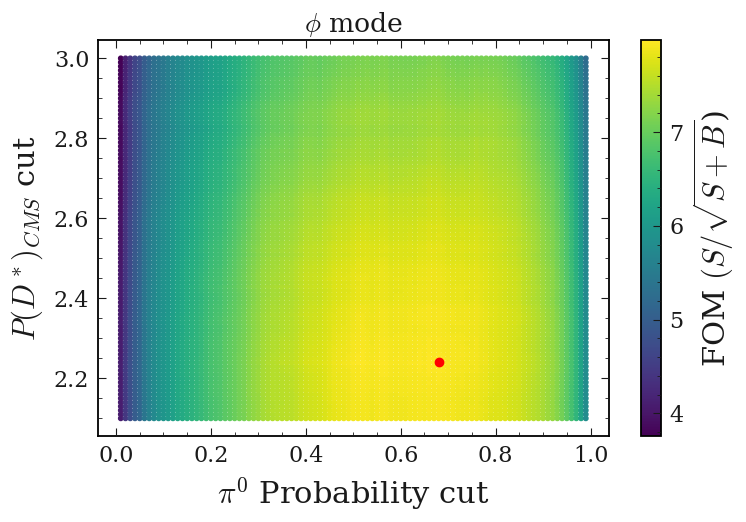

In [42]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list,y_values_list, c=FOM_phi_list, s=10)
ax.set_xlabel("$\pi^0$ Probability cut")
ax.set_ylabel("$P(D^*)_{CMS}$ cut")
plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, argmax_y, color='r')
ax.set_title('$\phi$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.show()


In [43]:
# dataset = half_1M_1_phi.query("Pi0_Prob < 0.68 and Dstarp_CMS_p>2.24")
# dx = np.diff(xe)
# cx = 0.5 * (xe[1:] + xe[:-1])
# n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))

In [44]:
mode='phi'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.076536


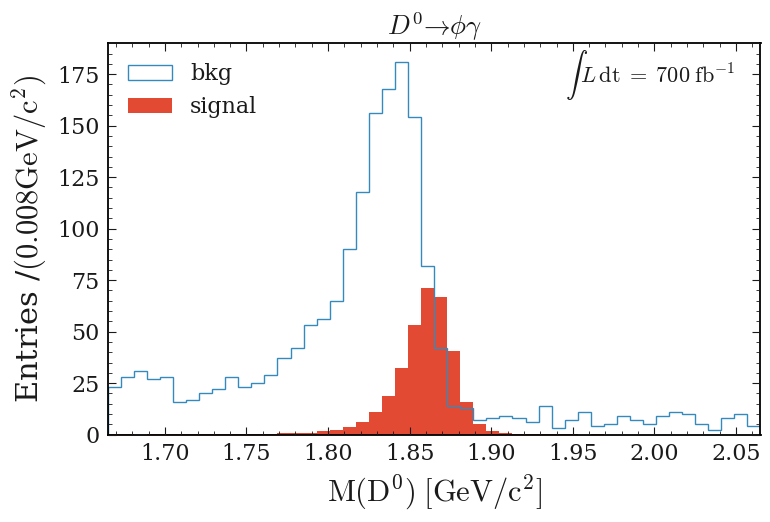

In [25]:
scale_factor = 0.01257  * 0.7

fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = D0_bkg_pd_phi.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.42")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_phi.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.42")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \phi \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

## P_dstar(pi0 veto fixed)

In [241]:
X = np.mgrid[2.1:3.001:0.01]

In [242]:
X

array([2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99, 3.  ])

In [243]:
Pi0_cut=0.8

In [244]:
FOM_phi_1D_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []
for Dstar_momentum_cut in X:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = half_1M_1_phi
    bkg_df    = D0_bkg_pd_phi
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    nSig_list.append(nSig * 0.01257  * 0.7)
    nBkg_list.append(nBkg)    
    FOM_phi_1D_list.append(FOM_phi(nSig,nBkg))
    
    print(FOM_phi(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Dstar_momentum_cut)

0.8
2.1
7.77412603620296
0.8
2.11
7.774918493986317
0.8
2.1199999999999997
7.77706424267784
0.8
2.1299999999999994
7.773212345151282
0.8
2.1399999999999992
7.771509544737586
0.8
2.149999999999999
7.77148619753664
0.8
2.159999999999999
7.776741785319069
0.8
2.1699999999999986
7.7811844413107
0.8
2.1799999999999984
7.790716332407116
0.8
2.189999999999998
7.791763644249425
0.8
2.199999999999998
7.789079944984508
0.8
2.2099999999999977
7.791400911096921
0.8
2.2199999999999975
7.799962960558093
0.8
2.2299999999999973
7.7962090657818495
0.8
2.239999999999997
7.807493788667499
0.8
2.249999999999997
7.8014775011797655
0.8
2.2599999999999967
7.807328371329285
0.8
2.2699999999999965
7.799145585927502
0.8
2.2799999999999963
7.794963343849519
0.8
2.289999999999996
7.793284434726402
0.8
2.299999999999996
7.795068435774532
0.8
2.3099999999999956
7.792953265449737
0.8
2.3199999999999954
7.790107544694154
0.8
2.329999999999995
7.784213404626306
0.8
2.339999999999995
7.7962024246266415
0.8
2.3499999999

In [245]:
max(FOM_phi_1D_list)
FOM_phi_1D_list_np = np.asarray(FOM_phi_1D_list)

print(f'FOM max = {FOM_phi_1D_list_np.max()}')
print(f'argmax = {FOM_phi_1D_list_np.argmax()}')

max_index = FOM_phi_1D_list_np.argmax()

argmax_x = x_values_list[max_index]
print(f'max of P cut = {argmax_x}')
print(nSig_list[max_index])
print(nBkg_list[max_index])

FOM max = 7.807493788667499
argmax = 14
max of P cut = 2.239999999999997
327.39319199999994
1431


In [246]:
mode='phi'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_1D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

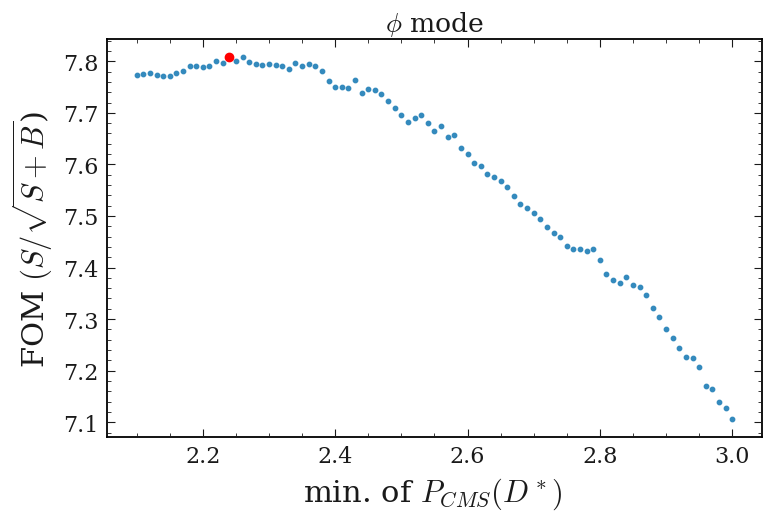

In [247]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list, FOM_phi_1D_list, s=10)
ax.set_xlabel("min. of $P_{CMS}(D^*)$ ")
ax.set_ylabel("FOM $(S/\sqrt{S+B}$)")
# plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, FOM_phi_1D_list[max_index], color='r')
ax.set_title('$\phi$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.show()


In [248]:
# dataset = half_1M_1_phi.query("Pi0_Prob < 0.68 and Dstarp_CMS_p>2.24")
# dx = np.diff(xe)
# cx = 0.5 * (xe[1:] + xe[:-1])
# n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))

In [249]:
mode='phi'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.051402


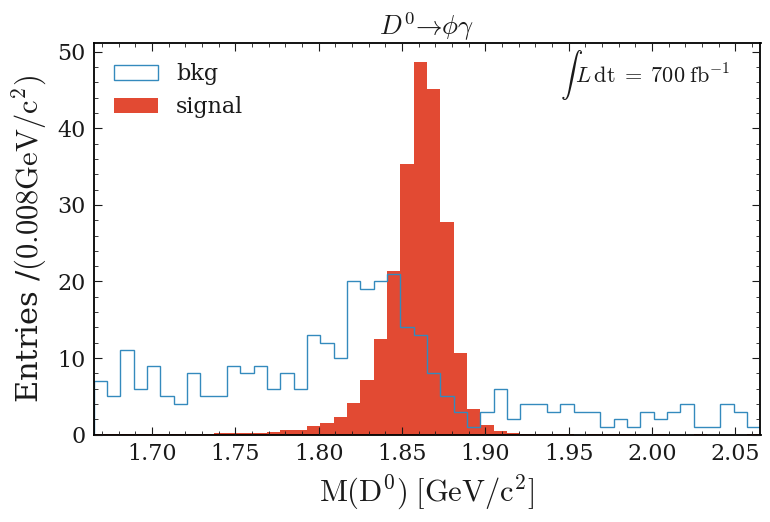

In [303]:
scale_factor = 0.01257  * 0.7

fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = D0_bkg_pd_phi.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24 and abs(D0_cosHel_0)<0.5")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_phi.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24  and abs(D0_cosHel_0)<0.5")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \phi \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

0.074416


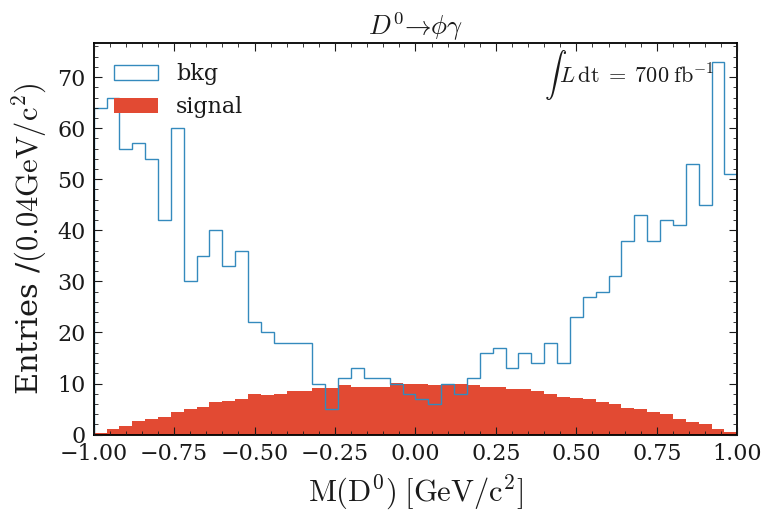

In [254]:
scale_factor = 0.01257  * 0.7

fig = plt.figure()
ax = fig.subplots()

xrange = (-1,1,51)
xm = np.linspace(*xrange)


df = D0_bkg_pd_phi.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24")
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_phi.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_cosHel_0"], bins=50, range=(-1,1))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(-1,1)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \phi \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

# antiKstar

In [57]:
len(half_1M_1_antiKstar) * 0.18852 * 0.7

7774.395131999999

In [58]:
signal_df = half_1M_1_antiKstar
bkg_df    = D0_bkg_pd_antiKstar

In [59]:
nSig = len(signal_df)
nBkg = len(bkg_df)

In [60]:
def FOM_antiKstar(nS, nB):
    nS_scaled = nS * 0.18852 * 0.7
    return nS_scaled/math.sqrt(nS_scaled+nB)

In [61]:
FOM_antiKstar(nSig,nBkg)

20.864383720127332

## 2d(P_Dstar, pi0_veto)

In [51]:
X,Y = np.mgrid[0.01:0.991:0.01, 2.08:3.001:0.01]

In [52]:
xy = np.vstack((X.flatten(), Y.flatten())).T

In [53]:
xy

array([[0.01, 2.08],
       [0.01, 2.09],
       [0.01, 2.1 ],
       ...,
       [0.99, 2.98],
       [0.99, 2.99],
       [0.99, 3.  ]])

In [54]:
FOM_antiKstar_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []

for (Pi0_cut,Dstar_momentum_cut) in xy:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = half_1M_1_antiKstar
    bkg_df    = D0_bkg_pd_antiKstar
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    
    nSig_list.append(nSig* 0.18852 * 0.7)
    nBkg_list.append(nBkg)
    
    FOM_antiKstar_list.append(FOM_antiKstar(nSig,nBkg))
    
    print(FOM_antiKstar(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Pi0_cut)
    y_values_list.append(Dstar_momentum_cut)

0.01
2.08
16.986353913121846
0.01
2.09
16.986353913121846
0.01
2.1
16.984662434047586
0.01
2.11
16.983098890610506
0.01
2.12
16.983227151630114
0.01
2.13
16.985435578843898
0.01
2.14
16.978923605257513
0.01
2.15
16.976056500513685
0.01
2.16
16.973982846226953
0.01
2.17
16.967863905954207
0.01
2.18
16.960450133053715
0.01
2.19
16.962964558467743
0.01
2.2
16.97015617444015
0.01
2.21
16.966332988783794
0.01
2.22
16.95784474032346
0.01
2.23
16.96067825738966
0.01
2.24
16.967971008966188
0.01
2.25
16.97084124410944
0.01
2.2600000000000002
16.981897595251656
0.01
2.27
16.985824518905318
0.01
2.2800000000000002
16.9920621021238
0.01
2.29
16.994213692647563
0.01
2.3000000000000003
16.98505748415932
0.01
2.31
16.997098789408184
0.01
2.3200000000000003
16.982661404151493
0.01
2.33
16.981912624701504
0.01
2.34
16.981821871508494
0.01
2.35
16.983143669141754
0.01
2.3600000000000003
16.972810790982532
0.01
2.37
16.952631009389957
0.01
2.38
16.937894219444733
0.01
2.39
16.920551289301727
0.01
2.4
16

17.863600628546095
0.03
2.98
17.837322318479966
0.03
2.99
17.79178737411554
0.03
3.0
17.761637260810318
0.04
2.08
20.250709419520813
0.04
2.09
20.250709419520813
0.04
2.1
20.24934546559138
0.04
2.11
20.249403316000365
0.04
2.12
20.249520545473725
0.04
2.13
20.252460881239642
0.04
2.14
20.242995099921934
0.04
2.15
20.234952135153506
0.04
2.16
20.235488718249872
0.04
2.17
20.230246867870257
0.04
2.18
20.21976557028151
0.04
2.19
20.22581622036237
0.04
2.2
20.239178961458705
0.04
2.21
20.227349643729877
0.04
2.22
20.212980988632175
0.04
2.23
20.2143407712617
0.04
2.24
20.226831551676685
0.04
2.25
20.231228214442808
0.04
2.2600000000000002
20.232505458040436
0.04
2.27
20.241180224290275
0.04
2.2800000000000002
20.252917407192587
0.04
2.29
20.251468840956072
0.04
2.3000000000000003
20.236321730468905
0.04
2.31
20.23541565393742
0.04
2.3200000000000003
20.21830095013018
0.04
2.33
20.203297142483432
0.04
2.34
20.204375715798292
0.04
2.35
20.199681522814647
0.04
2.3600000000000003
20.1871894470

20.27575433353175
0.060000000000000005
2.87
20.228611741489402
0.060000000000000005
2.88
20.213407331990545
0.060000000000000005
2.89
20.169390134052424
0.060000000000000005
2.9000000000000004
20.108950000064024
0.060000000000000005
2.91
20.055774793634527
0.060000000000000005
2.92
20.015430040737023
0.060000000000000005
2.93
19.96785534921752
0.060000000000000005
2.94
19.923856241727478
0.060000000000000005
2.95
19.869746090381042
0.060000000000000005
2.96
19.824953367064666
0.060000000000000005
2.97
19.78161383403237
0.060000000000000005
2.98
19.753972432042403
0.060000000000000005
2.99
19.70318028629976
0.060000000000000005
3.0
19.664747981650386
0.06999999999999999
2.08
22.479099495014776
0.06999999999999999
2.09
22.479099495014776
0.06999999999999999
2.1
22.477892912868793
0.06999999999999999
2.11
22.477886131077796
0.06999999999999999
2.12
22.47666657425309
0.06999999999999999
2.13
22.477852349530146
0.06999999999999999
2.14
22.468183878052837
0.06999999999999999
2.15
22.45970971

23.58130482362447
0.09
2.33
23.564487009501097
0.09
2.34
23.547796450792028
0.09
2.35
23.538230020963237
0.09
2.3600000000000003
23.5131363805647
0.09
2.37
23.496473276964096
0.09
2.38
23.4666539690962
0.09
2.39
23.44138290302967
0.09
2.4
23.422389745929298
0.09
2.41
23.416660080526874
0.09
2.42
23.386915650589106
0.09
2.43
23.354689891455177
0.09
2.44
23.32030997764843
0.09
2.45
23.285580866668745
0.09
2.46
23.271434467014643
0.09
2.47
23.255157738449686
0.09
2.48
23.223940359724907
0.09
2.49
23.208072121341893
0.09
2.5
23.19638039222396
0.09
2.5100000000000002
23.177788221272216
0.09
2.52
23.139151581333163
0.09
2.5300000000000002
23.115942983712298
0.09
2.54
23.069836442052882
0.09
2.5500000000000003
23.01530883395999
0.09
2.56
22.978911874760808
0.09
2.5700000000000003
22.95034755219005
0.09
2.58
22.9077109968301
0.09
2.59
22.872992999259527
0.09
2.6
22.85431372786599
0.09
2.6100000000000003
22.8197794659141
0.09
2.62
22.787377635268967
0.09
2.63
22.76152781681015
0.09
2.64
22.7282

23.37812673184888
0.11
2.67
23.337083709720115
0.11
2.68
23.310386069711072
0.11
2.69
23.249213020461312
0.11
2.7
23.205442107210644
0.11
2.71
23.153928713410128
0.11
2.72
23.137486480921805
0.11
2.73
23.085291033172314
0.11
2.74
23.039983686337017
0.11
2.75
22.98100369427876
0.11
2.7600000000000002
22.92567840192781
0.11
2.77
22.888895320621245
0.11
2.7800000000000002
22.83336745645998
0.11
2.79
22.783971252287056
0.11
2.8
22.755106388031972
0.11
2.81
22.724373633726756
0.11
2.8200000000000003
22.6808472286744
0.11
2.83
22.651554637867356
0.11
2.84
22.6276551241515
0.11
2.85
22.573986271750986
0.11
2.8600000000000003
22.506675943943264
0.11
2.87
22.460853654656628
0.11
2.88
22.440993626605135
0.11
2.89
22.402641763187965
0.11
2.9000000000000004
22.339444267243454
0.11
2.91
22.26982111941439
0.11
2.92
22.20800196336599
0.11
2.93
22.151642457068814
0.11
2.94
22.08662152204098
0.11
2.95
22.030526445764952
0.11
2.96
21.98834591497661
0.11
2.97
21.950693885367986
0.11
2.98
21.9117812778799

24.16058764568771
0.14
2.68
24.132792249698504
0.14
2.69
24.067256142200943
0.14
2.7
24.01999813766203
0.14
2.71
23.96565295040177
0.14
2.72
23.95178254552149
0.14
2.73
23.892909029063677
0.14
2.74
23.847722136281714
0.14
2.75
23.78034959027005
0.14
2.7600000000000002
23.724522988388095
0.14
2.77
23.69189827333467
0.14
2.7800000000000002
23.634687815008157
0.14
2.79
23.57380703634468
0.14
2.8
23.540040241386087
0.14
2.81
23.501390351814965
0.14
2.8200000000000003
23.451341095539668
0.14
2.83
23.416207655797997
0.14
2.84
23.384905351186443
0.14
2.85
23.321043646827903
0.14
2.8600000000000003
23.25252827895272
0.14
2.87
23.203257951315752
0.14
2.88
23.180263006113314
0.14
2.89
23.136625171586324
0.14
2.9000000000000004
23.067228873186387
0.14
2.91
23.00141921847044
0.14
2.92
22.945494909418535
0.14
2.93
22.88762517120094
0.14
2.94
22.822654001342006
0.14
2.95
22.75713744434224
0.14
2.96
22.714462223797163
0.14
2.97
22.670263872489723
0.14
2.98
22.617990637252746
0.14
2.99
22.564923154299

26.115157349403383
0.17
2.09
26.115157349403383
0.17
2.1
26.11418573043983
0.17
2.11
26.11668888661797
0.17
2.12
26.113362190845734
0.17
2.13
26.11254190189199
0.17
2.14
26.10313467335867
0.17
2.15
26.09047718148033
0.17
2.16
26.09079524319795
0.17
2.17
26.0861016156625
0.17
2.18
26.0779358749427
0.17
2.19
26.07705427550664
0.17
2.2
26.078085426351777
0.17
2.21
26.067296393669803
0.17
2.22
26.045664892648574
0.17
2.23
26.054315896883292
0.17
2.24
26.05967314340919
0.17
2.25
26.0509304276858
0.17
2.2600000000000002
26.036733672152657
0.17
2.27
26.03622034250873
0.17
2.2800000000000002
26.03732553957726
0.17
2.29
26.029462560758045
0.17
2.3000000000000003
26.005359141887926
0.17
2.31
25.987679650335526
0.17
2.3200000000000003
25.974483507822303
0.17
2.33
25.963191401331102
0.17
2.34
25.93452866794687
0.17
2.35
25.912301685576598
0.17
2.3600000000000003
25.884964947775767
0.17
2.37
25.86551411249852
0.17
2.38
25.829051816156905
0.17
2.39
25.798780362176117
0.17
2.4
25.768893191939814
0.17

25.482513534544882
0.19
2.59
25.439805637264772
0.19
2.6
25.405519381598282
0.19
2.6100000000000003
25.371917297010427
0.19
2.62
25.332109720538373
0.19
2.63
25.292286592529177
0.19
2.64
25.249435451989424
0.19
2.6500000000000004
25.193062512170428
0.19
2.66
25.165435578492215
0.19
2.67
25.114916944380717
0.19
2.68
25.09293793559128
0.19
2.69
25.02598890127327
0.19
2.7
24.987992513384192
0.19
2.71
24.933317368119397
0.19
2.72
24.91748744245034
0.19
2.73
24.8516641893853
0.19
2.74
24.807217532533475
0.19
2.75
24.73157649723658
0.19
2.7600000000000002
24.67081401167412
0.19
2.77
24.634878390088144
0.19
2.7800000000000002
24.57284823041778
0.19
2.79
24.4997400756426
0.19
2.8
24.46244846839716
0.19
2.81
24.416558351966337
0.19
2.8200000000000003
24.365927581002325
0.19
2.83
24.32989250903436
0.19
2.84
24.300432781920748
0.19
2.85
24.227611177491802
0.19
2.8600000000000003
24.152240938491584
0.19
2.87
24.096895322888308
0.19
2.88
24.06743495229461
0.19
2.89
24.025607432087188
0.19
2.9000000

26.877795076155955
0.22
2.18
26.869650035380918
0.22
2.19
26.86726413501003
0.22
2.2
26.86720357672011
0.22
2.21
26.85177079855385
0.22
2.22
26.831618921577935
0.22
2.23
26.839720575512697
0.22
2.24
26.842200803719752
0.22
2.25
26.826189628278716
0.22
2.2600000000000002
26.8141635035793
0.22
2.27
26.807919407570168
0.22
2.2800000000000002
26.81093606917172
0.22
2.29
26.796030277220876
0.22
2.3000000000000003
26.770111368498657
0.22
2.31
26.750219196353118
0.22
2.3200000000000003
26.73740351938847
0.22
2.33
26.728759219209277
0.22
2.34
26.705606559168753
0.22
2.35
26.68194288174416
0.22
2.3600000000000003
26.652422228125772
0.22
2.37
26.62934477492873
0.22
2.38
26.58455895155091
0.22
2.39
26.55401706447082
0.22
2.4
26.519811768352273
0.22
2.41
26.493371174871907
0.22
2.42
26.467423434011724
0.22
2.43
26.428890914258837
0.22
2.44
26.397692444146635
0.22
2.45
26.366251511388977
0.22
2.46
26.345886061328862
0.22
2.47
26.314541177624108
0.22
2.48
26.280659902131067
0.22
2.49
26.251076419851

25.81742568230569
0.24000000000000002
2.68
25.791412204962235
0.24000000000000002
2.69
25.72521194605136
0.24000000000000002
2.7
25.679747957178442
0.24000000000000002
2.71
25.619031285315973
0.24000000000000002
2.72
25.598142097549008
0.24000000000000002
2.73
25.524248917083394
0.24000000000000002
2.74
25.4714253109354
0.24000000000000002
2.75
25.396586936439853
0.24000000000000002
2.7600000000000002
25.336638871531417
0.24000000000000002
2.77
25.297157630672217
0.24000000000000002
2.7800000000000002
25.23517313521796
0.24000000000000002
2.79
25.15047575107681
0.24000000000000002
2.8
25.113495034834692
0.24000000000000002
2.81
25.0647669776873
0.24000000000000002
2.8200000000000003
25.00774382773522
0.24000000000000002
2.83
24.969226376251342
0.24000000000000002
2.84
24.933464349705353
0.24000000000000002
2.85
24.85907389979208
0.24000000000000002
2.8600000000000003
24.779735956061415
0.24000000000000002
2.87
24.719270566758667
0.24000000000000002
2.88
24.690998620376813
0.24000000000

26.980450359441797
0.27
2.52
26.946711830264466
0.27
2.5300000000000002
26.897602884434193
0.27
2.54
26.844773482112593
0.27
2.5500000000000003
26.7941076955143
0.27
2.56
26.75766115859533
0.27
2.5700000000000003
26.720009130044545
0.27
2.58
26.67281447590865
0.27
2.59
26.62786232723566
0.27
2.6
26.601071710014644
0.27
2.6100000000000003
26.570129390106008
0.27
2.62
26.52095305183219
0.27
2.63
26.477800056862293
0.27
2.64
26.425525907155905
0.27
2.6500000000000004
26.373598999407328
0.27
2.66
26.345732973916277
0.27
2.67
26.288891507732913
0.27
2.68
26.264142884541673
0.27
2.69
26.191273711282555
0.27
2.7
26.14669635493033
0.27
2.71
26.086635628522654
0.27
2.72
26.061919995152515
0.27
2.73
25.991792392049305
0.27
2.74
25.94216979266951
0.27
2.75
25.864492209000765
0.27
2.7600000000000002
25.801000554871848
0.27
2.77
25.754529514773562
0.27
2.7800000000000002
25.688200968387402
0.27
2.79
25.598981648431355
0.27
2.8
25.554680710530636
0.27
2.81
25.504192886531257
0.27
2.8200000000000003


24.824762688606487
0.29000000000000004
3.0
24.756890037620096
0.3
2.08
28.387743980808747
0.3
2.09
28.387743980808747
0.3
2.1
28.38690879438076
0.3
2.11
28.388613122856384
0.3
2.12
28.38407028753437
0.3
2.13
28.37982938108245
0.3
2.14
28.372414897364585
0.3
2.15
28.35663385735624
0.3
2.16
28.35047828446095
0.3
2.17
28.341784654436886
0.3
2.18
28.331207388827632
0.3
2.19
28.326057035796957
0.3
2.2
28.32560760515201
0.3
2.21
28.307541099542565
0.3
2.22
28.28033115211014
0.3
2.23
28.282728973961518
0.3
2.24
28.2840850876946
0.3
2.25
28.26854364332084
0.3
2.2600000000000002
28.2506448892072
0.3
2.27
28.24926744875649
0.3
2.2800000000000002
28.248055792954627
0.3
2.29
28.230915584733623
0.3
2.3000000000000003
28.20430459010815
0.3
2.31
28.179921005452915
0.3
2.3200000000000003
28.160648584070003
0.3
2.33
28.148042635366455
0.3
2.34
28.122422100101442
0.3
2.35
28.100804294278234
0.3
2.3600000000000003
28.069285539943014
0.3
2.37
28.04856560692608
0.3
2.38
27.994263391333106
0.3
2.39
27.95669

25.687898173567266
0.32
2.91
25.61755575354648
0.32
2.92
25.564225466469566
0.32
2.93
25.48707088644178
0.32
2.94
25.394921956192174
0.32
2.95
25.329595408421937
0.32
2.96
25.26125075577522
0.32
2.97
25.1997634388923
0.32
2.98
25.13330309796324
0.32
2.99
25.06104394398196
0.32
3.0
24.994976257276065
0.33
2.08
28.738094985200004
0.33
2.09
28.738094985200004
0.33
2.1
28.737283560759764
0.33
2.11
28.737232544725156
0.33
2.12
28.732549157906597
0.33
2.13
28.727434590305695
0.33
2.14
28.71969098929998
0.33
2.15
28.705300972643037
0.33
2.16
28.70034275362038
0.33
2.17
28.691135854248074
0.33
2.18
28.67941790466804
0.33
2.19
28.674218260905267
0.33
2.2
28.67579126400474
0.33
2.21
28.65622628457668
0.33
2.22
28.626826127109652
0.33
2.23
28.628327577778553
0.33
2.24
28.628494549121022
0.33
2.25
28.6157480219466
0.33
2.2600000000000002
28.599368950323797
0.33
2.27
28.595945551867093
0.33
2.2800000000000002
28.59661258541106
0.33
2.29
28.58038158262523
0.33
2.3000000000000003
28.549772062896047
0

27.83985847009003
0.35000000000000003
2.59
27.78276355315681
0.35000000000000003
2.6
27.75414429562546
0.35000000000000003
2.6100000000000003
27.723732743550606
0.35000000000000003
2.62
27.669097484062004
0.35000000000000003
2.63
27.613804849988213
0.35000000000000003
2.64
27.56154292910814
0.35000000000000003
2.6500000000000004
27.500454383583605
0.35000000000000003
2.66
27.457577836006347
0.35000000000000003
2.67
27.402433088306903
0.35000000000000003
2.68
27.36469824455091
0.35000000000000003
2.69
27.286240506775663
0.35000000000000003
2.7
27.22880113293449
0.35000000000000003
2.71
27.17043688546805
0.35000000000000003
2.72
27.137818823332605
0.35000000000000003
2.73
27.07304295183191
0.35000000000000003
2.74
27.025870272368753
0.35000000000000003
2.75
26.94724505898992
0.35000000000000003
2.7600000000000002
26.881701719551714
0.35000000000000003
2.77
26.8223956630684
0.35000000000000003
2.7800000000000002
26.752704075966168
0.35000000000000003
2.79
26.672744396705077
0.350000000000

27.02804900023311
0.37
2.77
26.97045077158494
0.37
2.7800000000000002
26.902273634423004
0.37
2.79
26.823300683205552
0.37
2.8
26.77877150090619
0.37
2.81
26.723964097442455
0.37
2.8200000000000003
26.652653114705508
0.37
2.83
26.60812263932463
0.37
2.84
26.553479817381852
0.37
2.85
26.479832042973495
0.37
2.8600000000000003
26.39493691892229
0.37
2.87
26.315733445603996
0.37
2.88
26.275356065034995
0.37
2.89
26.234929714132694
0.37
2.9000000000000004
26.161105097811536
0.37
2.91
26.093345211323552
0.37
2.92
26.04142246094553
0.37
2.93
25.964357860795097
0.37
2.94
25.87658371937305
0.37
2.95
25.808247666181
0.37
2.96
25.741248303096842
0.37
2.97
25.6764919624791
0.37
2.98
25.604438097734917
0.37
2.99
25.5310635094853
0.37
3.0
25.469798967308613
0.38
2.08
29.302980612637484
0.38
2.09
29.302980612637484
0.38
2.1
29.30220552891197
0.38
2.11
29.302651231318794
0.38
2.12
29.298590386918157
0.38
2.13
29.293123306056057
0.38
2.14
29.28500136974427
0.38
2.15
29.276082056877666
0.38
2.16
29.267

26.9355694089312
0.4
2.83
26.889669729660614
0.4
2.84
26.832922811188638
0.4
2.85
26.75846377895209
0.4
2.8600000000000003
26.673359323390812
0.4
2.87
26.591572588141396
0.4
2.88
26.54279310790218
0.4
2.89
26.499325841925423
0.4
2.9000000000000004
26.419256805744503
0.4
2.91
26.34803552374291
0.4
2.92
26.28531334605627
0.4
2.93
26.201705119669672
0.4
2.94
26.10842287298162
0.4
2.95
26.03687359134871
0.4
2.96
25.968747768333127
0.4
2.97
25.90172274483091
0.4
2.98
25.832704338714283
0.4
2.99
25.751303486395244
0.4
3.0
25.691380986981866
0.41000000000000003
2.08
29.641236592402795
0.41000000000000003
2.09
29.641236592402795
0.41000000000000003
2.1
29.640480458078866
0.41000000000000003
2.11
29.6400905739176
0.41000000000000003
2.12
29.637799679640494
0.41000000000000003
2.13
29.632156487682103
0.41000000000000003
2.14
29.622934403869056
0.41000000000000003
2.15
29.614945631622167
0.41000000000000003
2.16
29.606036246455957
0.41000000000000003
2.17
29.595245683923523
0.41000000000000003
2.

26.668926258580093
0.42000000000000004
2.89
26.626070711236608
0.42000000000000004
2.9000000000000004
26.548462209990156
0.42000000000000004
2.91
26.47782943488077
0.42000000000000004
2.92
26.412999572526207
0.42000000000000004
2.93
26.330921454857958
0.42000000000000004
2.94
26.24129636783516
0.42000000000000004
2.95
26.172778454624247
0.42000000000000004
2.96
26.101875923192697
0.42000000000000004
2.97
26.034709703798764
0.42000000000000004
2.98
25.965209372321304
0.42000000000000004
2.99
25.885458772308453
0.42000000000000004
3.0
25.82504064034689
0.43
2.08
29.814343696049086
0.43
2.09
29.814343696049086
0.43
2.1
29.813598197596587
0.43
2.11
29.813750334478588
0.43
2.12
29.811987030077375
0.43
2.13
29.806328251657213
0.43
2.14
29.798831570206765
0.43
2.15
29.790582030420314
0.43
2.16
29.780754501300922
0.43
2.17
29.76877855723893
0.43
2.18
29.75315226666512
0.43
2.19
29.74463193423139
0.43
2.2
29.7439870632573
0.43
2.21
29.73144713240189
0.43
2.22
29.697636017290648
0.43
2.23
29.688

26.827356001348242
0.45
2.89
26.777736051006077
0.45
2.9000000000000004
26.70139608010525
0.45
2.91
26.62908339148087
0.45
2.92
26.564037842325526
0.45
2.93
26.477495345229418
0.45
2.94
26.38563560185456
0.45
2.95
26.317279210649396
0.45
2.96
26.24888019496679
0.45
2.97
26.18154959478712
0.45
2.98
26.10824026837686
0.45
2.99
26.027796945676837
0.45
3.0
25.969533715716167
0.46
2.08
29.989183615256408
0.46
2.09
29.989183615256408
0.46
2.1
29.988455136778317
0.46
2.11
29.98778066459084
0.46
2.12
29.985151125159817
0.46
2.13
29.977069173798576
0.46
2.14
29.967787324832504
0.46
2.15
29.96078465563304
0.46
2.16
29.95225132346322
0.46
2.17
29.938930091850402
0.46
2.18
29.922824883004154
0.46
2.19
29.912635625390646
0.46
2.2
29.911284521660534
0.46
2.21
29.898137686130035
0.46
2.22
29.866122143261958
0.46
2.23
29.858937796053517
0.46
2.24
29.858172622732738
0.46
2.25
29.843947322708672
0.46
2.2600000000000002
29.82310276091571
0.46
2.27
29.81216808606714
0.46
2.2800000000000002
29.806676195966

29.867648179234333
0.48000000000000004
2.31
29.8466393013921
0.48000000000000004
2.3200000000000003
29.815810825673108
0.48000000000000004
2.33
29.7963151384327
0.48000000000000004
2.34
29.767305149609772
0.48000000000000004
2.35
29.746026414490277
0.48000000000000004
2.3600000000000003
29.70831150251278
0.48000000000000004
2.37
29.683499391522506
0.48000000000000004
2.38
29.628986901501456
0.48000000000000004
2.39
29.586598930323785
0.48000000000000004
2.4
29.545776031037068
0.48000000000000004
2.41
29.525939956243928
0.48000000000000004
2.42
29.483898035033928
0.48000000000000004
2.43
29.441471816436028
0.48000000000000004
2.44
29.392507159083294
0.48000000000000004
2.45
29.34100668692468
0.48000000000000004
2.46
29.30033496277352
0.48000000000000004
2.47
29.26063821847669
0.48000000000000004
2.48
29.227476099917126
0.48000000000000004
2.49
29.185345051807243
0.48000000000000004
2.5
29.168427269377304
0.48000000000000004
2.5100000000000002
29.1354464907463
0.48000000000000004
2.52
29

26.22661621546518
0.5
2.99
26.145127513135925
0.5
3.0
26.08095553550532
0.51
2.08
30.17034353216505
0.51
2.09
30.17034353216505
0.51
2.1
30.169642498660092
0.51
2.11
30.168127604171953
0.51
2.12
30.16682406754822
0.51
2.13
30.16055683715584
0.51
2.14
30.151696490149444
0.51
2.15
30.14600062056279
0.51
2.16
30.137487726772815
0.51
2.17
30.12435404327149
0.51
2.18
30.10853997150462
0.51
2.19
30.100928922610674
0.51
2.2
30.10043370095627
0.51
2.21
30.08776367025688
0.51
2.22
30.0550534794087
0.51
2.23
30.048097832905707
0.51
2.24
30.048757510756822
0.51
2.25
30.036440257294654
0.51
2.2600000000000002
30.014109600854848
0.51
2.27
30.001519786033864
0.51
2.2800000000000002
29.995686772698377
0.51
2.29
29.97003216282264
0.51
2.3000000000000003
29.94081064440626
0.51
2.31
29.920502186979483
0.51
2.3200000000000003
29.888428185779855
0.51
2.33
29.868288017158978
0.51
2.34
29.83978536566756
0.51
2.35
29.819257839240574
0.51
2.3600000000000003
29.784210907900803
0.51
2.37
29.75974467800684
0.51


26.935734819034028
0.53
2.91
26.86113623087241
0.53
2.92
26.790458435851207
0.53
2.93
26.705668150906376
0.53
2.94
26.607488114814952
0.53
2.95
26.540491056215746
0.53
2.96
26.465385486445495
0.53
2.97
26.393669615127113
0.53
2.98
26.320844257973462
0.53
2.99
26.241372968541413
0.53
3.0
26.17563778281725
0.54
2.08
30.299977376438132
0.54
2.09
30.299977376438132
0.54
2.1
30.29978238081998
0.54
2.11
30.298027558751645
0.54
2.12
30.29658146223186
0.54
2.13
30.291710550412898
0.54
2.14
30.282336015877075
0.54
2.15
30.278802989188673
0.54
2.16
30.268130853877462
0.54
2.17
30.25458271189983
0.54
2.18
30.238041891276158
0.54
2.19
30.23056423904998
0.54
2.2
30.229056601857653
0.54
2.21
30.217601376922456
0.54
2.22
30.186757953101367
0.54
2.23
30.179630770955633
0.54
2.24
30.178838542595656
0.54
2.25
30.16799456129786
0.54
2.2600000000000002
30.14486734457862
0.54
2.27
30.132649502747448
0.54
2.2800000000000002
30.128633650356928
0.54
2.29
30.10368470496088
0.54
2.3000000000000003
30.0733423512

27.582968498954195
0.56
2.83
27.53612711393168
0.56
2.84
27.469088442788593
0.56
2.85
27.389507649324045
0.56
2.8600000000000003
27.30141879830074
0.56
2.87
27.217000198925167
0.56
2.88
27.15860807413874
0.56
2.89
27.114467710927553
0.56
2.9000000000000004
27.03933488419261
0.56
2.91
26.960009395050708
0.56
2.92
26.891547784460137
0.56
2.93
26.803820577163417
0.56
2.94
26.710375975530976
0.56
2.95
26.64276068760177
0.56
2.96
26.56937496699176
0.56
2.97
26.499114496345452
0.56
2.98
26.42245515339379
0.56
2.99
26.343753768875324
0.56
3.0
26.271969928545158
0.5700000000000001
2.08
30.374887625054743
0.5700000000000001
2.09
30.374887625054743
0.5700000000000001
2.1
30.374686327216683
0.5700000000000001
2.11
30.372201095906917
0.5700000000000001
2.12
30.370398660051322
0.5700000000000001
2.13
30.36536916382069
0.5700000000000001
2.14
30.356579086568825
0.5700000000000001
2.15
30.350578444027864
0.5700000000000001
2.16
30.339278145462774
0.5700000000000001
2.17
30.324383907402854
0.570000000

27.44455320179632
0.5800000000000001
2.8600000000000003
27.35454004701623
0.5800000000000001
2.87
27.265864187381517
0.5800000000000001
2.88
27.20701004258396
0.5800000000000001
2.89
27.164565118912417
0.5800000000000001
2.9000000000000004
27.088678970309562
0.5800000000000001
2.91
27.00969017095004
0.5800000000000001
2.92
26.939380368518705
0.5800000000000001
2.93
26.846989171524378
0.5800000000000001
2.94
26.756357302673397
0.5800000000000001
2.95
26.690275713793362
0.5800000000000001
2.96
26.615103015656555
0.5800000000000001
2.97
26.542413058788146
0.5800000000000001
2.98
26.467093434105532
0.5800000000000001
2.99
26.38799488291488
0.5800000000000001
3.0
26.31248435487553
0.59
2.08
30.395241593411207
0.59
2.09
30.395241593411207
0.59
2.1
30.39503622664317
0.59
2.11
30.3934426530366
0.59
2.12
30.392458824366468
0.59
2.13
30.38666257830533
0.59
2.14
30.3779948281466
0.59
2.15
30.372921421840932
0.59
2.16
30.361607064035493
0.59
2.17
30.348396944352412
0.59
2.18
30.333571031474595
0.5

27.94925966548713
0.61
2.7800000000000002
27.87976803677419
0.61
2.79
27.81246831692953
0.61
2.8
27.745468444049482
0.61
2.81
27.68870265215289
0.61
2.8200000000000003
27.623723969786333
0.61
2.83
27.575027587509226
0.61
2.84
27.50597566418124
0.61
2.85
27.42740604874636
0.61
2.8600000000000003
27.336245062201538
0.61
2.87
27.24516642157685
0.61
2.88
27.188128554095577
0.61
2.89
27.147008060064053
0.61
2.9000000000000004
27.069455953110303
0.61
2.91
26.989248456499862
0.61
2.92
26.916427559013567
0.61
2.93
26.825619958040246
0.61
2.94
26.739999488171843
0.61
2.95
26.67517936949738
0.61
2.96
26.595766266721487
0.61
2.97
26.522870625036276
0.61
2.98
26.448293730954113
0.61
2.99
26.368954737567137
0.61
3.0
26.292318188701927
0.62
2.08
30.4500097270297
0.62
2.09
30.4500097270297
0.62
2.1
30.44979970110787
0.62
2.11
30.448143709429306
0.62
2.12
30.447450563469
0.62
2.13
30.442438230838036
0.62
2.14
30.43428042357983
0.62
2.15
30.42798937656284
0.62
2.16
30.416125794964515
0.62
2.17
30.40469

28.562887580279384
0.64
2.68
28.519117218422984
0.64
2.69
28.43942134237407
0.64
2.7
28.37817807382399
0.64
2.71
28.322258466132798
0.64
2.72
28.27815158667623
0.64
2.73
28.206019518992495
0.64
2.74
28.156958899706574
0.64
2.75
28.080418730138927
0.64
2.7600000000000002
28.014187294437964
0.64
2.77
27.94874396819589
0.64
2.7800000000000002
27.879013683081283
0.64
2.79
27.81296673499068
0.64
2.8
27.74477978384593
0.64
2.81
27.68604084404856
0.64
2.8200000000000003
27.620100944841283
0.64
2.83
27.570850466094736
0.64
2.84
27.504740860812245
0.64
2.85
27.429724830109265
0.64
2.8600000000000003
27.340773071529224
0.64
2.87
27.248224692461182
0.64
2.88
27.193581382314964
0.64
2.89
27.153397254841448
0.64
2.9000000000000004
27.075371161481147
0.64
2.91
26.994100409219545
0.64
2.92
26.92223619927741
0.64
2.93
26.828877118542557
0.64
2.94
26.745110111301614
0.64
2.95
26.684258058072214
0.64
2.96
26.608261019620365
0.64
2.97
26.536142579733717
0.64
2.98
26.46129324559272
0.64
2.99
26.3883377492

29.032070720666976
0.67
2.59
28.96554100260493
0.67
2.6
28.923071514780865
0.67
2.6100000000000003
28.884022178408944
0.67
2.62
28.82371941160245
0.67
2.63
28.75018175770092
0.67
2.64
28.69606454847357
0.67
2.6500000000000004
28.648713303088932
0.67
2.66
28.592257946566715
0.67
2.67
28.5341965030294
0.67
2.68
28.49085721314298
0.67
2.69
28.411171199567328
0.67
2.7
28.344994824330154
0.67
2.71
28.288972450856676
0.67
2.72
28.244755084181048
0.67
2.73
28.173483570507123
0.67
2.74
28.127200974530467
0.67
2.75
28.049023823497894
0.67
2.7600000000000002
27.97938622545978
0.67
2.77
27.915643817881175
0.67
2.7800000000000002
27.843365456643127
0.67
2.79
27.773276251371783
0.67
2.8
27.70544977862216
0.67
2.81
27.646980168684742
0.67
2.8200000000000003
27.584770186130704
0.67
2.83
27.536483082658364
0.67
2.84
27.46806766223452
0.67
2.85
27.397264877999557
0.67
2.8600000000000003
27.304100006276894
0.67
2.87
27.213012984565648
0.67
2.88
27.15952065345857
0.67
2.89
27.116268006081125
0.67
2.90000

30.300003372729023
0.7000000000000001
2.22
30.275501962253202
0.7000000000000001
2.23
30.264571050551815
0.7000000000000001
2.24
30.25730417054874
0.7000000000000001
2.25
30.241270114251062
0.7000000000000001
2.2600000000000002
30.219550712307786
0.7000000000000001
2.27
30.206203886238292
0.7000000000000001
2.2800000000000002
30.20519591371102
0.7000000000000001
2.29
30.184759677425824
0.7000000000000001
2.3000000000000003
30.153877136505997
0.7000000000000001
2.31
30.12778761706489
0.7000000000000001
2.3200000000000003
30.089833642454273
0.7000000000000001
2.33
30.063353600536647
0.7000000000000001
2.34
30.03398076107054
0.7000000000000001
2.35
30.0165320204513
0.7000000000000001
2.3600000000000003
29.985593874435903
0.7000000000000001
2.37
29.95726838955195
0.7000000000000001
2.38
29.895417617080803
0.7000000000000001
2.39
29.859693772420332
0.7000000000000001
2.4
29.812568808089914
0.7000000000000001
2.41
29.793152258758635
0.7000000000000001
2.42
29.748252882242493
0.70000000000000

29.449946808285436
0.72
2.48
29.405723077718783
0.72
2.49
29.360789171681887
0.72
2.5
29.332938566021557
0.72
2.5100000000000002
29.283322360873893
0.72
2.52
29.23656362775065
0.72
2.5300000000000002
29.170043305320927
0.72
2.54
29.119112842113445
0.72
2.5500000000000003
29.0595740871911
0.72
2.56
29.015998418720407
0.72
2.5700000000000003
28.949020496720255
0.72
2.58
28.903955285154012
0.72
2.59
28.83611715787744
0.72
2.6
28.791952045581198
0.72
2.6100000000000003
28.755136626787586
0.72
2.62
28.69714142398647
0.72
2.63
28.625686259194513
0.72
2.64
28.57201651640028
0.72
2.6500000000000004
28.52434390598643
0.72
2.66
28.469268007352042
0.72
2.67
28.40836768850154
0.72
2.68
28.367771651418344
0.72
2.69
28.287114376640663
0.72
2.7
28.2188947325044
0.72
2.71
28.163350533732103
0.72
2.72
28.111853914219168
0.72
2.73
28.03351580086973
0.72
2.74
27.989685526535432
0.72
2.75
27.91161370734384
0.72
2.7600000000000002
27.84058593451585
0.72
2.77
27.778333725329805
0.72
2.7800000000000002
27.70

29.84679680631484
0.75
2.37
29.820157803389577
0.75
2.38
29.758380855716666
0.75
2.39
29.722847728013182
0.75
2.4
29.677033573606387
0.75
2.41
29.655410100120367
0.75
2.42
29.60967896124464
0.75
2.43
29.57139426589598
0.75
2.44
29.51772452540682
0.75
2.45
29.46248910947619
0.75
2.46
29.415531480933332
0.75
2.47
29.372523857273805
0.75
2.48
29.32749612543063
0.75
2.49
29.282437249437407
0.75
2.5
29.254918188249796
0.75
2.5100000000000002
29.204411165176435
0.75
2.52
29.15411204187577
0.75
2.5300000000000002
29.08947016863068
0.75
2.54
29.04148667697593
0.75
2.5500000000000003
28.980260308533374
0.75
2.56
28.933860001771677
0.75
2.5700000000000003
28.869739067771093
0.75
2.58
28.82498474132397
0.75
2.59
28.757306962069855
0.75
2.6
28.71020950124882
0.75
2.6100000000000003
28.66993057794037
0.75
2.62
28.61238410520014
0.75
2.63
28.542071066352545
0.75
2.64
28.48940845275259
0.75
2.6500000000000004
28.436288952678062
0.75
2.66
28.38171641580904
0.75
2.67
28.320798539475202
0.75
2.68
28.281

29.73038795829524
0.78
2.3600000000000003
29.697522283217566
0.78
2.37
29.671425466403978
0.78
2.38
29.612621778155326
0.78
2.39
29.581461689738397
0.78
2.4
29.535753467193697
0.78
2.41
29.51686599626402
0.78
2.42
29.469646587798817
0.78
2.43
29.430317353135496
0.78
2.44
29.380335844131565
0.78
2.45
29.324540967198356
0.78
2.46
29.274282578154125
0.78
2.47
29.23101290035181
0.78
2.48
29.18598221462249
0.78
2.49
29.143555248100704
0.78
2.5
29.115270656196493
0.78
2.5100000000000002
29.06620081572316
0.78
2.52
29.013520773334328
0.78
2.5300000000000002
28.951794149682474
0.78
2.54
28.904716590689414
0.78
2.5500000000000003
28.84173635778452
0.78
2.56
28.796334889708202
0.78
2.5700000000000003
28.734880719836205
0.78
2.58
28.685876093023133
0.78
2.59
28.618431941447994
0.78
2.6
28.56954457690107
0.78
2.6100000000000003
28.527860562716953
0.78
2.62
28.471453342394444
0.78
2.63
28.396911205273007
0.78
2.64
28.345396964086554
0.78
2.6500000000000004
28.291119950191785
0.78
2.66
28.2334144829

29.195098154171706
0.81
2.45
29.136735340204783
0.81
2.46
29.088504491319515
0.81
2.47
29.047524364970705
0.81
2.48
29.004307673476973
0.81
2.49
28.961440286255204
0.81
2.5
28.9356457841247
0.81
2.5100000000000002
28.883170036637985
0.81
2.52
28.83323349488579
0.81
2.5300000000000002
28.77427688585897
0.81
2.54
28.723825199578464
0.81
2.5500000000000003
28.65923340614144
0.81
2.56
28.6128316394038
0.81
2.5700000000000003
28.549951431988422
0.81
2.58
28.500129216257278
0.81
2.59
28.433331841521536
0.81
2.6
28.38447909431414
0.81
2.6100000000000003
28.344483224904174
0.81
2.62
28.287407208641554
0.81
2.63
28.213560208237354
0.81
2.64
28.162554266478892
0.81
2.6500000000000004
28.105487283026996
0.81
2.66
28.04578582578711
0.81
2.67
27.983683854927403
0.81
2.68
27.944564568927582
0.81
2.69
27.867706340456568
0.81
2.7
27.798864354625803
0.81
2.71
27.73665943804915
0.81
2.72
27.68106410642379
0.81
2.73
27.602379143494623
0.81
2.74
27.561203176339117
0.81
2.75
27.48671322997758
0.81
2.760000

28.12545588025569
0.8300000000000001
2.63
28.048704481145478
0.8300000000000001
2.64
27.998541857235924
0.8300000000000001
2.6500000000000004
27.93934899304419
0.8300000000000001
2.66
27.87773009643011
0.8300000000000001
2.67
27.813084121928338
0.8300000000000001
2.68
27.76910669954427
0.8300000000000001
2.69
27.694564891145607
0.8300000000000001
2.7
27.624244452679
0.8300000000000001
2.71
27.56262640216274
0.8300000000000001
2.72
27.510916133127704
0.8300000000000001
2.73
27.433146926226428
0.8300000000000001
2.74
27.38870652054771
0.8300000000000001
2.75
27.313791429422743
0.8300000000000001
2.7600000000000002
27.248192183472604
0.8300000000000001
2.77
27.184760991584834
0.8300000000000001
2.7800000000000002
27.11018219908759
0.8300000000000001
2.79
27.04775895102463
0.8300000000000001
2.8
26.987758861691997
0.8300000000000001
2.81
26.924864544353564
0.8300000000000001
2.8200000000000003
26.86122294217745
0.8300000000000001
2.83
26.807373449864595
0.8300000000000001
2.84
26.736534359

26.441551527263023
0.85
2.8600000000000003
26.360709689026915
0.85
2.87
26.26928664517348
0.85
2.88
26.218598882431383
0.85
2.89
26.16356192922687
0.85
2.9000000000000004
26.08817813599151
0.85
2.91
26.010368426132167
0.85
2.92
25.938691363122988
0.85
2.93
25.852749029077437
0.85
2.94
25.77420919916697
0.85
2.95
25.708469862051643
0.85
2.96
25.63041479922494
0.85
2.97
25.563009370303092
0.85
2.98
25.49171240205521
0.85
2.99
25.415402689001734
0.85
3.0
25.348256712671375
0.86
2.08
29.294374893746678
0.86
2.09
29.294374893746678
0.86
2.1
29.29357516628338
0.86
2.11
29.29129301632787
0.86
2.12
29.28836816476792
0.86
2.13
29.284203640363295
0.86
2.14
29.277080668529024
0.86
2.15
29.269669483657072
0.86
2.16
29.261204694472646
0.86
2.17
29.250443738292258
0.86
2.18
29.23060664029427
0.86
2.19
29.22053887820132
0.86
2.2
29.2145407053998
0.86
2.21
29.198402056776594
0.86
2.22
29.173402544354705
0.86
2.23
29.16538205367092
0.86
2.24
29.154752991160247
0.86
2.25
29.13492517117772
0.86
2.2600000

26.7255255045462
0.88
2.74
26.679899678776913
0.88
2.75
26.60708147895265
0.88
2.7600000000000002
26.540943131530387
0.88
2.77
26.47858353730485
0.88
2.7800000000000002
26.408957543545565
0.88
2.79
26.347164254004948
0.88
2.8
26.287791889517052
0.88
2.81
26.226897854589136
0.88
2.8200000000000003
26.163192532496414
0.88
2.83
26.111702655870026
0.88
2.84
26.046115129470238
0.88
2.85
25.974352214580595
0.88
2.8600000000000003
25.895634176212774
0.88
2.87
25.8061382065338
0.88
2.88
25.755966994413917
0.88
2.89
25.701242957885267
0.88
2.9000000000000004
25.62585396842682
0.88
2.91
25.550658508270626
0.88
2.92
25.481491313211038
0.88
2.93
25.39500166659129
0.88
2.94
25.319990065212387
0.88
2.95
25.254926652830292
0.88
2.96
25.181067602781656
0.88
2.97
25.116416413676223
0.88
2.98
25.04158335059451
0.88
2.99
24.966014134180497
0.88
3.0
24.899534549858146
0.89
2.08
28.75939420733733
0.89
2.09
28.75939420733733
0.89
2.1
28.75860790067827
0.89
2.11
28.756142156403197
0.89
2.12
28.75275356774662

26.116678337647727
0.91
2.73
26.043990329863384
0.91
2.74
26.000355568349494
0.91
2.75
25.930657278184658
0.91
2.7600000000000002
25.861514158603224
0.91
2.77
25.803816780257684
0.91
2.7800000000000002
25.733093940203094
0.91
2.79
25.67008298633919
0.91
2.8
25.609165841840923
0.91
2.81
25.549220642073028
0.91
2.8200000000000003
25.483877670792765
0.91
2.83
25.431578149262577
0.91
2.84
25.365048745917154
0.91
2.85
25.2910233862194
0.91
2.8600000000000003
25.21385341464325
0.91
2.87
25.12661992297379
0.91
2.88
25.073181053468446
0.91
2.89
25.016007071825832
0.91
2.9000000000000004
24.94424461634243
0.91
2.91
24.87223133965484
0.91
2.92
24.802263465201307
0.91
2.93
24.716045010469276
0.91
2.94
24.644534299104098
0.91
2.95
24.581671753146008
0.91
2.96
24.514138557717075
0.91
2.97
24.45645794958595
0.91
2.98
24.38099034272807
0.91
2.99
24.311929307189466
0.91
3.0
24.246987969436663
0.92
2.08
27.986567130924676
0.92
2.09
27.98678620938455
0.92
2.1
27.98552555691427
0.92
2.11
27.9837140633349

26.11088941807243
0.9400000000000001
2.52
26.068766817190074
0.9400000000000001
2.5300000000000002
26.017862942100052
0.9400000000000001
2.54
25.966899550461033
0.9400000000000001
2.5500000000000003
25.913757642616908
0.9400000000000001
2.56
25.876342774552295
0.9400000000000001
2.5700000000000003
25.82716934646084
0.9400000000000001
2.58
25.781309857682448
0.9400000000000001
2.59
25.724045154172092
0.9400000000000001
2.6
25.674381988332286
0.9400000000000001
2.6100000000000003
25.630854756048883
0.9400000000000001
2.62
25.577072322535837
0.9400000000000001
2.63
25.50862998162704
0.9400000000000001
2.64
25.460695446243857
0.9400000000000001
2.6500000000000004
25.405272375476866
0.9400000000000001
2.66
25.33937977544102
0.9400000000000001
2.67
25.27273823421034
0.9400000000000001
2.68
25.22954895418915
0.9400000000000001
2.69
25.16758720239387
0.9400000000000001
2.7
25.10439075393591
0.9400000000000001
2.71
25.04111390945616
0.9400000000000001
2.72
24.991592105992634
0.9400000000000001


24.75160304758945
0.9600000000000001
2.5
24.727976512522886
0.9600000000000001
2.5100000000000002
24.681302417881025
0.9600000000000001
2.52
24.639401921016386
0.9600000000000001
2.5300000000000002
24.596609089175324
0.9600000000000001
2.54
24.549807519442886
0.9600000000000001
2.5500000000000003
24.497608814810167
0.9600000000000001
2.56
24.46252641284813
0.9600000000000001
2.5700000000000003
24.41424242199195
0.9600000000000001
2.58
24.376240578701438
0.9600000000000001
2.59
24.321833006133517
0.9600000000000001
2.6
24.271959493466674
0.9600000000000001
2.6100000000000003
24.23120265832747
0.9600000000000001
2.62
24.180007809553388
0.9600000000000001
2.63
24.11553012411212
0.9600000000000001
2.64
24.062592219980758
0.9600000000000001
2.6500000000000004
24.010744732618136
0.9600000000000001
2.66
23.94801399004221
0.9600000000000001
2.67
23.888380317293272
0.9600000000000001
2.68
23.844834682608667
0.9600000000000001
2.69
23.791979812724563
0.9600000000000001
2.7
23.73480198258213
0.96

21.744417463438914
0.99
2.25
21.726090952864507
0.99
2.2600000000000002
21.716964415782076
0.99
2.27
21.714307428412162
0.99
2.2800000000000002
21.705750353606128
0.99
2.29
21.698790735561477
0.99
2.3000000000000003
21.68027644086722
0.99
2.31
21.664879255006305
0.99
2.3200000000000003
21.64673635199827
0.99
2.33
21.626822686722264
0.99
2.34
21.604141523043733
0.99
2.35
21.58550117360595
0.99
2.3600000000000003
21.56621502447336
0.99
2.37
21.541078019120572
0.99
2.38
21.508589707945386
0.99
2.39
21.484161709130984
0.99
2.4
21.45177538017154
0.99
2.41
21.435030121041564
0.99
2.42
21.410136105102783
0.99
2.43
21.376999992552005
0.99
2.44
21.34046466949576
0.99
2.45
21.310940597203523
0.99
2.46
21.27923890781054
0.99
2.47
21.252790484573996
0.99
2.48
21.22560619951472
0.99
2.49
21.193944549045735
0.99
2.5
21.17695246963583
0.99
2.5100000000000002
21.138011549995646
0.99
2.52
21.107134871708723
0.99
2.5300000000000002
21.073912746329377
0.99
2.54
21.037717869326013
0.99
2.5500000000000003


In [55]:
max(FOM_antiKstar_list)
FOM_antiKstar_list_np = np.asarray(FOM_antiKstar_list)

print(FOM_antiKstar_list_np.max())
print(FOM_antiKstar_list_np.argmax())

max_index = FOM_antiKstar_list_np.argmax()

argmax_x = x_values_list[max_index]
argmax_y = y_values_list[max_index]
print(argmax_x)
print(argmax_y)
print(FOM_antiKstar_list[max_index])


print(nSig_list[max_index])
print(nBkg_list[max_index])

30.464711655580995
5952
0.65
2.08
30.464711655580995
5768.674295999999
30087


In [56]:
mode='antiKstar'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_2D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

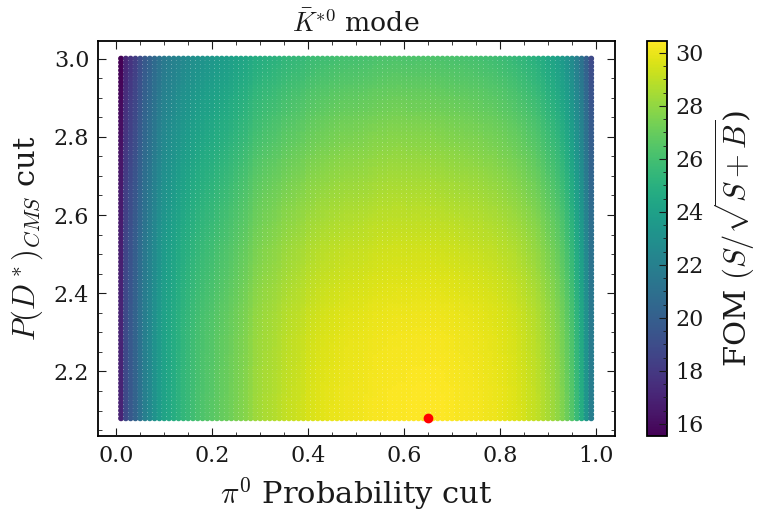

In [57]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list,y_values_list, c=FOM_antiKstar_list, s=10)
ax.set_xlabel("$\pi^0$ Probability cut")
ax.set_ylabel("$P(D^*)_{CMS}$ cut")
plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, argmax_y, color='r')
ax.set_title(r'$\bar{K}^{*0}$ mode')
plt.tight_layout()
plt.savefig(this_plot_location)


/tmp/ipykernel_4846/3553625045.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


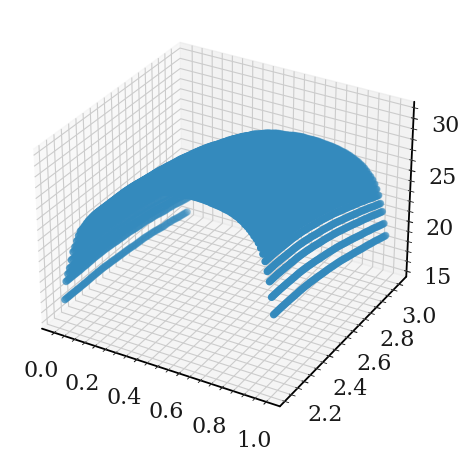

In [58]:
fig=plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_values_list,y_values_list,FOM_antiKstar_list)

In [59]:
mode='antiKstar'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.10029


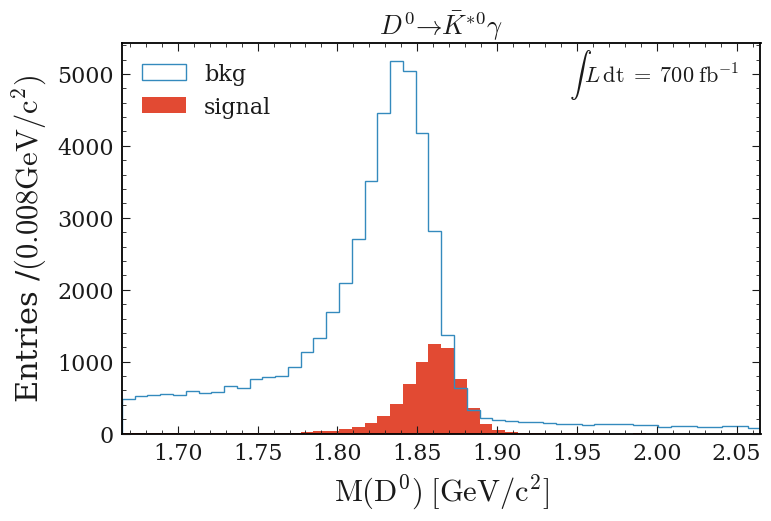

In [29]:
scale_factor = 0.18852 * 0.7

fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

df = D0_bkg_pd_antiKstar.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.30")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');


df = half_1M_1_antiKstar.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.30")
eff = len(df)/5e+5

dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$')
lumi(l=r"$700\; \mathrm{fb}^{-1}$")
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

print(eff)

In [61]:
D0_bkg_pd_antiKstar["Dstarp_CMS_p"].min()

2.0860064977277757

## P_dstar(pi0 veto fixed)

In [255]:
X = np.mgrid[2.1:3.001:0.01]

In [256]:
X

array([2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99, 3.  ])

In [257]:
scale_factor = * 0.18852 * 0.7
Pi0_cut=0.8

SyntaxError: can't use starred expression here (2976693973.py, line 1)

In [ ]:
FOM_antiKstar_1D_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []
for Dstar_momentum_cut in X:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = half_1M_1_antiKstar
    bkg_df    = D0_bkg_pd_antiKstar
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    nSig_list.append(nSig * scale_factor)
    nBkg_list.append(nBkg)    
    FOM_antiKstar_1D_list.append(FOM_antiKstar(nSig,nBkg))
    
    print(FOM_antiKstar(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Dstar_momentum_cut)

In [258]:
max(FOM_antiKstar_1D_list)
FOM_antiKstar_1D_list_np = np.asarray(FOM_antiKstar_1D_list)

print(f'FOM max = {FOM_antiKstar_1D_list_np.max()}')
print(f'argmax = {FOM_antiKstar_1D_list_np.argmax()}')

max_index = FOM_antiKstar_1D_list_np.argmax()

argmax_x = x_values_list[max_index]
print(f'max of P cut = {argmax_x}')
print(nSig_list[max_index])
print(nBkg_list[max_index])

FOM max = 29.986484085601337
argmax = 0
max of P cut = 2.1
335.109915
1523


In [259]:
mode='antiKstar'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_1D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

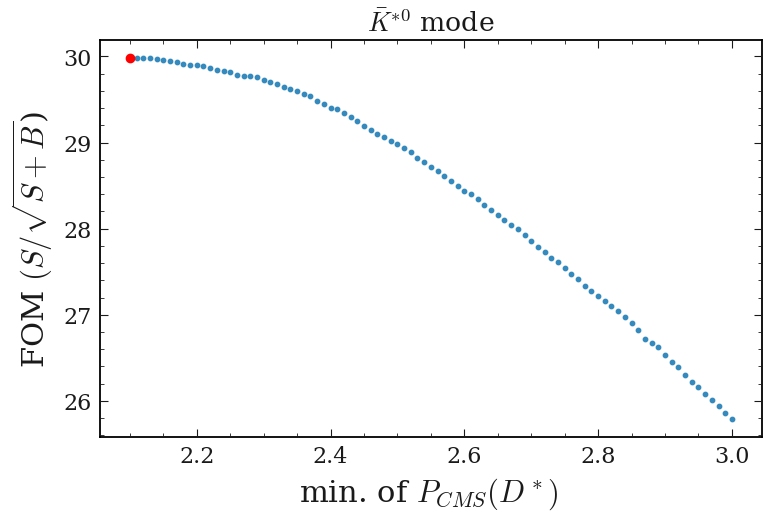

In [260]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list, FOM_antiKstar_1D_list, s=10)
ax.set_xlabel("min. of $P_{CMS}(D^*)$ ")
ax.set_ylabel("FOM $(S/\sqrt{S+B}$)")
# plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, FOM_antiKstar_1D_list[max_index], color='r')
ax.set_title(r'$\bar{K}^{*0}$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.show()


In [261]:
# dataset = half_1M_1_phi.query("Pi0_Prob < 0.68 and Dstarp_CMS_p>2.24")
# dx = np.diff(xe)
# cx = 0.5 * (xe[1:] + xe[:-1])
# n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))

In [262]:
mode='antiKstar'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.053912


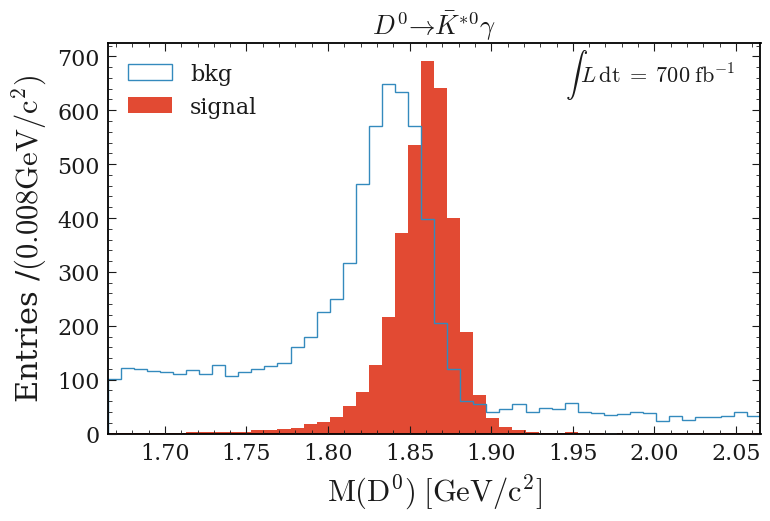

In [301]:
scale_factor =   0.18852 * 0.7

fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = D0_bkg_pd_antiKstar.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24 and abs(D0_cosHel_0)<0.4")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_antiKstar.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24 and abs(D0_cosHel_0)<0.4")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

0.09432


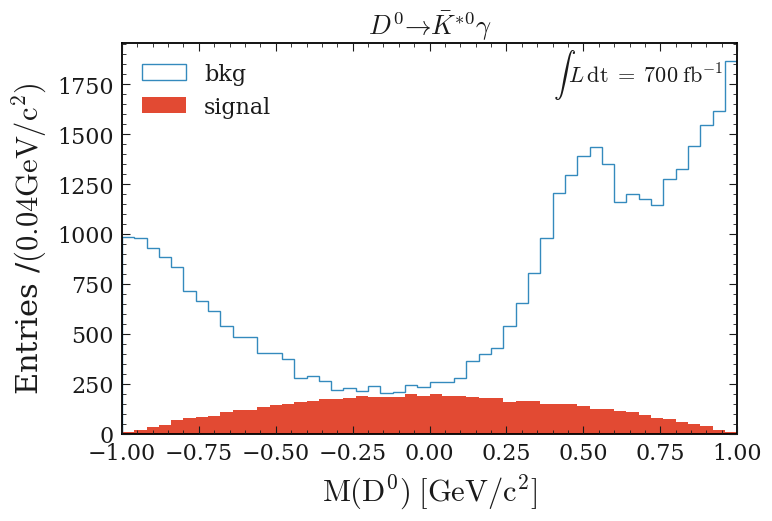

In [264]:
scale_factor =   0.18852 * 0.7

fig = plt.figure()
ax = fig.subplots()
xrange = (-1,1,51)
xm = np.linspace(*xrange)
df = D0_bkg_pd_antiKstar.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24")
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_antiKstar.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.24")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_cosHel_0"], bins=50, range=(-1,1))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(-1,1)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

# rho

In [83]:
len(BCS_half_1M_1_rho) * 0.00808 * 0.7

537.738544

In [84]:
signal_df = BCS_half_1M_1_rho
bkg_df    = BCS_D0_bkg_pd_rho

In [85]:
nSig = len(signal_df)
nBkg = len(bkg_df)

In [86]:
def FOM_rho(nS, nB):
    nS_scaled = nS * 0.00808 * 0.7
    return nS_scaled/math.sqrt(nS_scaled+nB)

In [87]:
FOM_rho(nSig,nBkg)

1.5991186539303848

## 2d(P_Dstar, pi0_veto)

In [67]:
X,Y = np.mgrid[0.01:0.991:0.01, 2.1:3.001:0.01]

In [68]:
xy = np.vstack((X.flatten(), Y.flatten())).T

In [69]:
xy

array([[0.01, 2.1 ],
       [0.01, 2.11],
       [0.01, 2.12],
       ...,
       [0.99, 2.98],
       [0.99, 2.99],
       [0.99, 3.  ]])

In [70]:
FOM_rho_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []

for (Pi0_cut,Dstar_momentum_cut) in xy:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = BCS_half_1M_1_rho
    bkg_df    = BCS_D0_bkg_pd_rho
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    
    nSig_list.append(nSig * 0.00808 * 0.7)
    nBkg_list.append(nBkg)
    
    FOM_rho_list.append(FOM_rho(nSig,nBkg))
    
    print(FOM_rho(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Pi0_cut)
    y_values_list.append(Dstar_momentum_cut)

0.01
2.1
1.6911404206279608
0.01
2.11
1.6912050208042373
0.01
2.12
1.6921807590499625
0.01
2.13
1.692996378775128
0.01
2.14
1.694110127346618
0.01
2.15
1.6934261441714595
0.01
2.16
1.6962610385169643
0.01
2.17
1.6999875468663947
0.01
2.18
1.7013722116187744
0.01
2.19
1.7036569455478314
0.01
2.2
1.7039638415580993
0.01
2.21
1.7060384896447547
0.01
2.22
1.7078169913001318
0.01
2.23
1.713217673773578
0.01
2.24
1.7174193718557234
0.01
2.25
1.7243773059926177
0.01
2.2600000000000002
1.7292128577817776
0.01
2.27
1.7334783405033407
0.01
2.2800000000000002
1.7385715701898365
0.01
2.29
1.743549309326227
0.01
2.3000000000000003
1.7484420877567082
0.01
2.31
1.7528923593721975
0.01
2.3200000000000003
1.7570294446837054
0.01
2.33
1.7597668356377119
0.01
2.34
1.761810334717416
0.01
2.35
1.7649748272240973
0.01
2.3600000000000003
1.7679758716979885
0.01
2.37
1.7731352686677864
0.01
2.38
1.7765666163827092
0.01
2.39
1.7780104325825246
0.01
2.4
1.7837025632803367
0.01
2.41
1.7870870184265226
0.01
2.42


2.203099490608332
0.03
2.92
2.203917535658945
0.03
2.93
2.205719888005228
0.03
2.94
2.208552620698897
0.03
2.95
2.2086972876031483
0.03
2.96
2.2043974187395534
0.03
2.97
2.206666975897095
0.03
2.98
2.202062637184243
0.03
2.99
2.2028937176341152
0.03
3.0
2.2046500037425045
0.04
2.1
1.9546820489645993
0.04
2.11
1.9546790843933448
0.04
2.12
1.956206221100075
0.04
2.13
1.9566325637792477
0.04
2.14
1.95789062348235
0.04
2.15
1.9579270687236598
0.04
2.16
1.9609093648998452
0.04
2.17
1.9652083021623854
0.04
2.18
1.966474822702268
0.04
2.19
1.9689107327349136
0.04
2.2
1.971636575180326
0.04
2.21
1.9744505125779215
0.04
2.22
1.9767681106523938
0.04
2.23
1.982468898871402
0.04
2.24
1.9870004260252505
0.04
2.25
1.9946431051182871
0.04
2.2600000000000002
1.9990149470681857
0.04
2.27
2.0047889241625136
0.04
2.2800000000000002
2.009215774806031
0.04
2.29
2.015566108909577
0.04
2.3000000000000003
2.020928340826395
0.04
2.31
2.026223717040938
0.04
2.3200000000000003
2.0324560563142335
0.04
2.33
2.0363

2.3106351118875517
0.060000000000000005
2.6100000000000003
2.3117623595890096
0.060000000000000005
2.62
2.3191901974460287
0.060000000000000005
2.63
2.3224342794031427
0.060000000000000005
2.64
2.320206820589718
0.060000000000000005
2.6500000000000004
2.3230193173273874
0.060000000000000005
2.66
2.3307470841048827
0.060000000000000005
2.67
2.336101849847575
0.060000000000000005
2.68
2.345284985723953
0.060000000000000005
2.69
2.3484310974627487
0.060000000000000005
2.7
2.3508221355767716
0.060000000000000005
2.71
2.357911277537959
0.060000000000000005
2.72
2.35811552865771
0.060000000000000005
2.73
2.3624901737795025
0.060000000000000005
2.74
2.362590292456812
0.060000000000000005
2.75
2.363892425640823
0.060000000000000005
2.7600000000000002
2.37452940733402
0.060000000000000005
2.77
2.3774515877480784
0.060000000000000005
2.7800000000000002
2.382738045370776
0.060000000000000005
2.79
2.3853380106821382
0.060000000000000005
2.8000000000000003
2.3868168284845375
0.060000000000000005
2.

2.4921021103957206
0.08
2.88
2.4933561670402824
0.08
2.89
2.4934142229345637
0.08
2.9000000000000004
2.4990881505954388
0.08
2.91
2.501435227930032
0.08
2.92
2.5013481805283377
0.08
2.93
2.5036767455562594
0.08
2.94
2.505619348528401
0.08
2.95
2.5054267852505627
0.08
2.96
2.4992913213491286
0.08
2.97
2.4997625972114603
0.08
2.98
2.499095017206729
0.08
2.99
2.496710763155731
0.08
3.0
2.4976507194000908
0.09
2.1
2.2184224178499274
0.09
2.11
2.2187141348379136
0.09
2.12
2.2207685035768416
0.09
2.13
2.2219696016024346
0.09
2.14
2.2227787998337134
0.09
2.15
2.224521696304826
0.09
2.16
2.2280889460505295
0.09
2.17
2.233262215776103
0.09
2.18
2.235755998380643
0.09
2.19
2.239204038130158
0.09
2.2
2.2438038721569904
0.09
2.21
2.248573743336257
0.09
2.22
2.250795446565988
0.09
2.23
2.256083206550492
0.09
2.24
2.2614943597055053
0.09
2.25
2.271085067444108
0.09
2.2600000000000002
2.2757594409437742
0.09
2.27
2.2824838966915477
0.09
2.2800000000000002
2.288371456471144
0.09
2.29
2.294551309204964

2.48716326805696
0.11
2.5100000000000002
2.4951694119711303
0.11
2.52
2.495820001395114
0.11
2.5300000000000002
2.504898302511651
0.11
2.54
2.5090839997327135
0.11
2.5500000000000003
2.5160852267006675
0.11
2.56
2.5179205820026542
0.11
2.5700000000000003
2.5260840153738404
0.11
2.58
2.5318784287723517
0.11
2.59
2.535732299751167
0.11
2.6
2.537775073452644
0.11
2.6100000000000003
2.5387691402616532
0.11
2.62
2.5450029645890733
0.11
2.63
2.548666576513701
0.11
2.64
2.5469795845684753
0.11
2.6500000000000004
2.5486354718358983
0.11
2.66
2.555441064891116
0.11
2.67
2.559411053764355
0.11
2.68
2.5672165365690773
0.11
2.69
2.5716092554728807
0.11
2.7
2.5737667879178976
0.11
2.71
2.5825363512996957
0.11
2.72
2.5846265283231498
0.11
2.73
2.5909732711627367
0.11
2.74
2.591029852296633
0.11
2.75
2.593600509870854
0.11
2.7600000000000002
2.600576267104662
0.11
2.77
2.601937718855507
0.11
2.7800000000000002
2.606813724948126
0.11
2.79
2.609843825154451
0.11
2.8000000000000003
2.6122062086253592
0.

2.5253102465446204
0.14
2.42
2.5326939177097048
0.14
2.43
2.537356458696957
0.14
2.44
2.542315262009244
0.14
2.45
2.547320540620031
0.14
2.46
2.5526885451138948
0.14
2.47
2.5565894964135922
0.14
2.48
2.561536576861256
0.14
2.49
2.5658325779730076
0.14
2.5
2.573082093535772
0.14
2.5100000000000002
2.580172787390148
0.14
2.52
2.58192365116639
0.14
2.5300000000000002
2.5894991080583343
0.14
2.54
2.5937470318855964
0.14
2.5500000000000003
2.6001498344824654
0.14
2.56
2.6026266311797643
0.14
2.5700000000000003
2.6106122775359557
0.14
2.58
2.6166432347668014
0.14
2.59
2.6209058593508825
0.14
2.6
2.6226890088662147
0.14
2.6100000000000003
2.6243020490726674
0.14
2.62
2.6305608705679338
0.14
2.63
2.6348179914065764
0.14
2.64
2.63298966973825
0.14
2.6500000000000004
2.6357783265973858
0.14
2.66
2.6432541266328857
0.14
2.67
2.6471871221470784
0.14
2.68
2.6540751285427153
0.14
2.69
2.659256996094989
0.14
2.7
2.6621585381517465
0.14
2.71
2.6724940252520675
0.14
2.72
2.6751492953037195
0.14
2.73
2.

2.769340536225562
0.16
2.88
2.7699553736736817
0.16
2.89
2.7686131894932675
0.16
2.9000000000000004
2.7732285466038515
0.16
2.91
2.774953049138152
0.16
2.92
2.776795304169036
0.16
2.93
2.7788229451938644
0.16
2.94
2.779581693424059
0.16
2.95
2.7796412628225697
0.16
2.96
2.773589388479397
0.16
2.97
2.774580738867683
0.16
2.98
2.773267311424084
0.16
2.99
2.7742375380634017
0.16
3.0
2.7734835964740787
0.17
2.1
2.4421628780114015
0.17
2.11
2.4426456410698725
0.17
2.12
2.4447119877524504
0.17
2.13
2.446169385771563
0.17
2.14
2.4478501817175524
0.17
2.15
2.450597205354801
0.17
2.16
2.4555815535570815
0.17
2.17
2.4602980124756115
0.17
2.18
2.4625185719378253
0.17
2.19
2.467000262114053
0.17
2.2
2.4717773605625375
0.17
2.21
2.4784577898081728
0.17
2.22
2.4811361579337254
0.17
2.23
2.486789644053889
0.17
2.24
2.492705806951727
0.17
2.25
2.5032553414229706
0.17
2.2600000000000002
2.5093355404409636
0.17
2.27
2.518077770850099
0.17
2.2800000000000002
2.524160130484287
0.17
2.29
2.5308174562884047

2.62296596872613
0.19
2.41
2.6288093572537283
0.19
2.42
2.6356642496770086
0.19
2.43
2.6400131570905896
0.19
2.44
2.644528150164564
0.19
2.45
2.650768811802292
0.19
2.46
2.65653365769273
0.19
2.47
2.6607733799419324
0.19
2.48
2.6671842421469956
0.19
2.49
2.6716639318436592
0.19
2.5
2.6781536329672737
0.19
2.5100000000000002
2.684328850387259
0.19
2.52
2.6860679578597293
0.19
2.5300000000000002
2.6934223244181013
0.19
2.54
2.6983614725976266
0.19
2.5500000000000003
2.705696049480016
0.19
2.56
2.70886830790072
0.19
2.5700000000000003
2.718529636965309
0.19
2.58
2.7230881020265967
0.19
2.59
2.7272176900935854
0.19
2.6
2.7287206578844896
0.19
2.6100000000000003
2.7313655711809215
0.19
2.62
2.737516071585484
0.19
2.63
2.7415980348186513
0.19
2.64
2.7412606305480094
0.19
2.6500000000000004
2.744484278484172
0.19
2.66
2.7521429283859407
0.19
2.67
2.755866145136765
0.19
2.68
2.7613028591329547
0.19
2.69
2.767800213787767
0.19
2.7
2.7717556198041704
0.19
2.71
2.7809774157007996
0.19
2.72
2.7843

2.5162415670275307
0.22
2.15
2.5194666596749986
0.22
2.16
2.5241391976794887
0.22
2.17
2.5286842033083126
0.22
2.18
2.5308521164064786
0.22
2.19
2.535133297709
0.22
2.2
2.5397171598927852
0.22
2.21
2.5469136371495993
0.22
2.22
2.54992062229845
0.22
2.23
2.5557795415708253
0.22
2.24
2.561939746712033
0.22
2.25
2.5725044905161902
0.22
2.2600000000000002
2.579037565085312
0.22
2.27
2.5871012143211414
0.22
2.2800000000000002
2.5932221173787324
0.22
2.29
2.5995905104275745
0.22
2.3000000000000003
2.605332129404407
0.22
2.31
2.6132345730367184
0.22
2.3200000000000003
2.620455852457617
0.22
2.33
2.62324514441524
0.22
2.34
2.6299247307928924
0.22
2.35
2.6371918262921357
0.22
2.3600000000000003
2.6439246531733542
0.22
2.37
2.6500730381751554
0.22
2.38
2.6582702800296394
0.22
2.39
2.6628400299021044
0.22
2.4
2.6669188891775573
0.22
2.41
2.672939006900981
0.22
2.42
2.6790565802101765
0.22
2.43
2.6838796448278175
0.22
2.44
2.6898606525883824
0.22
2.45
2.6958301940374816
0.22
2.46
2.701050883718894

2.8966704881013703
0.24000000000000002
2.84
2.8951791465014822
0.24000000000000002
2.85
2.897611763594214
0.24000000000000002
2.8600000000000003
2.8985105310650594
0.24000000000000002
2.87
2.901014758018904
0.24000000000000002
2.88
2.900593739244224
0.24000000000000002
2.89
2.8991929571512203
0.24000000000000002
2.9000000000000004
2.9020418120348137
0.24000000000000002
2.91
2.9028323558080573
0.24000000000000002
2.92
2.9042766819153627
0.24000000000000002
2.93
2.9047597623478736
0.24000000000000002
2.94
2.905551261194219
0.24000000000000002
2.95
2.9056418691366015
0.24000000000000002
2.96
2.899635959637472
0.24000000000000002
2.97
2.8998523484835053
0.24000000000000002
2.98
2.896874531198339
0.24000000000000002
2.99
2.89861377178003
0.24000000000000002
3.0
2.896690378390513
0.25
2.1
2.5579982026355643
0.25
2.11
2.5583614982788268
0.25
2.12
2.560065012286894
0.25
2.13
2.5612646120131712
0.25
2.14
2.5633818802533517
0.25
2.15
2.566220453588021
0.25
2.16
2.570843749924523
0.25
2.17
2.5755

2.951081519571112
0.27
2.8600000000000003
2.9512780419690365
0.27
2.87
2.9531015015302415
0.27
2.88
2.9525893554724045
0.27
2.89
2.9517201120596313
0.27
2.9000000000000004
2.955360978012709
0.27
2.91
2.955398268790266
0.27
2.92
2.956393459678146
0.27
2.93
2.9573252192520223
0.27
2.94
2.9581741610976575
0.27
2.95
2.95859654417907
0.27
2.96
2.952059889074705
0.27
2.97
2.9522332836261653
0.27
2.98
2.9488101988613162
0.27
2.99
2.949745837709573
0.27
3.0
2.9481314418448408
0.28
2.1
2.605566279468888
0.28
2.11
2.6060747713708396
0.28
2.12
2.607801392860402
0.28
2.13
2.609203377163036
0.28
2.14
2.61142431241
0.28
2.15
2.614399652743155
0.28
2.16
2.618970683603504
0.28
2.17
2.6235117686396783
0.28
2.18
2.626064114804278
0.28
2.19
2.6305020563556787
0.28
2.2
2.6352412235142304
0.28
2.21
2.6425143608047406
0.28
2.22
2.6465298913854687
0.28
2.23
2.6538348364974635
0.28
2.24
2.6605182848851947
0.28
2.25
2.6711864590438057
0.28
2.2600000000000002
2.6780006739590667
0.28
2.27
2.685966565026379
0.28


2.884451249804352
0.3
2.54
2.889877557509528
0.3
2.5500000000000003
2.896688127712685
0.3
2.56
2.9020821891535666
0.3
2.5700000000000003
2.910306635432472
0.3
2.58
2.9148034688487265
0.3
2.59
2.9177103207088204
0.3
2.6
2.920427721025361
0.3
2.6100000000000003
2.9238441675839284
0.3
2.62
2.930465559525332
0.3
2.63
2.9342476021443127
0.3
2.64
2.934039694260334
0.3
2.6500000000000004
2.935778938949338
0.3
2.66
2.942011354618384
0.3
2.67
2.947137316067406
0.3
2.68
2.951618233968995
0.3
2.69
2.9590898950268216
0.3
2.7
2.9619460026033284
0.3
2.71
2.9692157980758265
0.3
2.72
2.972532898678224
0.3
2.73
2.9780684244371236
0.3
2.74
2.9790956777996875
0.3
2.75
2.9797341160076565
0.3
2.7600000000000002
2.983142799758684
0.3
2.77
2.9869394502504854
0.3
2.7800000000000002
2.9915229895826894
0.3
2.79
2.9922499461156393
0.3
2.8000000000000003
2.9962965888858175
0.3
2.81
3.0030512393913167
0.3
2.8200000000000003
3.0059908244189617
0.3
2.83
3.0079924904577537
0.3
2.84
3.0071575374389314
0.3
2.85
3.00784

2.90294121516326
0.33
2.5100000000000002
2.908605683781223
0.33
2.52
2.9112311015882066
0.33
2.5300000000000002
2.9191054977900985
0.33
2.54
2.9245121998891572
0.33
2.5500000000000003
2.9302975669633984
0.33
2.56
2.9359635986385824
0.33
2.5700000000000003
2.9439842721220035
0.33
2.58
2.9480902752328046
0.33
2.59
2.9505505797137457
0.33
2.6
2.9535479286326773
0.33
2.6100000000000003
2.956971989413708
0.33
2.62
2.962876954106035
0.33
2.63
2.9656174627490137
0.33
2.64
2.9661886740256165
0.33
2.6500000000000004
2.9674931338390014
0.33
2.66
2.972629029336219
0.33
2.67
2.977314570120009
0.33
2.68
2.9825270178010266
0.33
2.69
2.990292494145301
0.33
2.7
2.9931270282522
0.33
2.71
2.999870749690746
0.33
2.72
3.0029306786481715
0.33
2.73
3.00896693437993
0.33
2.74
3.0101622336077036
0.33
2.75
3.010330368581312
0.33
2.7600000000000002
3.013146411112756
0.33
2.77
3.016121538420311
0.33
2.7800000000000002
3.0203483081702007
0.33
2.79
3.022223049683007
0.33
2.8000000000000003
3.02639780126526
0.33
2.

2.7848158502546876
0.36000000000000004
2.2600000000000002
2.7917873536549855
0.36000000000000004
2.27
2.7994536177674654
0.36000000000000004
2.2800000000000002
2.8057691612527726
0.36000000000000004
2.29
2.8113628874388024
0.36000000000000004
2.3000000000000003
2.8187068952779875
0.36000000000000004
2.31
2.826482444308446
0.36000000000000004
2.3200000000000003
2.833119944010233
0.36000000000000004
2.33
2.8369629548822086
0.36000000000000004
2.34
2.843570197413342
0.36000000000000004
2.35
2.8506604376397653
0.36000000000000004
2.3600000000000003
2.856732265142399
0.36000000000000004
2.37
2.8637112305665537
0.36000000000000004
2.38
2.8709865517702755
0.36000000000000004
2.39
2.875149233014731
0.36000000000000004
2.4
2.878048384607188
0.36000000000000004
2.41
2.8851448561034725
0.36000000000000004
2.42
2.8929829131361937
0.36000000000000004
2.43
2.900102102188667
0.36000000000000004
2.44
2.906130639339572
0.36000000000000004
2.45
2.911883467347965
0.36000000000000004
2.46
2.91786814763709

3.0647091111971614
0.38
2.7800000000000002
3.0690039712778936
0.38
2.79
3.0700305467263336
0.38
2.8000000000000003
3.076191288751149
0.38
2.81
3.081481154643261
0.38
2.8200000000000003
3.0853138389947747
0.38
2.83
3.0874495878559114
0.38
2.84
3.087358463997296
0.38
2.85
3.088916569406122
0.38
2.8600000000000003
3.088425609818283
0.38
2.87
3.0918599915991916
0.38
2.88
3.091373467221201
0.38
2.89
3.089081711762311
0.38
2.9000000000000004
3.0918029057890686
0.38
2.91
3.0907681085689944
0.38
2.92
3.0922225579092104
0.38
2.93
3.094307987276464
0.38
2.94
3.095085060635252
0.38
2.95
3.0932646997387914
0.38
2.96
3.088155098101118
0.38
2.97
3.0888734546660293
0.38
2.98
3.0856392720838595
0.38
2.99
3.0853716372419138
0.38
3.0
3.0812448512988952
0.39
2.1
2.7306815848591586
0.39
2.11
2.7313199548050395
0.39
2.12
2.7328280202566457
0.39
2.13
2.7340209792596855
0.39
2.14
2.736142944434066
0.39
2.15
2.7395321474607277
0.39
2.16
2.74440397807812
0.39
2.17
2.7484524647591346
0.39
2.18
2.751801140682027

3.0614900339824778
0.41000000000000003
2.7
3.0652736338084026
0.41000000000000003
2.71
3.0728929334520836
0.41000000000000003
2.72
3.0761544058161294
0.41000000000000003
2.73
3.0818158531172353
0.41000000000000003
2.74
3.081794313043438
0.41000000000000003
2.75
3.0808154644294254
0.41000000000000003
2.7600000000000002
3.0839403912893224
0.41000000000000003
2.77
3.086166564997843
0.41000000000000003
2.7800000000000002
3.090421134159052
0.41000000000000003
2.79
3.091693492492185
0.41000000000000003
2.8000000000000003
3.0981614547436775
0.41000000000000003
2.81
3.1033618223979604
0.41000000000000003
2.8200000000000003
3.1075207487152676
0.41000000000000003
2.83
3.1095396265680124
0.41000000000000003
2.84
3.109615285410665
0.41000000000000003
2.85
3.1106875436282535
0.41000000000000003
2.8600000000000003
3.110845443416087
0.41000000000000003
2.87
3.1130432222820876
0.41000000000000003
2.88
3.113283859765303
0.41000000000000003
2.89
3.1098154207344653
0.41000000000000003
2.9000000000000004


3.1056862542662746
0.44
2.1
2.753416702568987
0.44
2.11
2.753949061142454
0.44
2.12
2.7559079171189724
0.44
2.13
2.756995050629018
0.44
2.14
2.7590073035580343
0.44
2.15
2.7625705940852328
0.44
2.16
2.7670996085126345
0.44
2.17
2.7712265824195876
0.44
2.18
2.774784424872572
0.44
2.19
2.7805960816679285
0.44
2.2
2.7843547763637417
0.44
2.21
2.7913120087418393
0.44
2.22
2.796557172590229
0.44
2.23
2.80520566086648
0.44
2.24
2.8107752020771724
0.44
2.25
2.8192656298789474
0.44
2.2600000000000002
2.8267188749963346
0.44
2.27
2.8340479623359087
0.44
2.2800000000000002
2.840355061988328
0.44
2.29
2.846645096369711
0.44
2.3000000000000003
2.8536269072613
0.44
2.31
2.8607528633782073
0.44
2.3200000000000003
2.8670674505386184
0.44
2.33
2.8709289443679307
0.44
2.34
2.877782843121562
0.44
2.35
2.8847298371413714
0.44
2.3600000000000003
2.8908772964620146
0.44
2.37
2.897585982811608
0.44
2.38
2.905392015378846
0.44
2.39
2.9094779217957285
0.44
2.4
2.912205791978431
0.44
2.41
2.9195854825347975
0.

2.8654217681536376
0.47000000000000003
2.31
2.873064146521339
0.47000000000000003
2.3200000000000003
2.8792815498669606
0.47000000000000003
2.33
2.8829777424734924
0.47000000000000003
2.34
2.8900314640163796
0.47000000000000003
2.35
2.8968712619776062
0.47000000000000003
2.3600000000000003
2.9029768645669303
0.47000000000000003
2.37
2.909710714046157
0.47000000000000003
2.38
2.9172456249858434
0.47000000000000003
2.39
2.921558449727944
0.47000000000000003
2.4
2.924076084527538
0.47000000000000003
2.41
2.9319296303344022
0.47000000000000003
2.42
2.9389972951138597
0.47000000000000003
2.43
2.9457293582940602
0.47000000000000003
2.44
2.95160963136547
0.47000000000000003
2.45
2.957486161758971
0.47000000000000003
2.46
2.964104152341146
0.47000000000000003
2.47
2.969582334754932
0.47000000000000003
2.48
2.9757278359329318
0.47000000000000003
2.49
2.9820309704789247
0.47000000000000003
2.5
2.989975086392414
0.47000000000000003
2.5100000000000002
2.9965481978405375
0.47000000000000003
2.52
2.

3.018076715815056
0.49
2.56
3.022636374480917
0.49
2.5700000000000003
3.028618131946935
0.49
2.58
3.031684732874554
0.49
2.59
3.0329670539314466
0.49
2.6
3.0377532813296804
0.49
2.6100000000000003
3.041650325239461
0.49
2.62
3.0449525403836923
0.49
2.63
3.047657943681042
0.49
2.64
3.049004637596948
0.49
2.6500000000000004
3.0529757508612
0.49
2.66
3.059098529118234
0.49
2.67
3.064127383092859
0.49
2.68
3.070025267366742
0.49
2.69
3.0764879888089967
0.49
2.7
3.081024668099383
0.49
2.71
3.0878222952928054
0.49
2.72
3.0917848185237315
0.49
2.73
3.096000629277927
0.49
2.74
3.0967049664431725
0.49
2.75
3.0960297221889213
0.49
2.7600000000000002
3.098731271460783
0.49
2.77
3.101898671269959
0.49
2.7800000000000002
3.103940255899494
0.49
2.79
3.104438739952352
0.49
2.8000000000000003
3.11013938964057
0.49
2.81
3.11555130745538
0.49
2.8200000000000003
3.119938037036641
0.49
2.83
3.120599555260616
0.49
2.84
3.120686503927781
0.49
2.85
3.121806129705897
0.49
2.8600000000000003
3.1202814027618384

3.046059569401119
0.52
2.6500000000000004
3.0502399972106424
0.52
2.66
3.056637253565822
0.52
2.67
3.0617182634101834
0.52
2.68
3.066967727200247
0.52
2.69
3.073259986221924
0.52
2.7
3.0774345355539614
0.52
2.71
3.0841507812638027
0.52
2.72
3.0877778465659884
0.52
2.73
3.092114544996593
0.52
2.74
3.092712134980867
0.52
2.75
3.092290379841811
0.52
2.7600000000000002
3.0958117235166
0.52
2.77
3.099363151760741
0.52
2.7800000000000002
3.101000448030639
0.52
2.79
3.100963396389645
0.52
2.8000000000000003
3.106087697338797
0.52
2.81
3.1117586433360542
0.52
2.8200000000000003
3.1164401316979364
0.52
2.83
3.1169685938821967
0.52
2.84
3.1176357618322186
0.52
2.85
3.118290875597526
0.52
2.8600000000000003
3.116849699205559
0.52
2.87
3.1195867624915277
0.52
2.88
3.120560245004042
0.52
2.89
3.115659272647404
0.52
2.9000000000000004
3.1185280222528617
0.52
2.91
3.117861265206331
0.52
2.92
3.119492995569331
0.52
2.93
3.121168327314674
0.52
2.94
3.1204745094942896
0.52
2.95
3.1193459019187246
0.52
2

3.029033684886176
0.55
2.58
3.0324094533905135
0.55
2.59
3.033483786527504
0.55
2.6
3.0376399105585166
0.55
2.6100000000000003
3.0415474105156663
0.55
2.62
3.0449015415917464
0.55
2.63
3.0472366046982082
0.55
2.64
3.0486324822641
0.55
2.6500000000000004
3.052231725833206
0.55
2.66
3.0584083359506673
0.55
2.67
3.062634644506013
0.55
2.68
3.0682707200430825
0.55
2.69
3.0746932848597197
0.55
2.7
3.0790164243229783
0.55
2.71
3.085592297472465
0.55
2.72
3.0892347913957265
0.55
2.73
3.0935693356809417
0.55
2.74
3.0940158207496444
0.55
2.75
3.0937696061691917
0.55
2.7600000000000002
3.0974256446466244
0.55
2.77
3.101368837670024
0.55
2.7800000000000002
3.1022762059478004
0.55
2.79
3.101906713818119
0.55
2.8000000000000003
3.1071296493824456
0.55
2.81
3.1123747061779565
0.55
2.8200000000000003
3.116026115445274
0.55
2.83
3.1163439946608262
0.55
2.84
3.1178362020682004
0.55
2.85
3.1187812048707366
0.55
2.8600000000000003
3.116374215409965
0.55
2.87
3.1197212494848032
0.55
2.88
3.120975672032598

2.8836410681532025
0.5800000000000001
2.33
2.8868032225322735
0.5800000000000001
2.34
2.893156227557477
0.5800000000000001
2.35
2.9005115920082805
0.5800000000000001
2.3600000000000003
2.907172586805555
0.5800000000000001
2.37
2.9131146445618947
0.5800000000000001
2.38
2.9195536640780135
0.5800000000000001
2.39
2.9242900367444173
0.5800000000000001
2.4
2.9280274756256532
0.5800000000000001
2.41
2.9365505719250002
0.5800000000000001
2.42
2.943624619127897
0.5800000000000001
2.43
2.949956015327104
0.5800000000000001
2.44
2.9561937455872567
0.5800000000000001
2.45
2.962392601833198
0.5800000000000001
2.46
2.968505997853549
0.5800000000000001
2.47
2.9736278933563054
0.5800000000000001
2.48
2.9797389708676616
0.5800000000000001
2.49
2.9864477226120076
0.5800000000000001
2.5
2.994003032527949
0.5800000000000001
2.5100000000000002
3.000091706988403
0.5800000000000001
2.52
3.0035357358020858
0.5800000000000001
2.5300000000000002
3.0091695068997653
0.5800000000000001
2.54
3.0152254543097237
0.5

2.8206944707157446
0.61
2.25
2.829293509811869
0.61
2.2600000000000002
2.8368049378070177
0.61
2.27
2.844548494457447
0.61
2.2800000000000002
2.8508980349089628
0.61
2.29
2.8575932143289613
0.61
2.3000000000000003
2.864963020212532
0.61
2.31
2.8717120664698057
0.61
2.3200000000000003
2.878266449507026
0.61
2.33
2.881554577427742
0.61
2.34
2.8876736950963346
0.61
2.35
2.894812493245192
0.61
2.3600000000000003
2.901886855704665
0.61
2.37
2.907563848060427
0.61
2.38
2.9139597990882145
0.61
2.39
2.918526162546647
0.61
2.4
2.922088373927644
0.61
2.41
2.931109821062335
0.61
2.42
2.937612275017929
0.61
2.43
2.9434666735811756
0.61
2.44
2.9492332714062495
0.61
2.45
2.95541960361218
0.61
2.46
2.961416697405605
0.61
2.47
2.9662582683856593
0.61
2.48
2.9725502638574417
0.61
2.49
2.9788381668457338
0.61
2.5
2.9856995006841807
0.61
2.5100000000000002
2.99177736760209
0.61
2.52
2.995543046512389
0.61
2.5300000000000002
3.001264648576209
0.61
2.54
3.007226252635188
0.61
2.5500000000000003
3.012720428

2.785339014675192
0.64
2.21
2.791782350575982
0.64
2.22
2.7969029483492
0.64
2.23
2.805621010496534
0.64
2.24
2.8111465683312677
0.64
2.25
2.81947337580447
0.64
2.2600000000000002
2.826970574639616
0.64
2.27
2.8347451577177347
0.64
2.2800000000000002
2.8413093976464068
0.64
2.29
2.847986285488602
0.64
2.3000000000000003
2.85568512070413
0.64
2.31
2.8626180560194308
0.64
2.3200000000000003
2.868740473180425
0.64
2.33
2.8718888253248713
0.64
2.34
2.8781756341080005
0.64
2.35
2.8849572163540302
0.64
2.3600000000000003
2.8925542769519934
0.64
2.37
2.8980071785150745
0.64
2.38
2.9039620157637214
0.64
2.39
2.90861632267535
0.64
2.4
2.9120495236897446
0.64
2.41
2.920700207709134
0.64
2.42
2.9270923750558215
0.64
2.43
2.933130677236208
0.64
2.44
2.9388317070477696
0.64
2.45
2.9446626647190737
0.64
2.46
2.950352094276786
0.64
2.47
2.954991680729709
0.64
2.48
2.9609769035669236
0.64
2.49
2.9672951099296117
0.64
2.5
2.9744492205891007
0.64
2.5100000000000002
2.980441118617954
0.64
2.52
2.98449841

2.931744388816582
0.67
2.46
2.9377940129850666
0.67
2.47
2.9428201163543863
0.67
2.48
2.948800118537849
0.67
2.49
2.955448403948611
0.67
2.5
2.9630968740975487
0.67
2.5100000000000002
2.9684982699073186
0.67
2.52
2.973158073635257
0.67
2.5300000000000002
2.9787114564468027
0.67
2.54
2.984639820611963
0.67
2.5500000000000003
2.9902704367253805
0.67
2.56
2.9941178718059978
0.67
2.5700000000000003
2.999205927165467
0.67
2.58
3.0033350888740395
0.67
2.59
3.003683371601021
0.67
2.6
3.00819828282095
0.67
2.6100000000000003
3.0116309033181503
0.67
2.62
3.013800583388346
0.67
2.63
3.016379437616744
0.67
2.64
3.017783443096209
0.67
2.6500000000000004
3.0216554634587904
0.67
2.66
3.028525965030694
0.67
2.67
3.0317438856155765
0.67
2.68
3.0355197145397845
0.67
2.69
3.0413833537550263
0.67
2.7
3.046210012087377
0.67
2.71
3.0520251145743074
0.67
2.72
3.0552653402576206
0.67
2.73
3.0592244116908205
0.67
2.74
3.059421501018332
0.67
2.75
3.0591695260589615
0.67
2.7600000000000002
3.0627594926418524
0.

2.8646209785018204
0.7000000000000001
2.3600000000000003
2.872092027977743
0.7000000000000001
2.37
2.8777047364924955
0.7000000000000001
2.38
2.883215086564873
0.7000000000000001
2.39
2.8877571813184013
0.7000000000000001
2.4
2.8911620831222256
0.7000000000000001
2.41
2.899153985766982
0.7000000000000001
2.42
2.9054659221971253
0.7000000000000001
2.43
2.910714664730531
0.7000000000000001
2.44
2.915812500581804
0.7000000000000001
2.45
2.9216775869930367
0.7000000000000001
2.46
2.9279914979682427
0.7000000000000001
2.47
2.9329874387507453
0.7000000000000001
2.48
2.9390360302418665
0.7000000000000001
2.49
2.945747792232877
0.7000000000000001
2.5
2.95294212231503
0.7000000000000001
2.5100000000000002
2.958156189061525
0.7000000000000001
2.52
2.962892868897093
0.7000000000000001
2.5300000000000002
2.968096279312823
0.7000000000000001
2.54
2.973766437787169
0.7000000000000001
2.5500000000000003
2.9789345522601134
0.7000000000000001
2.56
2.9826027561408934
0.7000000000000001
2.570000000000000

2.987976880010834
0.72
2.62
2.989751831554032
0.72
2.63
2.992742938254526
0.72
2.64
2.9944322488564312
0.72
2.6500000000000004
2.998391173485863
0.72
2.66
3.004930543486126
0.72
2.67
3.0077327393222104
0.72
2.68
3.0123415553995985
0.72
2.69
3.0166641259350264
0.72
2.7
3.0212832765360487
0.72
2.71
3.026878173076254
0.72
2.72
3.0302820971486315
0.72
2.73
3.0348627810782034
0.72
2.74
3.036306444789224
0.72
2.75
3.0359156499192186
0.72
2.7600000000000002
3.038986344644882
0.72
2.77
3.0425515407694506
0.72
2.7800000000000002
3.042860314135849
0.72
2.79
3.0435867192762514
0.72
2.8000000000000003
3.0474223719474756
0.72
2.81
3.052173462580087
0.72
2.8200000000000003
3.055835705616438
0.72
2.83
3.054385084617982
0.72
2.84
3.0549166444209
0.72
2.85
3.0564378119964903
0.72
2.8600000000000003
3.0539191494273834
0.72
2.87
3.0560265264386253
0.72
2.88
3.0563267139275245
0.72
2.89
3.052565571292362
0.72
2.9000000000000004
3.0555006881394537
0.72
2.91
3.0539860079269636
0.72
2.92
3.054241200284939
0.

2.9540780822696378
0.75
2.6
2.9585151058150636
0.75
2.6100000000000003
2.9612663099005094
0.75
2.62
2.9631501525891317
0.75
2.63
2.966321445608806
0.75
2.64
2.967814321412216
0.75
2.6500000000000004
2.971557894994289
0.75
2.66
2.977518916229478
0.75
2.67
2.9802316649440272
0.75
2.68
2.9847341932468154
0.75
2.69
2.98898480763236
0.75
2.7
2.9933960179781995
0.75
2.71
2.998508240055061
0.75
2.72
3.0020784400403273
0.75
2.73
3.0066735031577925
0.75
2.74
3.0076632703929245
0.75
2.75
3.007588225098853
0.75
2.7600000000000002
3.009725834786934
0.75
2.77
3.0139407768522966
0.75
2.7800000000000002
3.014436719501445
0.75
2.79
3.015413082420497
0.75
2.8000000000000003
3.0192036223424923
0.75
2.81
3.024042181473717
0.75
2.8200000000000003
3.027843833742507
0.75
2.83
3.026652338183874
0.75
2.84
3.0268749008313254
0.75
2.85
3.0281459446945473
0.75
2.8600000000000003
3.026258141153018
0.75
2.87
3.0280950663157093
0.75
2.88
3.028504990777093
0.75
2.89
3.024904909534739
0.75
2.9000000000000004
3.027923

3.000233168394149
0.78
2.88
3.000633542038175
0.78
2.89
2.996753697861879
0.78
2.9000000000000004
2.9994222443469223
0.78
2.91
2.9979386862481254
0.78
2.92
2.997541586294938
0.78
2.93
3.0003108431816714
0.78
2.94
2.998772270808096
0.78
2.95
2.9972917487177364
0.78
2.96
2.9954726274713805
0.78
2.97
2.996156520448774
0.78
2.98
2.994452893546892
0.78
2.99
2.996567663323726
0.78
3.0
2.9939319511067164
0.79
2.1
2.664533962779883
0.79
2.11
2.6648306210049864
0.79
2.12
2.6666245564823727
0.79
2.13
2.668385226698167
0.79
2.14
2.67068631462362
0.79
2.15
2.673953494038546
0.79
2.16
2.6783302898066945
0.79
2.17
2.682572684420006
0.79
2.18
2.6870456076874145
0.79
2.19
2.6917652514466455
0.79
2.2
2.696946422286732
0.79
2.21
2.7028746893210878
0.79
2.22
2.7081082633785125
0.79
2.23
2.716405498008459
0.79
2.24
2.7228972080000795
0.79
2.25
2.7312106963597595
0.79
2.2600000000000002
2.7388246671753027
0.79
2.27
2.7464141207052304
0.79
2.2800000000000002
2.7529958819032267
0.79
2.29
2.7586101611863096
0

2.7056941093953606
0.8200000000000001
2.27
2.71360975806999
0.8200000000000001
2.2800000000000002
2.7194596624024614
0.8200000000000001
2.29
2.7247532006753015
0.8200000000000001
2.3000000000000003
2.732369236432861
0.8200000000000001
2.31
2.739191414569235
0.8200000000000001
2.3200000000000003
2.7448374986375677
0.8200000000000001
2.33
2.747897285959349
0.8200000000000001
2.34
2.7542630232538063
0.8200000000000001
2.35
2.7617920881363576
0.8200000000000001
2.3600000000000003
2.768642444209545
0.8200000000000001
2.37
2.7735080840374935
0.8200000000000001
2.38
2.778867297791838
0.8200000000000001
2.39
2.7838287232017764
0.8200000000000001
2.4
2.7882020648116814
0.8200000000000001
2.41
2.7959111572839817
0.8200000000000001
2.42
2.801929688461913
0.8200000000000001
2.43
2.807626095793387
0.8200000000000001
2.44
2.8125275987778613
0.8200000000000001
2.45
2.8175972026418807
0.8200000000000001
2.46
2.823560678947114
0.8200000000000001
2.47
2.8283728413154057
0.8200000000000001
2.48
2.8340775

2.793825527951491
0.8400000000000001
2.47
2.798918402417214
0.8400000000000001
2.48
2.8043938318056516
0.8400000000000001
2.49
2.809894852525072
0.8400000000000001
2.5
2.8162410448343094
0.8400000000000001
2.5100000000000002
2.820862294120615
0.8400000000000001
2.52
2.825607257712647
0.8400000000000001
2.5300000000000002
2.829927868509455
0.8400000000000001
2.54
2.83583241741703
0.8400000000000001
2.5500000000000003
2.8391120397332656
0.8400000000000001
2.56
2.8420777304092293
0.8400000000000001
2.5700000000000003
2.8466492619705352
0.8400000000000001
2.58
2.849471760406544
0.8400000000000001
2.59
2.8510959842976114
0.8400000000000001
2.6
2.856328600433325
0.8400000000000001
2.6100000000000003
2.859095932800583
0.8400000000000001
2.62
2.860531337142675
0.8400000000000001
2.63
2.8631593788763827
0.8400000000000001
2.64
2.864922871419976
0.8400000000000001
2.6500000000000004
2.868244403523462
0.8400000000000001
2.66
2.8732462846121383
0.8400000000000001
2.67
2.876775940825436
0.840000000

2.6444728427841375
0.87
2.29
2.649740341576605
0.87
2.3000000000000003
2.6569463269590483
0.87
2.31
2.6636553710720543
0.87
2.3200000000000003
2.6695353062293945
0.87
2.33
2.673024649785351
0.87
2.34
2.67944767643599
0.87
2.35
2.6863825370810335
0.87
2.3600000000000003
2.6929375486051144
0.87
2.37
2.6978217342378534
0.87
2.38
2.7025780536317887
0.87
2.39
2.7073197930472745
0.87
2.4
2.71192796197941
0.87
2.41
2.718405418466456
0.87
2.42
2.7241745590401334
0.87
2.43
2.7298976447626533
0.87
2.44
2.734792205312142
0.87
2.45
2.7400574562095215
0.87
2.46
2.745265705335971
0.87
2.47
2.750048877727444
0.87
2.48
2.7549515717508064
0.87
2.49
2.760053829156346
0.87
2.5
2.7664345115149
0.87
2.5100000000000002
2.770768182380994
0.87
2.52
2.775873067381834
0.87
2.5300000000000002
2.780126039276754
0.87
2.54
2.785398792230982
0.87
2.5500000000000003
2.7886700150252186
0.87
2.56
2.7913070199884884
0.87
2.5700000000000003
2.795445965897438
0.87
2.58
2.798081187948444
0.87
2.59
2.7999391233597026
0.87
2

2.7148095254793545
0.9
2.58
2.717766984174729
0.9
2.59
2.7191030142973576
0.9
2.6
2.7235968727886126
0.9
2.6100000000000003
2.7261941887101973
0.9
2.62
2.7266164746409705
0.9
2.63
2.7284835876672124
0.9
2.64
2.7308745736328435
0.9
2.6500000000000004
2.7342452383621114
0.9
2.66
2.7393485198479097
0.9
2.67
2.7433719873116926
0.9
2.68
2.745758711020106
0.9
2.69
2.7476957784748666
0.9
2.7
2.752178237891183
0.9
2.71
2.755665375285653
0.9
2.72
2.759476651229804
0.9
2.73
2.7624287947852246
0.9
2.74
2.7625243247191085
0.9
2.75
2.7621929839923984
0.9
2.7600000000000002
2.763352827136965
0.9
2.77
2.7671942943154035
0.9
2.7800000000000002
2.76751030694995
0.9
2.79
2.7687262534636043
0.9
2.8000000000000003
2.7711098562527487
0.9
2.81
2.774752481004753
0.9
2.8200000000000003
2.777381851666486
0.9
2.83
2.776015772455228
0.9
2.84
2.775656909876577
0.9
2.85
2.7764372417479835
0.9
2.8600000000000003
2.7748798359083993
0.9
2.87
2.7752069693939796
0.9
2.88
2.7749279363340094
0.9
2.89
2.7738472001129715
0

2.667148878162566
0.93
2.84
2.6678357101767087
0.93
2.85
2.6692073275647963
0.93
2.8600000000000003
2.6681306619432927
0.93
2.87
2.668412676802218
0.93
2.88
2.6677564564408485
0.93
2.89
2.667381159624888
0.93
2.9000000000000004
2.6682357995121873
0.93
2.91
2.6665930108331932
0.93
2.92
2.6661257665606923
0.93
2.93
2.667330795378981
0.93
2.94
2.6667316981898157
0.93
2.95
2.6651239625901106
0.93
2.96
2.6625320643596906
0.93
2.97
2.6626719856494736
0.93
2.98
2.660725432334192
0.93
2.99
2.659082535362218
0.93
3.0
2.657179626929004
0.9400000000000001
2.1
2.3366692370815882
0.9400000000000001
2.11
2.3370082516043356
0.9400000000000001
2.12
2.338266856453267
0.9400000000000001
2.13
2.339587447603636
0.9400000000000001
2.14
2.3412743122205444
0.9400000000000001
2.15
2.3444415090253803
0.9400000000000001
2.16
2.347878367842249
0.9400000000000001
2.17
2.3510933712703173
0.9400000000000001
2.18
2.3552439777522425
0.9400000000000001
2.19
2.3594598642253115
0.9400000000000001
2.2
2.364245049705561
0

2.5429753164256157
0.9500000000000001
2.96
2.540147475086724
0.9500000000000001
2.97
2.539649664356581
0.9500000000000001
2.98
2.5379668084221687
0.9500000000000001
2.99
2.5365088054330305
0.9500000000000001
3.0
2.5348830225489345
0.9600000000000001
2.1
2.2000996709497733
0.9600000000000001
2.11
2.200496642205441
0.9600000000000001
2.12
2.2014854514940114
0.9600000000000001
2.13
2.2026681968514628
0.9600000000000001
2.14
2.2041725511525256
0.9600000000000001
2.15
2.2071428165922056
0.9600000000000001
2.16
2.210236126661575
0.9600000000000001
2.17
2.2130722182902955
0.9600000000000001
2.18
2.217052294267335
0.9600000000000001
2.19
2.2208464114050526
0.9600000000000001
2.2
2.2257993169248578
0.9600000000000001
2.21
2.230396607916783
0.9600000000000001
2.22
2.235481401911173
0.9600000000000001
2.23
2.2418009598270165
0.9600000000000001
2.24
2.247311011547397
0.9600000000000001
2.25
2.2537501730507015
0.9600000000000001
2.2600000000000002
2.260344357608351
0.9600000000000001
2.27
2.2674491

2.1541889675505335
0.98
2.54
2.1585689413855924
0.98
2.5500000000000003
2.1624967755477376
0.98
2.56
2.1648372394164968
0.98
2.5700000000000003
2.167253679391494
0.98
2.58
2.169618860732708
0.98
2.59
2.172168709497183
0.98
2.6
2.1756623132662014
0.98
2.6100000000000003
2.178374660807974
0.98
2.62
2.1794400637002496
0.98
2.63
2.181199864753187
0.98
2.64
2.183349779642998
0.98
2.6500000000000004
2.1858982432300254
0.98
2.66
2.189214144579447
0.98
2.67
2.19299289288483
0.98
2.68
2.195767582711384
0.98
2.69
2.198141050093481
0.98
2.7
2.2021765763294945
0.98
2.71
2.205084533920094
0.98
2.72
2.2076909195910592
0.98
2.73
2.210462502941564
0.98
2.74
2.2114461653097046
0.98
2.75
2.2114925937143
0.98
2.7600000000000002
2.21352052669336
0.98
2.77
2.2163038655931246
0.98
2.7800000000000002
2.217254629085077
0.98
2.79
2.218831654151641
0.98
2.8000000000000003
2.2211847069972936
0.98
2.81
2.2238416205389098
0.98
2.8200000000000003
2.226076039497493
0.98
2.83
2.224908393746084
0.98
2.84
2.22635965878

In [71]:
max(FOM_rho_list)
FOM_rho_list_np = np.asarray(FOM_rho_list)

print(FOM_rho_list_np.max())
print(FOM_rho_list_np.argmax())

max_index = FOM_rho_list_np.argmax()

argmax_x = x_values_list[max_index]
argmax_y = y_values_list[max_index]
print(argmax_x)
print(argmax_y)
print(FOM_rho_list[max_index])


print(nSig_list[max_index])
print(nBkg_list[max_index])

3.1271987307354734
4270
0.47000000000000003
2.94
3.1271987307354734
250.57776800000002
6170


In [72]:
mode='rho'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_2D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

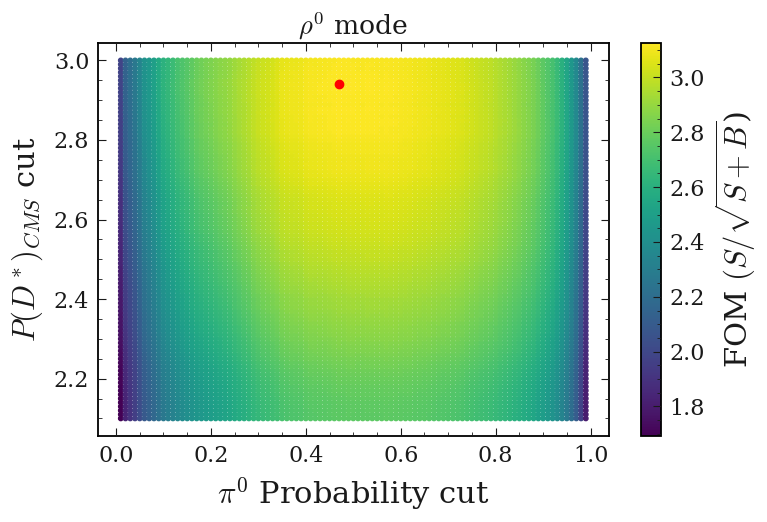

In [73]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list,y_values_list, c=FOM_rho_list, s=10)
ax.set_xlabel("$\pi^0$ Probability cut")
ax.set_ylabel("$P(D^*)_{CMS}$ cut")
plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, argmax_y, color='r')
ax.set_title(r'$\rho^0$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)



/tmp/ipykernel_4846/468837794.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


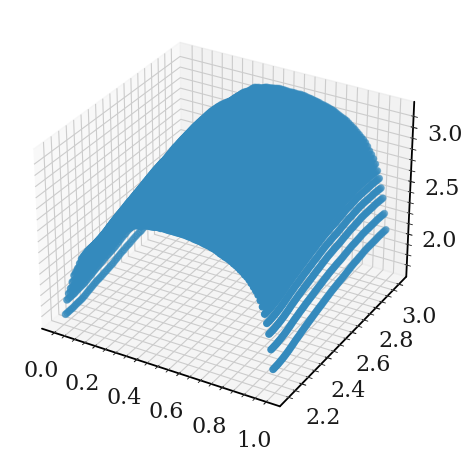

In [74]:
fig=plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_values_list,y_values_list,FOM_rho_list)

In [75]:
mode='rho'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.132458
374.59122399999995


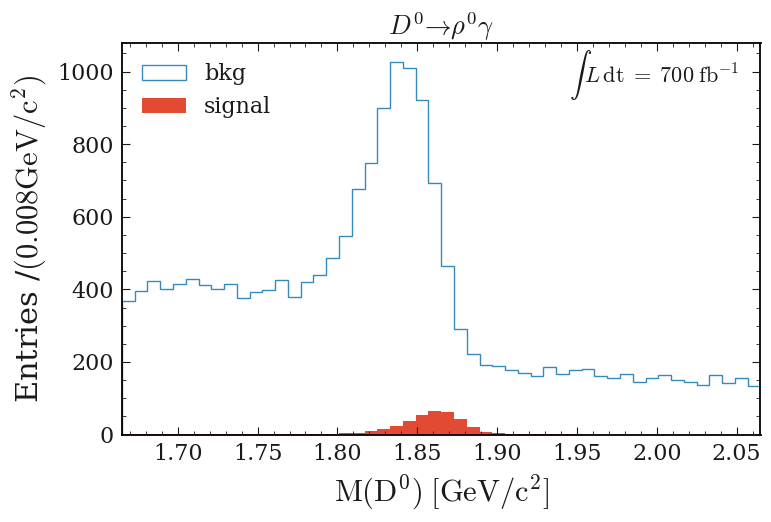

In [31]:
scale_factor =  0.00808 * 0.7

fig = plt.figure()
ax = fig.subplots()


xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = BCS_D0_bkg_pd_rho.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.72")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = BCS_half_1M_1_rho.query("Pi0_Prob < 0.9 and Dstarp_CMS_p>2.72")
eff = len(df)/5e+5

dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \rho^0 \gamma$')
lumi(l=r"$700\; \mathrm{fb}^{-1}$")
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
plt.tight_layout()
# plt.savefig(this_plot_location)

print(eff)
print(len(dataset)*scale_factor)

## P_dstar(pi0 veto fixed)

In [290]:
X = np.mgrid[2.1:3.201:0.01]

In [291]:
X

array([2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08,
       3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.19,
       3.2 ])

In [292]:
Pi0_cut=0.8
scale_factor =  0.00808 * 0.7

In [293]:
FOM_rho_1D_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []
for Dstar_momentum_cut in X:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = BCS_half_1M_1_rho
    bkg_df    = BCS_D0_bkg_pd_rho
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    nSig_list.append(nSig * scale_factor)
    nBkg_list.append(nBkg)    
    FOM_rho_1D_list.append(FOM_rho(nSig,nBkg))
    
    print(FOM_rho(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Dstar_momentum_cut)

0.8
2.1
2.6545849554353587
0.8
2.11
2.6548668136557874
0.8
2.1199999999999997
2.656662691690056
0.8
2.1299999999999994
2.6583469857992648
0.8
2.1399999999999992
2.6603906139605678
0.8
2.149999999999999
2.663571106206426
0.8
2.159999999999999
2.6680761929911667
0.8
2.1699999999999986
2.6723434167933102
0.8
2.1799999999999984
2.6770275862768944
0.8
2.189999999999998
2.681995368981897
0.8
2.199999999999998
2.687491779087332
0.8
2.2099999999999977
2.6937621802417104
0.8
2.2199999999999975
2.6990462820188448
0.8
2.2299999999999973
2.7072706032839617
0.8
2.239999999999997
2.713425713850907
0.8
2.249999999999997
2.7216199479089447
0.8
2.2599999999999967
2.729327772437254
0.8
2.2699999999999965
2.73674469057413
0.8
2.2799999999999963
2.743623450473638
0.8
2.289999999999996
2.7491924059588775
0.8
2.299999999999996
2.757095516372903
0.8
2.3099999999999956
2.764085118764711
0.8
2.3199999999999954
2.7699809612120787
0.8
2.329999999999995
2.7736570348776772
0.8
2.339999999999995
2.780051097460282
0

In [294]:
max(FOM_rho_1D_list)
FOM_rho_1D_list_np = np.asarray(FOM_rho_1D_list)

print(f'FOM max = {FOM_rho_1D_list_np.max()}')
print(f'argmax = {FOM_rho_1D_list_np.argmax()}')

max_index = FOM_rho_1D_list_np.argmax()

argmax_x = x_values_list[max_index]
print(f'max of P cut = {argmax_x}')
print(nSig_list[max_index])
print(nBkg_list[max_index])

FOM max = 2.976063561101699
argmax = 72
max of P cut = 2.8199999999999847
330.36130399999996
11992


In [295]:
mode='rho'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_1D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

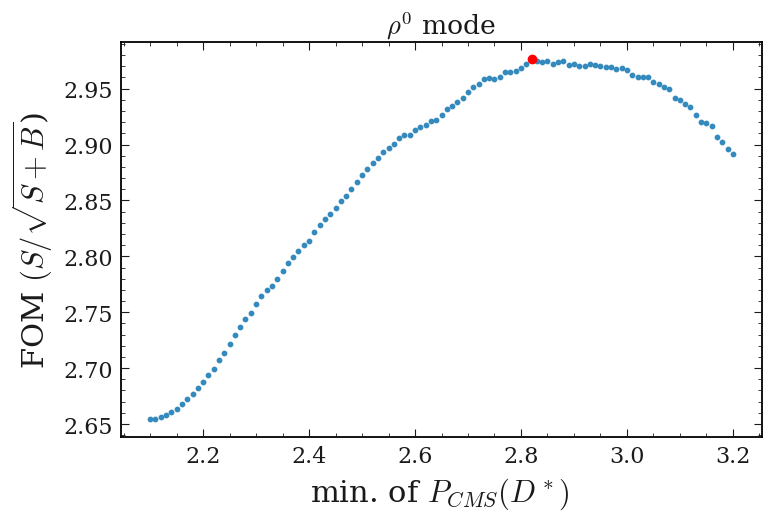

In [296]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list, FOM_rho_1D_list, s=10)
ax.set_xlabel("min. of $P_{CMS}(D^*)$ ")
ax.set_ylabel("FOM $(S/\sqrt{S+B}$)")
# plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, FOM_rho_1D_list[max_index], color='r')
ax.set_title(r'$\rho^0$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.show()


In [122]:
# dataset = half_1M_1_phi.query("Pi0_Prob < 0.68 and Dstarp_CMS_p>2.24")
# dx = np.diff(xe)
# cx = 0.5 * (xe[1:] + xe[:-1])
# n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))

In [123]:
mode='rho'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.067066


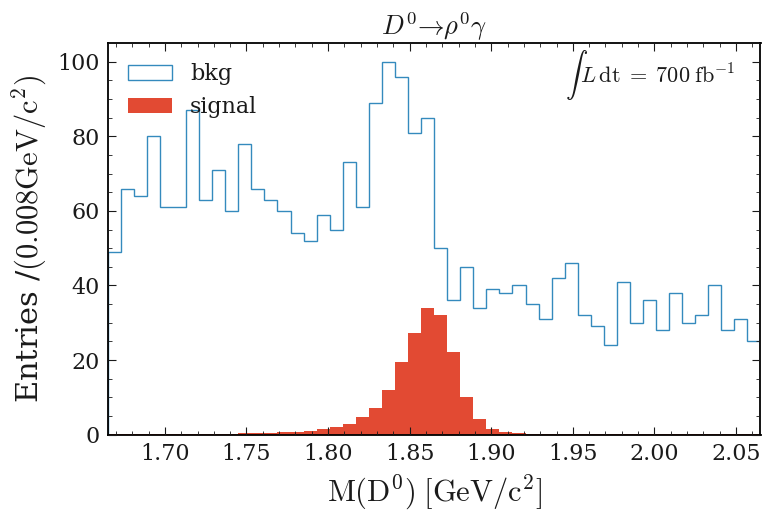

In [302]:
scale_factor =  0.00808 * 0.7
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

#     signal_df = BCS_half_1M_1_rho
#     bkg_df    = BCS_D0_bkg_pd_rh
df = BCS_D0_bkg_pd_rho.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8 and abs(D0_cosHel_0)<0.4")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = BCS_half_1M_1_rho.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8 and abs(D0_cosHel_0)<0.4")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(1.665,2.065)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \rho^0 \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

0.118154


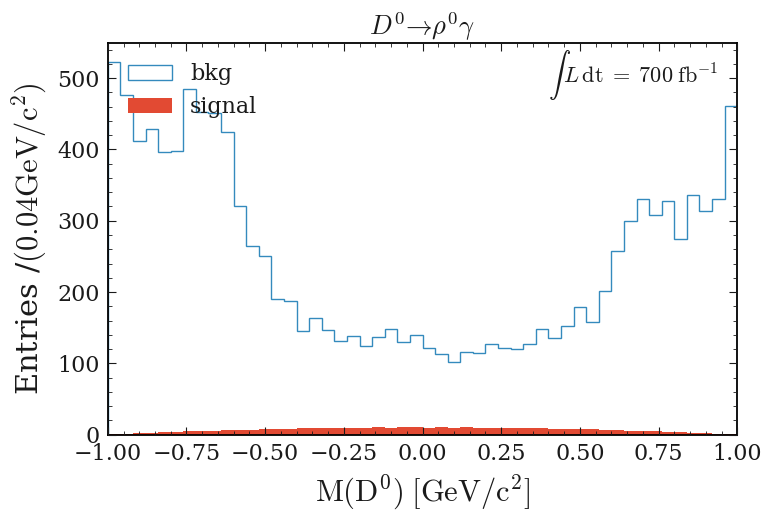

In [266]:
scale_factor =  0.00808 * 0.7
fig = plt.figure()
ax = fig.subplots()

xrange = (-1,1,51)
xm = np.linspace(*xrange)

#     signal_df = BCS_half_1M_1_rho
#     bkg_df    = BCS_D0_bkg_pd_rh
df = BCS_D0_bkg_pd_rho.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label='bkg');

df = BCS_half_1M_1_rho.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_cosHel_0"], bins=50, range=(-1,1))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(-1,1)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \rho^0 \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

# Omega

In [180]:
len(half_1M_1_omega) * 0.08977 * 0.7

2379.838608

In [181]:
scale_factor = 0.08977 * 0.7

In [182]:
signal_df = half_1M_1_omega
bkg_df    = D0_bkg_pd_omega_with_other_bkg

In [183]:
nSig = len(signal_df)
nBkg = len(bkg_df)

In [184]:
def FOM_omega(nS, nB):
    nS_scaled = nS * scale_factor
    return nS_scaled/math.sqrt(nS_scaled+nB)

In [185]:
FOM_omega(nSig,nBkg)

13.307895194386367

## 2d(P_Dstar, pi0_veto)

In [170]:
X,Y = np.mgrid[0.01:0.991:0.01, 2.1:3.001:0.01]

In [171]:
xy = np.vstack((X.flatten(), Y.flatten())).T

In [172]:
xy

array([[0.01, 2.1 ],
       [0.01, 2.11],
       [0.01, 2.12],
       ...,
       [0.99, 2.98],
       [0.99, 2.99],
       [0.99, 3.  ]])

In [173]:
FOM_omega_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []

for (Pi0_cut,Dstar_momentum_cut) in xy:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        
    
    signal_df = half_1M_1_omega
    bkg_df    = D0_bkg_pd_omega_with_other_bkg
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    
    nSig_list.append(nSig * scale_factor)
    nBkg_list.append(nBkg)
    
    FOM_omega_list.append(FOM_omega(nSig,nBkg))
    
    print(FOM_omega(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Pi0_cut)
    y_values_list.append(Dstar_momentum_cut)

0.01
2.1
10.251686151269096
0.01
2.11
10.264757663959422
0.01
2.12
10.271323582207753
0.01
2.13
10.284494041731582
0.01
2.14
10.286166612412657
0.01
2.15
10.294494788350516
0.01
2.16
10.312872790366907
0.01
2.17
10.334919183656146
0.01
2.18
10.347078106735228
0.01
2.19
10.367812637704876
0.01
2.2
10.37845219470979
0.01
2.21
10.420684656093027
0.01
2.22
10.437538903349543
0.01
2.23
10.468728925177336
0.01
2.24
10.506809475364197
0.01
2.25
10.553481302343645
0.01
2.2600000000000002
10.591088644842701
0.01
2.27
10.620195743277325
0.01
2.2800000000000002
10.645818423065382
0.01
2.29
10.682252878342261
0.01
2.3000000000000003
10.71496155430232
0.01
2.31
10.742490975021413
0.01
2.3200000000000003
10.757749139394507
0.01
2.33
10.785428717120434
0.01
2.34
10.812690547546833
0.01
2.35
10.830964857278762
0.01
2.3600000000000003
10.858462201076662
0.01
2.37
10.88189483804912
0.01
2.38
10.916302608773744
0.01
2.39
10.942932928316775
0.01
2.4
10.930827338676288
0.01
2.41
10.982732256736403
0.01
2.4

12.920994271512305
0.04
2.27
12.949934109496551
0.04
2.2800000000000002
12.9770583903384
0.04
2.29
13.022350651354055
0.04
2.3000000000000003
13.052832501908256
0.04
2.31
13.108676709192604
0.04
2.3200000000000003
13.12184656197884
0.04
2.33
13.137272155611683
0.04
2.34
13.160038515389552
0.04
2.35
13.17060034579599
0.04
2.3600000000000003
13.20467171901562
0.04
2.37
13.24882409736581
0.04
2.38
13.302421330089627
0.04
2.39
13.326513937601199
0.04
2.4
13.309534160903342
0.04
2.41
13.35797405895801
0.04
2.42
13.405446989579861
0.04
2.43
13.443665662625055
0.04
2.44
13.514323231739903
0.04
2.45
13.528248399625486
0.04
2.46
13.564956247607666
0.04
2.47
13.58951200606256
0.04
2.48
13.591390693586002
0.04
2.49
13.625099040140034
0.04
2.5
13.679747340027607
0.04
2.5100000000000002
13.694351711874754
0.04
2.52
13.697380373128217
0.04
2.5300000000000002
13.697561302740215
0.04
2.54
13.747818842910267
0.04
2.5500000000000003
13.785135955554209
0.04
2.56
13.798526496490817
0.04
2.5700000000000003

15.24247110687236
0.060000000000000005
2.75
15.254869195916722
0.060000000000000005
2.7600000000000002
15.264761922035682
0.060000000000000005
2.77
15.289332811181684
0.060000000000000005
2.7800000000000002
15.30959693869833
0.060000000000000005
2.79
15.29914045583536
0.060000000000000005
2.8000000000000003
15.283181322938313
0.060000000000000005
2.81
15.295298560149135
0.060000000000000005
2.8200000000000003
15.316411428566738
0.060000000000000005
2.83
15.33531564295114
0.060000000000000005
2.84
15.330904685117636
0.060000000000000005
2.85
15.35111838086351
0.060000000000000005
2.8600000000000003
15.353706482305125
0.060000000000000005
2.87
15.372318083576
0.060000000000000005
2.88
15.383574862118556
0.060000000000000005
2.89
15.454094948905958
0.060000000000000005
2.9000000000000004
15.488456674132596
0.060000000000000005
2.91
15.502571143709401
0.060000000000000005
2.92
15.517496171384963
0.060000000000000005
2.93
15.532445498924805
0.060000000000000005
2.94
15.518518446549134
0.060

14.882010068007533
0.09
2.22
14.922216402348246
0.09
2.23
14.981393800130354
0.09
2.24
15.026632340760717
0.09
2.25
15.055466612073975
0.09
2.2600000000000002
15.127096983412253
0.09
2.27
15.185570095537782
0.09
2.2800000000000002
15.230104188911204
0.09
2.29
15.283883700825864
0.09
2.3000000000000003
15.329121443086112
0.09
2.31
15.382177610813768
0.09
2.3200000000000003
15.416962170365425
0.09
2.33
15.450887746641534
0.09
2.34
15.4862082033112
0.09
2.35
15.493075316974796
0.09
2.3600000000000003
15.537602445811773
0.09
2.37
15.59241201546861
0.09
2.38
15.648488411716333
0.09
2.39
15.67062013366722
0.09
2.4
15.673869999470186
0.09
2.41
15.724083163539975
0.09
2.42
15.765541959751237
0.09
2.43
15.819472470385199
0.09
2.44
15.893051851402545
0.09
2.45
15.920740301745141
0.09
2.46
15.966802381047303
0.09
2.47
16.022684094342722
0.09
2.48
16.04236478095341
0.09
2.49
16.077463703938943
0.09
2.5
16.137616367889656
0.09
2.5100000000000002
16.15960928926232
0.09
2.52
16.1557461424168
0.09
2.5

17.164886257366792
0.11
2.8200000000000003
17.22019288340234
0.11
2.83
17.23767061956996
0.11
2.84
17.260069228008916
0.11
2.85
17.268521746696205
0.11
2.8600000000000003
17.245192219741323
0.11
2.87
17.276743457282862
0.11
2.88
17.30487098288119
0.11
2.89
17.3690708311857
0.11
2.9000000000000004
17.414406792103225
0.11
2.91
17.427740633301347
0.11
2.92
17.421584810372703
0.11
2.93
17.420719757598384
0.11
2.94
17.415453940076443
0.11
2.95
17.411840492808754
0.11
2.96
17.37470119140833
0.11
2.97
17.339588428170337
0.11
2.98
17.34940110985171
0.11
2.99
17.343025059686735
0.11
3.0
17.339939339670416
0.12
2.1
15.359991887636863
0.12
2.11
15.367507964834832
0.12
2.12
15.382580698903167
0.12
2.13
15.395413103020333
0.12
2.14
15.416145768469583
0.12
2.15
15.436583048782438
0.12
2.16
15.477652508926319
0.12
2.17
15.50322490469056
0.12
2.18
15.538888400306837
0.12
2.19
15.563001631158892
0.12
2.2
15.577956476844516
0.12
2.21
15.655441852684456
0.12
2.22
15.69719642416246
0.12
2.23
15.7629886845

18.109076652438297
0.14
2.9000000000000004
18.14473747987119
0.14
2.91
18.158472095648346
0.14
2.92
18.1453226227814
0.14
2.93
18.13853014098977
0.14
2.94
18.14615146148298
0.14
2.95
18.14365401280754
0.14
2.96
18.102423477740253
0.14
2.97
18.05787934118832
0.14
2.98
18.07434932921821
0.14
2.99
18.060762409332927
0.14
3.0
18.056349890853216
0.15000000000000002
2.1
15.931802563472736
0.15000000000000002
2.11
15.93878890679243
0.15000000000000002
2.12
15.955461461891211
0.15000000000000002
2.13
15.972638902948068
0.15000000000000002
2.14
15.992600896901076
0.15000000000000002
2.15
16.013902808548366
0.15000000000000002
2.16
16.056466183963806
0.15000000000000002
2.17
16.082780666437685
0.15000000000000002
2.18
16.123042532744055
0.15000000000000002
2.19
16.141237596425775
0.15000000000000002
2.2
16.179070300593768
0.15000000000000002
2.21
16.24796595136767
0.15000000000000002
2.22
16.29025967711105
0.15000000000000002
2.23
16.36109748648379
0.15000000000000002
2.24
16.41333604069049
0.15

18.453697703178744
0.17
2.7
18.516833232795705
0.17
2.71
18.52694098344971
0.17
2.72
18.546899481709037
0.17
2.73
18.54627845840109
0.17
2.74
18.54199693876805
0.17
2.75
18.550388441267305
0.17
2.7600000000000002
18.5548095190248
0.17
2.77
18.59074772779038
0.17
2.7800000000000002
18.605450508691938
0.17
2.79
18.591005949532914
0.17
2.8000000000000003
18.57167587229809
0.17
2.81
18.598291896018132
0.17
2.8200000000000003
18.66225288654145
0.17
2.83
18.678604361627336
0.17
2.84
18.697265377459296
0.17
2.85
18.699507831339805
0.17
2.8600000000000003
18.690024307070775
0.17
2.87
18.713440317312408
0.17
2.88
18.730065379106122
0.17
2.89
18.779437977974435
0.17
2.9000000000000004
18.811360119053884
0.17
2.91
18.81692631451804
0.17
2.92
18.808611994626375
0.17
2.93
18.79941676827657
0.17
2.94
18.797713486812366
0.17
2.95
18.787364409944544
0.17
2.96
18.753084549122665
0.17
2.97
18.72011438349576
0.17
2.98
18.75052971149267
0.17
2.99
18.736822381874603
0.17
3.0
18.729434890787406
0.1800000000

17.538002175201928
0.2
2.3200000000000003
17.595210969446406
0.2
2.33
17.641295506860864
0.2
2.34
17.68621951263455
0.2
2.35
17.71522930875321
0.2
2.3600000000000003
17.784061823975502
0.2
2.37
17.830741360222433
0.2
2.38
17.889533242764568
0.2
2.39
17.933324072014024
0.2
2.4
17.963504098649217
0.2
2.41
18.016300996023645
0.2
2.42
18.070962915471497
0.2
2.43
18.129840048932547
0.2
2.44
18.194157603780845
0.2
2.45
18.224532776184827
0.2
2.46
18.272422389109835
0.2
2.47
18.331942379382074
0.2
2.48
18.356106552358895
0.2
2.49
18.379500521402395
0.2
2.5
18.42008921729395
0.2
2.5100000000000002
18.453865136534258
0.2
2.52
18.46789893701344
0.2
2.5300000000000002
18.498244958722655
0.2
2.54
18.548515052735393
0.2
2.5500000000000003
18.587178672411405
0.2
2.56
18.615836222216448
0.2
2.5700000000000003
18.636652590529767
0.2
2.58
18.673084857595427
0.2
2.59
18.67987279058192
0.2
2.6
18.6893730279032
0.2
2.6100000000000003
18.718390760768095
0.2
2.62
18.75279985247946
0.2
2.63
18.76201651465143

19.414076857503236
0.22
3.0
19.415492130334105
0.23
2.1
16.974398861454183
0.23
2.11
16.982826025964425
0.23
2.12
16.997385088334685
0.23
2.13
17.014548149594262
0.23
2.14
17.031461439521046
0.23
2.15
17.054931430561652
0.23
2.16
17.098922017096445
0.23
2.17
17.120846207424254
0.23
2.18
17.15215004539311
0.23
2.19
17.178069329451148
0.23
2.2
17.21960243833984
0.23
2.21
17.285867242203658
0.23
2.22
17.33131613300794
0.23
2.23
17.412658308179942
0.23
2.24
17.481879515432976
0.23
2.25
17.520758873184686
0.23
2.2600000000000002
17.59064948006643
0.23
2.27
17.650567227340517
0.23
2.2800000000000002
17.71416659172016
0.23
2.29
17.777268257399275
0.23
2.3000000000000003
17.83307766560521
0.23
2.31
17.89027621012704
0.23
2.3200000000000003
17.952613734484547
0.23
2.33
17.98958090632681
0.23
2.34
18.039335023748507
0.23
2.35
18.065800888707994
0.23
2.3600000000000003
18.127694811816863
0.23
2.37
18.17335580510196
0.23
2.38
18.23139601048758
0.23
2.39
18.276293024602765
0.23
2.4
18.3014487022451

19.307526386130615
0.25
2.59
19.319786988729607
0.25
2.6
19.332546030796365
0.25
2.6100000000000003
19.360548397792634
0.25
2.62
19.396941639635013
0.25
2.63
19.399074997898126
0.25
2.64
19.430657663016905
0.25
2.6500000000000004
19.4763756966581
0.25
2.66
19.495391341131487
0.25
2.67
19.5197383943813
0.25
2.68
19.52747281990411
0.25
2.69
19.529257958465177
0.25
2.7
19.59363762320675
0.25
2.71
19.60567173370607
0.25
2.72
19.634429200225092
0.25
2.73
19.62433219638229
0.25
2.74
19.63509602245315
0.25
2.75
19.64661715196268
0.25
2.7600000000000002
19.653805575595676
0.25
2.77
19.684513537907566
0.25
2.7800000000000002
19.689251558232883
0.25
2.79
19.680523016238094
0.25
2.8000000000000003
19.66894077553911
0.25
2.81
19.694288736206786
0.25
2.8200000000000003
19.75013256224398
0.25
2.83
19.76768322450911
0.25
2.84
19.78159537688472
0.25
2.85
19.803307038452967
0.25
2.8600000000000003
19.80026969946538
0.25
2.87
19.820603669367188
0.25
2.88
19.855860898709658
0.25
2.89
19.92054040820836
0.

19.77497162622247
0.28
2.63
19.783203837642994
0.28
2.64
19.820963040261354
0.28
2.6500000000000004
19.866226304559074
0.28
2.66
19.889125407843533
0.28
2.67
19.914091331880858
0.28
2.68
19.91867633922476
0.28
2.69
19.921886783465194
0.28
2.7
19.97661463195546
0.28
2.71
19.982060817306973
0.28
2.72
20.007555685842288
0.28
2.73
19.9991854873939
0.28
2.74
20.00339004551246
0.28
2.75
20.025352986573587
0.28
2.7600000000000002
20.02360341653813
0.28
2.77
20.055655627013238
0.28
2.7800000000000002
20.064434942027034
0.28
2.79
20.046104728718586
0.28
2.8000000000000003
20.044412376546575
0.28
2.81
20.068510413186562
0.28
2.8200000000000003
20.123664958862324
0.28
2.83
20.136715166953675
0.28
2.84
20.15517808940362
0.28
2.85
20.176782368009178
0.28
2.8600000000000003
20.175750432183445
0.28
2.87
20.204966888198616
0.28
2.88
20.254412576469523
0.28
2.89
20.313510195530924
0.28
2.9000000000000004
20.334617333299875
0.28
2.91
20.33805313280094
0.28
2.92
20.31095828565414
0.28
2.93
20.28715852059

19.288306599026456
0.31
2.37
19.34836285300539
0.31
2.38
19.409453780874607
0.31
2.39
19.469688000988306
0.31
2.4
19.49627955584953
0.31
2.41
19.54297981272301
0.31
2.42
19.588102429037136
0.31
2.43
19.65026406052333
0.31
2.44
19.7097548820236
0.31
2.45
19.73812059837228
0.31
2.46
19.779724612157093
0.31
2.47
19.857119557200765
0.31
2.48
19.87655024716032
0.31
2.49
19.89698655390468
0.31
2.5
19.937811828496066
0.31
2.5100000000000002
19.96809335645283
0.31
2.52
19.98023083981389
0.31
2.5300000000000002
20.033991466976143
0.31
2.54
20.091501383557514
0.31
2.5500000000000003
20.13875833207347
0.31
2.56
20.17207302187593
0.31
2.5700000000000003
20.2118081452446
0.31
2.58
20.254758986100335
0.31
2.59
20.26008257478579
0.31
2.6
20.26939472412627
0.31
2.6100000000000003
20.299477310301597
0.31
2.62
20.33369639026665
0.31
2.63
20.347139390000514
0.31
2.64
20.37923171792083
0.31
2.6500000000000004
20.42457060505614
0.31
2.66
20.446382537300348
0.31
2.67
20.476473125278666
0.31
2.68
20.47760612

19.65140954137414
0.34
2.39
19.708971332209188
0.34
2.4
19.73587047415291
0.34
2.41
19.783652897876163
0.34
2.42
19.825774384600194
0.34
2.43
19.881637416549452
0.34
2.44
19.94390655299131
0.34
2.45
19.96817825066424
0.34
2.46
20.005897367331666
0.34
2.47
20.085281311449183
0.34
2.48
20.10438067663908
0.34
2.49
20.123787092530932
0.34
2.5
20.166084871928774
0.34
2.5100000000000002
20.19331529341002
0.34
2.52
20.212123230955765
0.34
2.5300000000000002
20.26483389436944
0.34
2.54
20.320960269692232
0.34
2.5500000000000003
20.372618212902246
0.34
2.56
20.405267278206036
0.34
2.5700000000000003
20.451799477241668
0.34
2.58
20.492338104031802
0.34
2.59
20.497439981623472
0.34
2.6
20.508087153658796
0.34
2.6100000000000003
20.534298259555612
0.34
2.62
20.576915444619207
0.34
2.63
20.586077791928407
0.34
2.64
20.620127701940802
0.34
2.6500000000000004
20.6641089108355
0.34
2.66
20.685451620854543
0.34
2.67
20.724755865618107
0.34
2.68
20.732006965750642
0.34
2.69
20.74133219373797
0.34
2.7
20

20.73976720112244
0.36000000000000004
2.6
20.7549586602632
0.36000000000000004
2.6100000000000003
20.78453788534126
0.36000000000000004
2.62
20.828562163276366
0.36000000000000004
2.63
20.837930052509407
0.36000000000000004
2.64
20.868892817074578
0.36000000000000004
2.6500000000000004
20.912370079108626
0.36000000000000004
2.66
20.93477079691148
0.36000000000000004
2.67
20.972789969437727
0.36000000000000004
2.68
20.983316185306805
0.36000000000000004
2.69
20.987124481828474
0.36000000000000004
2.7
21.02898748323442
0.36000000000000004
2.71
21.035772723249433
0.36000000000000004
2.72
21.05170205030625
0.36000000000000004
2.73
21.044055380441925
0.36000000000000004
2.74
21.048583007394654
0.36000000000000004
2.75
21.07272575351299
0.36000000000000004
2.7600000000000002
21.075855895874444
0.36000000000000004
2.77
21.11110830648977
0.36000000000000004
2.7800000000000002
21.129552753916848
0.36000000000000004
2.79
21.14233217438142
0.36000000000000004
2.8000000000000003
21.145448380278175

21.040869311627013
0.39
2.6100000000000003
21.073910171113567
0.39
2.62
21.117615622766614
0.39
2.63
21.119304571322257
0.39
2.64
21.151238758032196
0.39
2.6500000000000004
21.195277247846573
0.39
2.66
21.215275848930034
0.39
2.67
21.256925657461164
0.39
2.68
21.261447993045298
0.39
2.69
21.262407512469448
0.39
2.7
21.304201227794675
0.39
2.71
21.31302788790668
0.39
2.72
21.328716458546246
0.39
2.73
21.325487840269574
0.39
2.74
21.326896882749317
0.39
2.75
21.35245024209113
0.39
2.7600000000000002
21.36308649884347
0.39
2.77
21.39245031517434
0.39
2.7800000000000002
21.406697869776348
0.39
2.79
21.41790855348685
0.39
2.8000000000000003
21.428183157949366
0.39
2.81
21.449315534025395
0.39
2.8200000000000003
21.494695817994387
0.39
2.83
21.50312775509605
0.39
2.84
21.51389535052401
0.39
2.85
21.53637780693673
0.39
2.8600000000000003
21.52438897180752
0.39
2.87
21.541935081104253
0.39
2.88
21.58392500519416
0.39
2.89
21.63062389210589
0.39
2.9000000000000004
21.657353181762534
0.39
2.91
2

19.03176405914009
0.42000000000000004
2.15
19.07016746220207
0.42000000000000004
2.16
19.11143727402391
0.42000000000000004
2.17
19.14803258565748
0.42000000000000004
2.18
19.17513528780581
0.42000000000000004
2.19
19.200349304179777
0.42000000000000004
2.2
19.243215926213345
0.42000000000000004
2.21
19.310615152501107
0.42000000000000004
2.22
19.360115400173772
0.42000000000000004
2.23
19.449438900613384
0.42000000000000004
2.24
19.52283558216061
0.42000000000000004
2.25
19.59199785153422
0.42000000000000004
2.2600000000000002
19.663889516898998
0.42000000000000004
2.27
19.731259109590646
0.42000000000000004
2.2800000000000002
19.805721198588508
0.42000000000000004
2.29
19.87859278723069
0.42000000000000004
2.3000000000000003
19.936427189826052
0.42000000000000004
2.31
20.016059051914805
0.42000000000000004
2.3200000000000003
20.05751093926716
0.42000000000000004
2.33
20.110722502400506
0.42000000000000004
2.34
20.1684814301682
0.42000000000000004
2.35
20.192702939288573
0.42000000000

21.943480280508073
0.44
2.79
21.948311501775045
0.44
2.8000000000000003
21.969229152105747
0.44
2.81
21.988047659415418
0.44
2.8200000000000003
22.036831328147052
0.44
2.83
22.038754564750317
0.44
2.84
22.046213681714843
0.44
2.85
22.053700383083626
0.44
2.8600000000000003
22.045162812129696
0.44
2.87
22.065622594407483
0.44
2.88
22.107860359237566
0.44
2.89
22.148295283767556
0.44
2.9000000000000004
22.179181339810075
0.44
2.91
22.191247547499767
0.44
2.92
22.173994648494244
0.44
2.93
22.164305046675256
0.44
2.94
22.19736438471098
0.44
2.95
22.19281873328106
0.44
2.96
22.182820175765343
0.44
2.97
22.149170594587513
0.44
2.98
22.144258806653397
0.44
2.99
22.12211111169047
0.44
3.0
22.104812617817284
0.45
2.1
19.269031480050042
0.45
2.11
19.28237765956304
0.45
2.12
19.29205759402595
0.45
2.13
19.300865047119796
0.45
2.14
19.316366288579314
0.45
2.15
19.353875909808867
0.45
2.16
19.39337836145076
0.45
2.17
19.429846372853323
0.45
2.18
19.45701864766628
0.45
2.19
19.48792998629698
0.45
2.

22.13187683416505
0.47000000000000003
2.75
22.156466041022846
0.47000000000000003
2.7600000000000002
22.169073628190926
0.47000000000000003
2.77
22.202520981415294
0.47000000000000003
2.7800000000000002
22.21496039370407
0.47000000000000003
2.79
22.225229468081128
0.47000000000000003
2.8000000000000003
22.25174644425056
0.47000000000000003
2.81
22.27191389581001
0.47000000000000003
2.8200000000000003
22.319461150709223
0.47000000000000003
2.83
22.316737984936786
0.47000000000000003
2.84
22.324980377472126
0.47000000000000003
2.85
22.33018547073199
0.47000000000000003
2.8600000000000003
22.331689137447732
0.47000000000000003
2.87
22.353696577481447
0.47000000000000003
2.88
22.398120779706787
0.47000000000000003
2.89
22.435204747801865
0.47000000000000003
2.9000000000000004
22.466576651087472
0.47000000000000003
2.91
22.48650504556785
0.47000000000000003
2.92
22.46897805729209
0.47000000000000003
2.93
22.461966463516152
0.47000000000000003
2.94
22.484769101110977
0.47000000000000003
2.95

20.000331352070162
0.5
2.24
20.072352380696397
0.5
2.25
20.144246150465964
0.5
2.2600000000000002
20.22838666151244
0.5
2.27
20.31088658511583
0.5
2.2800000000000002
20.38061268488915
0.5
2.29
20.461056311565944
0.5
2.3000000000000003
20.518937227781333
0.5
2.31
20.612411965237982
0.5
2.3200000000000003
20.658777406763107
0.5
2.33
20.710636065529833
0.5
2.34
20.75968213017944
0.5
2.35
20.784087274351254
0.5
2.3600000000000003
20.863149012787776
0.5
2.37
20.92109421799924
0.5
2.38
20.976627316154783
0.5
2.39
21.044634094552464
0.5
2.4
21.074561899139137
0.5
2.41
21.128694961047668
0.5
2.42
21.171073620396978
0.5
2.43
21.22181987469183
0.5
2.44
21.288990879022776
0.5
2.45
21.33061010689545
0.5
2.46
21.37636711710819
0.5
2.47
21.453705879624888
0.5
2.48
21.480509553439603
0.5
2.49
21.510161900342037
0.5
2.5
21.55266430838477
0.5
2.5100000000000002
21.58944148353093
0.5
2.52
21.627551997875084
0.5
2.5300000000000002
21.681986930519688
0.5
2.54
21.75324133053012
0.5
2.5500000000000003
21.80

19.816181910857207
0.53
2.17
19.85186638987689
0.53
2.18
19.884232426529582
0.53
2.19
19.917328872110016
0.53
2.2
19.970340599567695
0.53
2.21
20.03811827026736
0.53
2.22
20.084606969057894
0.53
2.23
20.168610152385657
0.53
2.24
20.242918552461944
0.53
2.25
20.311645918914884
0.53
2.2600000000000002
20.39577405374696
0.53
2.27
20.477405855934155
0.53
2.2800000000000002
20.547638492860948
0.53
2.29
20.627940344336068
0.53
2.3000000000000003
20.684210467998053
0.53
2.31
20.77712704125758
0.53
2.3200000000000003
20.824303659418593
0.53
2.33
20.879649359756343
0.53
2.34
20.93013506983803
0.53
2.35
20.958890026206966
0.53
2.3600000000000003
21.039741139915105
0.53
2.37
21.093924135419044
0.53
2.38
21.148757203954624
0.53
2.39
21.226553116417193
0.53
2.4
21.257444219151484
0.53
2.41
21.311201518748664
0.53
2.42
21.353569708979038
0.53
2.43
21.403361215665498
0.53
2.44
21.462696446363587
0.53
2.45
21.499424277957388
0.53
2.46
21.546833206462225
0.53
2.47
21.624290663421387
0.53
2.48
21.651421

22.909663573126036
0.56
2.1
19.851602073666815
0.56
2.11
19.865012027547785
0.56
2.12
19.872731297223314
0.56
2.13
19.885767115564846
0.56
2.14
19.897866151290884
0.56
2.15
19.937878484474265
0.56
2.16
19.972495133109312
0.56
2.17
20.010359876350243
0.56
2.18
20.044739277453292
0.56
2.19
20.077498713275933
0.56
2.2
20.129592960619103
0.56
2.21
20.19599448759022
0.56
2.22
20.243354365601427
0.56
2.23
20.326864475182884
0.56
2.24
20.399499468779567
0.56
2.25
20.464611026451205
0.56
2.2600000000000002
20.54874683221019
0.56
2.27
20.626884511047095
0.56
2.2800000000000002
20.702907189560065
0.56
2.29
20.787389442143244
0.56
2.3000000000000003
20.849300209491084
0.56
2.31
20.936081943944306
0.56
2.3200000000000003
20.987389348113712
0.56
2.33
21.046473899572742
0.56
2.34
21.093450449255496
0.56
2.35
21.118964193007553
0.56
2.3600000000000003
21.194528605947145
0.56
2.37
21.24769365109417
0.56
2.38
21.305250852678412
0.56
2.39
21.38456249449231
0.56
2.4
21.410733809616893
0.56
2.41
21.467500

22.84240956629988
0.5800000000000001
2.7600000000000002
22.845776322152343
0.5800000000000001
2.77
22.87967693754424
0.5800000000000001
2.7800000000000002
22.89771783566325
0.5800000000000001
2.79
22.912394383046955
0.5800000000000001
2.8000000000000003
22.930577246404024
0.5800000000000001
2.81
22.944674153013846
0.5800000000000001
2.8200000000000003
22.99486721691626
0.5800000000000001
2.83
22.984893518987764
0.5800000000000001
2.84
23.00420045120442
0.5800000000000001
2.85
23.00692430258008
0.5800000000000001
2.8600000000000003
23.001100038120054
0.5800000000000001
2.87
23.00650958068035
0.5800000000000001
2.88
23.051232120010905
0.5800000000000001
2.89
23.072261230756656
0.5800000000000001
2.9000000000000004
23.11143425707108
0.5800000000000001
2.91
23.128445227569653
0.5800000000000001
2.92
23.124129690915357
0.5800000000000001
2.93
23.114629105303234
0.5800000000000001
2.94
23.146167511241007
0.5800000000000001
2.95
23.12720023401016
0.5800000000000001
2.96
23.118760300821297
0.5

22.827988578611258
0.61
2.7
22.884650712434663
0.61
2.71
22.9112784059374
0.61
2.72
22.93198071246019
0.61
2.73
22.939015647394797
0.61
2.74
22.946121513174948
0.61
2.75
22.9589904254904
0.61
2.7600000000000002
22.964957250066693
0.61
2.77
23.002801130973747
0.61
2.7800000000000002
23.020759759909097
0.61
2.79
23.032745179662246
0.61
2.8000000000000003
23.0564256230968
0.61
2.81
23.073668700497564
0.61
2.8200000000000003
23.121425308502133
0.61
2.83
23.11616458604378
0.61
2.84
23.1368938553621
0.61
2.85
23.143248915941275
0.61
2.8600000000000003
23.138366341957735
0.61
2.87
23.13949426440776
0.61
2.88
23.182165463720292
0.61
2.89
23.197634105380274
0.61
2.9000000000000004
23.238547752795856
0.61
2.91
23.256348628855974
0.61
2.92
23.245184189156713
0.61
2.93
23.228072025189448
0.61
2.94
23.259650414998397
0.61
2.95
23.23556456959981
0.61
2.96
23.229237436266633
0.61
2.97
23.20106311408467
0.61
2.98
23.205148231109355
0.61
2.99
23.192827500580428
0.61
3.0
23.17095873421111
0.62
2.1
20.07

22.720599605989943
0.64
2.6500000000000004
22.768419569848525
0.64
2.66
22.803669979240997
0.64
2.67
22.853781415515332
0.64
2.68
22.85865797589859
0.64
2.69
22.874049792501328
0.64
2.7
22.93655909375006
0.64
2.71
22.966935006127876
0.64
2.72
22.98365277776917
0.64
2.73
22.99493474772617
0.64
2.74
23.004110832385855
0.64
2.75
23.011264844015823
0.64
2.7600000000000002
23.01740514586584
0.64
2.77
23.05303698009671
0.64
2.7800000000000002
23.071907485650783
0.64
2.79
23.087597535720576
0.64
2.8000000000000003
23.10791908044952
0.64
2.81
23.123842513502755
0.64
2.8200000000000003
23.16643400802413
0.64
2.83
23.170051940340876
0.64
2.84
23.188595427850398
0.64
2.85
23.198406383341027
0.64
2.8600000000000003
23.19842987459062
0.64
2.87
23.20071691256259
0.64
2.88
23.245395268092846
0.64
2.89
23.262937407460687
0.64
2.9000000000000004
23.29748760020078
0.64
2.91
23.318701790206
0.64
2.92
23.3065417645376
0.64
2.93
23.284534037186724
0.64
2.94
23.31367846841773
0.64
2.95
23.30157502329043
0.6

22.696123800649467
0.67
2.6100000000000003
22.744303877874003
0.67
2.62
22.78558451928037
0.67
2.63
22.788985996461204
0.67
2.64
22.83986254151187
0.67
2.6500000000000004
22.889026301911066
0.67
2.66
22.936529910992988
0.67
2.67
22.981899141281914
0.67
2.68
22.98033220496079
0.67
2.69
22.99595105200709
0.67
2.7
23.063830013496897
0.67
2.71
23.091996366273456
0.67
2.72
23.113072294646216
0.67
2.73
23.123155032636287
0.67
2.74
23.130667197049767
0.67
2.75
23.13693892465362
0.67
2.7600000000000002
23.14382247195606
0.67
2.77
23.182137142942413
0.67
2.7800000000000002
23.202432673216222
0.67
2.79
23.213609086275113
0.67
2.8000000000000003
23.233801205452302
0.67
2.81
23.24368489276832
0.67
2.8200000000000003
23.281983949631748
0.67
2.83
23.28468025183364
0.67
2.84
23.304423656933647
0.67
2.85
23.315156386421478
0.67
2.8600000000000003
23.312908847302882
0.67
2.87
23.30987531439515
0.67
2.88
23.351983977884597
0.67
2.89
23.369537471239713
0.67
2.9000000000000004
23.40175259961408
0.67
2.91


22.31916561634311
0.7000000000000001
2.52
22.35983296761199
0.7000000000000001
2.5300000000000002
22.416973098308883
0.7000000000000001
2.54
22.488607091960812
0.7000000000000001
2.5500000000000003
22.5573626477304
0.7000000000000001
2.56
22.59778827361225
0.7000000000000001
2.5700000000000003
22.63076848655845
0.7000000000000001
2.58
22.677776976085124
0.7000000000000001
2.59
22.701123952203083
0.7000000000000001
2.6
22.7648783258713
0.7000000000000001
2.6100000000000003
22.820511791958157
0.7000000000000001
2.62
22.866811910288874
0.7000000000000001
2.63
22.871633028948366
0.7000000000000001
2.64
22.92330446878113
0.7000000000000001
2.6500000000000004
22.9712313974103
0.7000000000000001
2.66
23.01853495671783
0.7000000000000001
2.67
23.063418722058643
0.7000000000000001
2.68
23.05889423469668
0.7000000000000001
2.69
23.06965750377251
0.7000000000000001
2.7
23.13755629340442
0.7000000000000001
2.71
23.16238980315833
0.7000000000000001
2.72
23.183036782230392
0.7000000000000001
2.73
23

23.41331931920284
0.72
2.88
23.452719092257492
0.72
2.89
23.46595541637512
0.72
2.9000000000000004
23.496725529472393
0.72
2.91
23.51208053534578
0.72
2.92
23.493373681166865
0.72
2.93
23.474222743234616
0.72
2.94
23.522632789626872
0.72
2.95
23.501441667512843
0.72
2.96
23.49927090750457
0.72
2.97
23.479347709610078
0.72
2.98
23.477844961093204
0.72
2.99
23.470412531393954
0.72
3.0
23.447505698941058
0.73
2.1
20.126756390185008
0.73
2.11
20.13497366557019
0.73
2.12
20.138199635238774
0.73
2.13
20.155384164551897
0.73
2.14
20.167004258094927
0.73
2.15
20.204947355699623
0.73
2.16
20.24231627621784
0.73
2.17
20.28654594102737
0.73
2.18
20.32123310104917
0.73
2.19
20.35396922249859
0.73
2.2
20.418843460291157
0.73
2.21
20.4854522556973
0.73
2.22
20.54512740064637
0.73
2.23
20.636743412987418
0.73
2.24
20.71097359643654
0.73
2.25
20.7678035334968
0.73
2.2600000000000002
20.84818462696168
0.73
2.27
20.92865301873524
0.73
2.2800000000000002
21.006889394278918
0.73
2.29
21.096046316711607
0.

21.205424087326687
0.76
2.3200000000000003
21.262937208247475
0.76
2.33
21.332740125881607
0.76
2.34
21.385588096722852
0.76
2.35
21.41330709235061
0.76
2.3600000000000003
21.490606225379473
0.76
2.37
21.55268429750627
0.76
2.38
21.622981872674615
0.76
2.39
21.710556178136592
0.76
2.4
21.734630538258784
0.76
2.41
21.82151264121842
0.76
2.42
21.88058265368249
0.76
2.43
21.941214557176213
0.76
2.44
22.006042481602048
0.76
2.45
22.05071141201374
0.76
2.46
22.100920381635895
0.76
2.47
22.185561259224087
0.76
2.48
22.2172776630223
0.76
2.49
22.25920452768293
0.76
2.5
22.295815043292777
0.76
2.5100000000000002
22.33908362131008
0.76
2.52
22.374497740605285
0.76
2.5300000000000002
22.42430725026491
0.76
2.54
22.493368445767263
0.76
2.5500000000000003
22.563904174919777
0.76
2.56
22.60967598983883
0.76
2.5700000000000003
22.648551558251775
0.76
2.58
22.691074093563618
0.76
2.59
22.72523616050176
0.76
2.6
22.788850186260476
0.76
2.6100000000000003
22.86352956162556
0.76
2.62
22.91356973438757
0

20.700870239951897
0.79
2.2600000000000002
20.785440828307003
0.79
2.27
20.862253884528165
0.79
2.2800000000000002
20.934961874824957
0.79
2.29
21.02878478644919
0.79
2.3000000000000003
21.085153861957124
0.79
2.31
21.168050689486822
0.79
2.3200000000000003
21.22872858718409
0.79
2.33
21.30381933554077
0.79
2.34
21.363492120028138
0.79
2.35
21.396311977480572
0.79
2.3600000000000003
21.479173971679437
0.79
2.37
21.535368196398352
0.79
2.38
21.605559214301746
0.79
2.39
21.692676195180645
0.79
2.4
21.716110034644352
0.79
2.41
21.802759738319324
0.79
2.42
21.860715600742843
0.79
2.43
21.928591392095385
0.79
2.44
22.000063138865926
0.79
2.45
22.046431790544094
0.79
2.46
22.101932208747876
0.79
2.47
22.188379183054657
0.79
2.48
22.225943762964597
0.79
2.49
22.269330575955586
0.79
2.5
22.30849778332072
0.79
2.5100000000000002
22.35482212673265
0.79
2.52
22.392989295488512
0.79
2.5300000000000002
22.445239755950336
0.79
2.54
22.51521093857059
0.79
2.5500000000000003
22.584121559540282
0.79
2.

20.189082340164425
0.8200000000000001
2.2
20.25762011264718
0.8200000000000001
2.21
20.33362674225618
0.8200000000000001
2.22
20.39505541329414
0.8200000000000001
2.23
20.486868122487742
0.8200000000000001
2.24
20.56479849212077
0.8200000000000001
2.25
20.619566563275363
0.8200000000000001
2.2600000000000002
20.701125908173037
0.8200000000000001
2.27
20.780929383413575
0.8200000000000001
2.2800000000000002
20.85364611964671
0.8200000000000001
2.29
20.94670475109435
0.8200000000000001
2.3000000000000003
21.002430358919053
0.8200000000000001
2.31
21.078799835251715
0.8200000000000001
2.3200000000000003
21.139279887116537
0.8200000000000001
2.33
21.213872941063798
0.8200000000000001
2.34
21.268797904227526
0.8200000000000001
2.35
21.30556394011164
0.8200000000000001
2.3600000000000003
21.388061206313846
0.8200000000000001
2.37
21.4392505262719
0.8200000000000001
2.38
21.508400674490083
0.8200000000000001
2.39
21.598997644262983
0.8200000000000001
2.4
21.62560288676027
0.8200000000000001
2

21.182533694117883
0.8400000000000001
2.35
21.227138929875636
0.8400000000000001
2.3600000000000003
21.308613777851793
0.8400000000000001
2.37
21.362780235966646
0.8400000000000001
2.38
21.43540390633854
0.8400000000000001
2.39
21.529617518246273
0.8400000000000001
2.4
21.55822938479503
0.8400000000000001
2.41
21.640782729285753
0.8400000000000001
2.42
21.69751254554518
0.8400000000000001
2.43
21.768306319460244
0.8400000000000001
2.44
21.846209304633483
0.8400000000000001
2.45
21.897765565146003
0.8400000000000001
2.46
21.954828106668103
0.8400000000000001
2.47
22.035738972488748
0.8400000000000001
2.48
22.06852001075102
0.8400000000000001
2.49
22.11086828088279
0.8400000000000001
2.5
22.15321810118854
0.8400000000000001
2.5100000000000002
22.211831724779127
0.8400000000000001
2.52
22.254831616281702
0.8400000000000001
2.5300000000000002
22.31563357821408
0.8400000000000001
2.54
22.377504459657267
0.8400000000000001
2.5500000000000003
22.436488231905177
0.8400000000000001
2.56
22.4879

20.53867660581979
0.87
2.2800000000000002
20.608469398671513
0.87
2.29
20.70038343449825
0.87
2.3000000000000003
20.762523706041602
0.87
2.31
20.8455768873487
0.87
2.3200000000000003
20.908198790714565
0.87
2.33
20.98001958458051
0.87
2.34
21.038105365136488
0.87
2.35
21.08786727628868
0.87
2.3600000000000003
21.16899069061055
0.87
2.37
21.2239878935993
0.87
2.38
21.305058475448458
0.87
2.39
21.39115683644013
0.87
2.4
21.42253698086509
0.87
2.41
21.497647678888338
0.87
2.42
21.55319224720102
0.87
2.43
21.629079314718837
0.87
2.44
21.708570973290072
0.87
2.45
21.76473463592921
0.87
2.46
21.815307980020922
0.87
2.47
21.90292602738943
0.87
2.48
21.94018185226205
0.87
2.49
21.979125708171164
0.87
2.5
22.026122031714362
0.87
2.5100000000000002
22.081884732243186
0.87
2.52
22.123264126386182
0.87
2.5300000000000002
22.183990141242663
0.87
2.54
22.243186473175108
0.87
2.5500000000000003
22.30859928790039
0.87
2.56
22.360039255466667
0.87
2.5700000000000003
22.40618945268378
0.87
2.58
22.44618

19.70157529250681
0.9
2.21
19.77838130683898
0.9
2.22
19.84223512359863
0.9
2.23
19.92839527273585
0.9
2.24
20.004148951026757
0.9
2.25
20.056515258806698
0.9
2.2600000000000002
20.14109543343117
0.9
2.27
20.21471239555201
0.9
2.2800000000000002
20.28184812439781
0.9
2.29
20.37316104297702
0.9
2.3000000000000003
20.437294791912247
0.9
2.31
20.50951897782648
0.9
2.3200000000000003
20.57314065983161
0.9
2.33
20.642909515169304
0.9
2.34
20.694582313938387
0.9
2.35
20.747604093475466
0.9
2.3600000000000003
20.82994162977361
0.9
2.37
20.891939396487473
0.9
2.38
20.974641951165097
0.9
2.39
21.05859671030735
0.9
2.4
21.10991860414767
0.9
2.41
21.188098700445373
0.9
2.42
21.25142122762161
0.9
2.43
21.33242390676217
0.9
2.44
21.40849591875023
0.9
2.45
21.469133079478787
0.9
2.46
21.52745478118102
0.9
2.47
21.616258882785857
0.9
2.48
21.660780757820312
0.9
2.49
21.705120310795483
0.9
2.5
21.757168190448265
0.9
2.5100000000000002
21.818867144747603
0.9
2.52
21.863925110262674
0.9
2.53000000000000

18.923927315469623
0.93
2.13
18.940739261026224
0.93
2.14
18.954550034469072
0.93
2.15
18.991072379011612
0.93
2.16
19.022608394979244
0.93
2.17
19.06987751308166
0.93
2.18
19.11037165426715
0.93
2.19
19.146407981860975
0.93
2.2
19.20508041193241
0.93
2.21
19.280293092101626
0.93
2.22
19.331051486545086
0.93
2.23
19.410965348166616
0.93
2.24
19.493665381453884
0.93
2.25
19.552435200619566
0.93
2.2600000000000002
19.630913559668432
0.93
2.27
19.70768680694209
0.93
2.2800000000000002
19.780987644494417
0.93
2.29
19.868039837610088
0.93
2.3000000000000003
19.933619334764686
0.93
2.31
20.00728230960379
0.93
2.3200000000000003
20.076979741190573
0.93
2.33
20.150105932176686
0.93
2.34
20.203105747341912
0.93
2.35
20.257128135972096
0.93
2.3600000000000003
20.33768889382677
0.93
2.37
20.399056840018062
0.93
2.38
20.47858911187466
0.93
2.39
20.567655617204128
0.93
2.4
20.621058213250368
0.93
2.41
20.7034346292044
0.93
2.42
20.768317128570708
0.93
2.43
20.855319513563938
0.93
2.44
20.9170369445

19.973063096639066
0.9500000000000001
2.4
20.045417459517097
0.9500000000000001
2.41
20.128082109841934
0.9500000000000001
2.42
20.1950690896777
0.9500000000000001
2.43
20.284060364254746
0.9500000000000001
2.44
20.343687251570188
0.9500000000000001
2.45
20.40318061819299
0.9500000000000001
2.46
20.467775306842523
0.9500000000000001
2.47
20.553357949645292
0.9500000000000001
2.48
20.607426546585724
0.9500000000000001
2.49
20.65520362981298
0.9500000000000001
2.5
20.71313914026948
0.9500000000000001
2.5100000000000002
20.763559407729346
0.9500000000000001
2.52
20.809117275842738
0.9500000000000001
2.5300000000000002
20.877275378630173
0.9500000000000001
2.54
20.93840531836376
0.9500000000000001
2.5500000000000003
21.003818726839132
0.9500000000000001
2.56
21.04782440991221
0.9500000000000001
2.5700000000000003
21.108287813026216
0.9500000000000001
2.58
21.15501799558077
0.9500000000000001
2.59
21.190429612496057
0.9500000000000001
2.6
21.246452635051583
0.9500000000000001
2.610000000000

21.458572265268483
0.97
2.97
21.454514858517527
0.97
2.98
21.473352310542257
0.97
2.99
21.49434769572241
0.97
3.0
21.487874575027572
0.98
2.1
16.293893557579906
0.98
2.11
16.30186262591594
0.98
2.12
16.30362848686929
0.98
2.13
16.319501236276583
0.98
2.14
16.335777143531697
0.98
2.15
16.36385395544228
0.98
2.16
16.397513131855305
0.98
2.17
16.442929680982157
0.98
2.18
16.48651996056138
0.98
2.19
16.520635230509363
0.98
2.2
16.574902309354936
0.98
2.21
16.64897905133313
0.98
2.22
16.70058088878915
0.98
2.23
16.772640780073473
0.98
2.24
16.84903325799331
0.98
2.25
16.917748097564395
0.98
2.2600000000000002
17.005325409284435
0.98
2.27
17.080881467760303
0.98
2.2800000000000002
17.14732044663356
0.98
2.29
17.2333902281422
0.98
2.3000000000000003
17.306999281729397
0.98
2.31
17.379244910840896
0.98
2.3200000000000003
17.452058347929235
0.98
2.33
17.521543506548138
0.98
2.34
17.58590237965538
0.98
2.35
17.642263259235985
0.98
2.3600000000000003
17.7220647328125
0.98
2.37
17.78490514054012
0

In [174]:
max(FOM_omega_list)
FOM_omega_list_np = np.asarray(FOM_omega_list)

print(FOM_omega_list_np.max())
print(FOM_omega_list_np.argmax())

max_index = FOM_omega_list_np.argmax()

argmax_x = x_values_list[max_index]
argmax_y = y_values_list[max_index]

print("Pi0_prob & Dstarp_CMS_p")
print(argmax_x)
print(argmax_y)

print("MAX of FOM")
print(FOM_omega_list[max_index])

print("Scaled signal events & bkg events")
print(nSig_list[max_index])
print(nBkg_list[max_index])

23.709091210885536
7182
Pi0_prob & Dstarp_CMS_p
0.79
2.94
MAX of FOM
23.709091210885536
Scaled signal events & bkg events
1347.5823549999998
1883


In [175]:
mode='omega'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_2D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

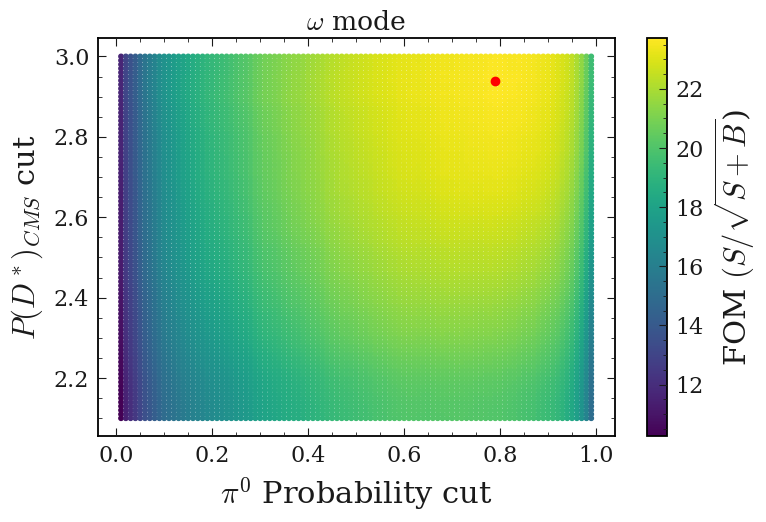

In [176]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list,y_values_list, c=FOM_omega_list, s=10)
ax.set_xlabel("$\pi^0$ Probability cut")
ax.set_ylabel("$P(D^*)_{CMS}$ cut")
plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, argmax_y, color='r')
ax.set_title(r'$\omega$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)


/tmp/ipykernel_9482/4197099703.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


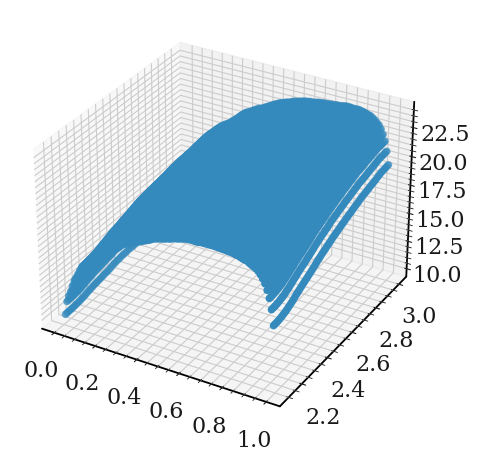

In [177]:
fig=plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_values_list,y_values_list,FOM_omega_list)

In [178]:
mode='omega'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.04289
1347.5823549999998


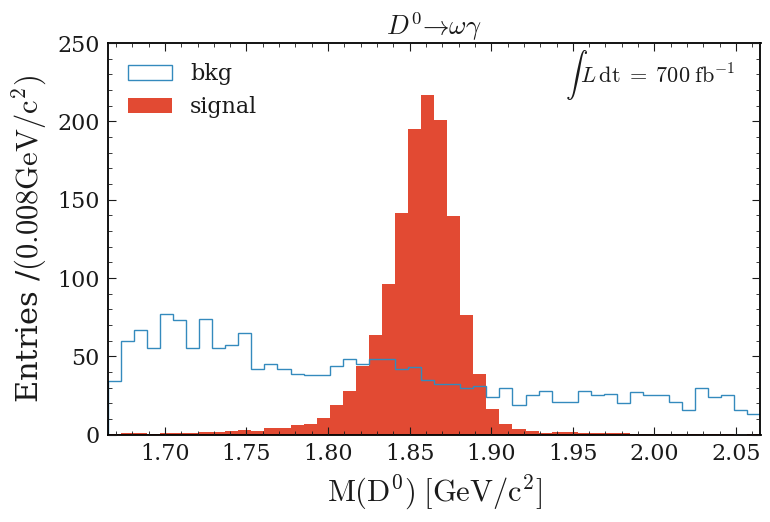

In [202]:
scale_factor =   0.08977 * 0.7

fig = plt.figure()
ax = fig.subplots()


xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)


df = D0_bkg_pd_omega_with_other_bkg.query("Pi0_Prob < 0.79 and Dstarp_CMS_p>2.94")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_omega.query("Pi0_Prob < 0.79 and Dstarp_CMS_p>2.94")
eff = len(df)/5e+5

dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

# plt.step(cx,n*scale_factor,color='red',where='mid',label='signal')
lumi(l=r"$700\; \mathrm{fb}^{-1}$")
plt.legend(loc="upper left")

ax.set_xlim(1.665,2.065)
ax.set_ylim(None,250)
ax.set_title(r'$D^0 \to \omega \gamma$')
plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)

print(eff)
print(len(dataset)*scale_factor)

## P_dstar(pi0 veto fixed)

In [284]:
X = np.mgrid[2.1:3.201:0.01]

In [285]:
Pi0_cut=0.8
scale_factor =  0.08977 * 0.7

In [286]:
FOM_omega_1D_list = []
x_values_list = []
y_values_list = []
nSig_list = []
nBkg_list = []
for Dstar_momentum_cut in X:
    print(Pi0_cut)
    print(Dstar_momentum_cut)        

    signal_df = half_1M_1_omega
    bkg_df    = D0_bkg_pd_omega_with_other_bkg
    
    signal_cuts = "(Pi0_Prob < " + str(Pi0_cut) + ") and (" + "Dstarp_CMS_p >"  + str(Dstar_momentum_cut) + ")"
    Present_signal_df = signal_df.query(signal_cuts)
    
    bkg_cuts = signal_cuts
    Present_bkg_df = bkg_df.query(bkg_cuts)
    
    nSig = len(Present_signal_df)
    nBkg = len(Present_bkg_df)
    nSig_list.append(nSig * scale_factor)
    nBkg_list.append(nBkg)    
    FOM_omega_1D_list.append(FOM_omega(nSig,nBkg))
    
    print(FOM_omega(nSig,nBkg))
    if nBkg == 0.0:
        print("nBkg is nearly 0")
        break
        

    x_values_list.append(Dstar_momentum_cut)

0.8
2.1
20.043487216965186
0.8
2.11
20.053853738108625
0.8
2.1199999999999997
20.056760071906627
0.8
2.1299999999999994
20.07456206887469
0.8
2.1399999999999992
20.084875622929818
0.8
2.149999999999999
20.121577916311168
0.8
2.159999999999999
20.161585433456754
0.8
2.1699999999999986
20.20454228399462
0.8
2.1799999999999984
20.240240452253
0.8
2.189999999999998
20.278177080903774
0.8
2.199999999999998
20.349417289039867
0.8
2.2099999999999977
20.419070046532195
0.8
2.2199999999999975
20.478026518640807
0.8
2.2299999999999973
20.566941654092343
0.8
2.239999999999997
20.643863296887243
0.8
2.249999999999997
20.70268548639741
0.8
2.2599999999999967
20.785437846594256
0.8
2.2699999999999965
20.86027740622607
0.8
2.2799999999999963
20.931077258237163
0.8
2.289999999999996
21.022055798438455
0.8
2.299999999999996
21.0789428915638
0.8
2.3099999999999956
21.16038213124192
0.8
2.3199999999999954
21.222238005879873
0.8
2.329999999999995
21.29674941919614
0.8
2.339999999999995
21.352879982680466


In [287]:
max(FOM_omega_1D_list)
FOM_omega_1D_list_np = np.asarray(FOM_omega_1D_list)

print(f'FOM max = {FOM_omega_1D_list_np.max()}')
print(f'argmax = {FOM_omega_1D_list_np.argmax()}')

max_index = FOM_omega_1D_list_np.argmax()

argmax_x = x_values_list[max_index]
print(f'max of P cut = {argmax_x}')
print(nSig_list[max_index])
print(nBkg_list[max_index])

FOM max = 23.7088892608272
argmax = 84
max of P cut = 2.939999999999982
1358.5791799999997
1925


In [288]:
mode='omega'
general_plot_location='/home/jykim/nas/plots/FOM/FOM_1D_distribution_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

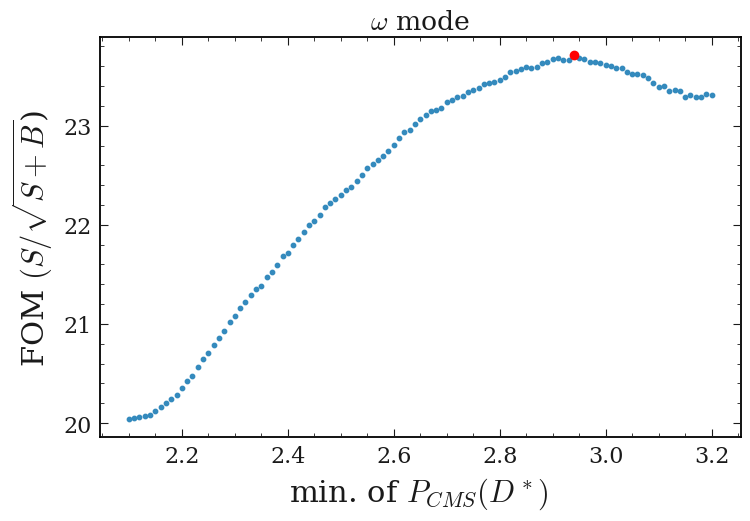

In [289]:
fig, ax = plt.subplots()
sc = ax.scatter(x_values_list, FOM_omega_1D_list, s=10)
ax.set_xlabel("min. of $P_{CMS}(D^*)$ ")
ax.set_ylabel("FOM $(S/\sqrt{S+B}$)")
# plt.colorbar(sc, label="FOM $(S/\sqrt{S+B}$)")

ax.scatter(argmax_x, FOM_omega_1D_list[max_index], color='r')
ax.set_title(r'$\omega$ mode')

plt.tight_layout()
plt.savefig(this_plot_location)

# plt.show()


In [273]:
# dataset = half_1M_1_phi.query("Pi0_Prob < 0.68 and Dstarp_CMS_p>2.24")
# dx = np.diff(xe)
# cx = 0.5 * (xe[1:] + xe[:-1])
# n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))

In [274]:
mode='omega'
general_plot_location='/home/jykim/nas/plots/FOM/v1_FOM_D0M_vector.png'
this_plot_location = general_plot_location.replace("vector",mode)

0.046896


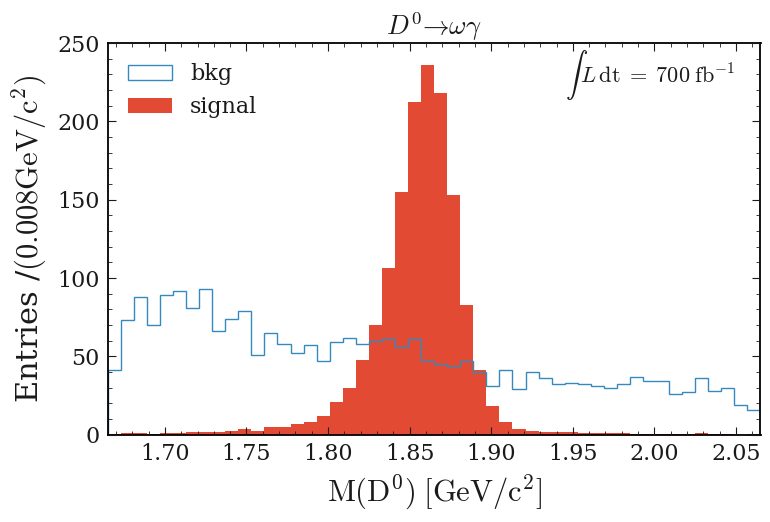

In [275]:
scale_factor =  0.08977 * 0.7
fig = plt.figure()
ax = fig.subplots()

xrange = (1.665,2.065,51)
xm = np.linspace(*xrange)

#     signal_df = half_1M_1_omega
#     bkg_df    = D0_bkg_pd_omega_with_other_bkg
df = D0_bkg_pd_omega_with_other_bkg.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
plt.hist(df["D0_M"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_omega.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_M"], bins=50, range=(1.665,2.065))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(1.665,2.065)
ax.set_ylim(None,250)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \omega \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)

0.046896


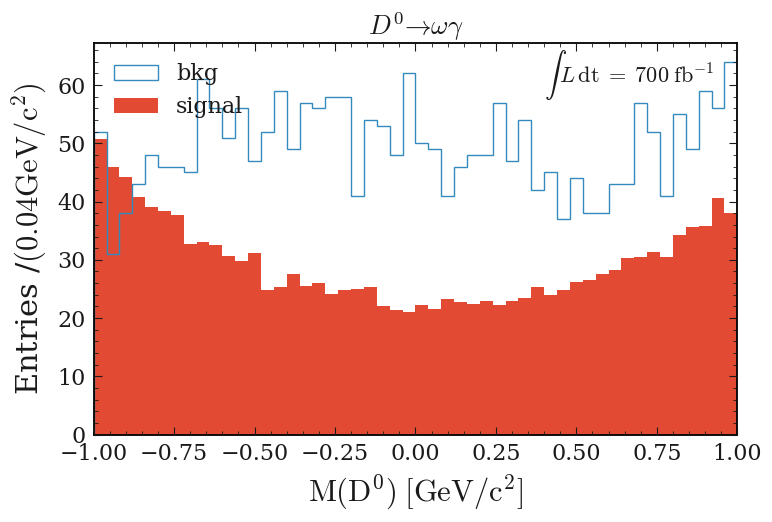

In [277]:
scale_factor =  0.08977 * 0.7
fig = plt.figure()
ax = fig.subplots()

xrange = (-1,1,51)
xm = np.linspace(*xrange)

#     signal_df = half_1M_1_omega
#     bkg_df    = D0_bkg_pd_omega_with_other_bkg
df = D0_bkg_pd_omega_with_other_bkg.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
plt.hist(df["D0_cosHel_0"],bins=xm,histtype='step',label='bkg');

df = half_1M_1_omega.query("Pi0_Prob < 0.8 and Dstarp_CMS_p>2.8")
eff = len(df)/5e+5

dataset = df
n, xe = np.histogram(dataset["D0_cosHel_0"], bins=50, range=(-1,1))
dataset = df
dx = np.diff(xe)
cx = 0.5 * (xe[1:] + xe[:-1])

# fig, ax = plt.subplots()


ax.bar(xe[:-1], n*scale_factor, width=dx, align="edge",label='signal')

lumi(l=r"$700\; \mathrm{fb}^{-1}$")
ax.set_xlim(-1,1)
# ax.set_ylim(None,250)
plt.legend(loc="upper left")
ax.set_title(r'$D^0 \to \omega \gamma$')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.tight_layout()
# plt.savefig(this_plot_location)
print(eff)